In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Main directory containing action data
main_data_dir = 'action_data_22102024/zx'

# Initialize a list to hold DataFrames
righthanddataframes = []
rightlegdataframes = []

# Loop through each action directory and load the CSV files
for fileaction in os.listdir(main_data_dir):
    new_directory = os.path.join(main_data_dir, fileaction)
    
    # Check if it's a directory
    if os.path.isdir(new_directory):
        for filename in os.listdir(new_directory):
            print(filename)
            if 'right_hand' in filename:
                print(f"{filename} contains the keyword '{'RIGHT_HAND'}'")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'action_data_22102024/zx'

In [6]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

main_data_dir = 'action_data_22102024_junhao'

# Lists to store data for all pairs
right_hand_data = []
right_leg_data = []

def extract_number(filename):
    match = re.search(r'\d+', filename)  # Find the first sequence of digits in the filename
    return int(match.group()) if match else 0  # Convert to int, or return 0 if no match

for fileaction in os.listdir(main_data_dir):
    print(fileaction)
    ## adding this only to check each action one by one
    fileaction = 'soccer'
    print(fileaction)
    new_directory = os.path.join(main_data_dir, fileaction)
    
    # Check if it's a directory
    if os.path.isdir(new_directory):
        for filename in sorted(os.listdir(new_directory), key=extract_number):
            print(filename)
            
            # Check if the file contains "RIGHT_HAND"
            if 'right_hand' in filename and filename.endswith('.csv'):
                # Extract the number from the filename (e.g., "RIGHT_HAND0.csv" -> "0")
                print(filename)
                file_number = filename.replace('right_hand', '').replace('.csv', '')
                print(file_number)

                # Construct the corresponding RIGHT_LEG filename
                corresponding_leg_file = f'right_leg{file_number}.csv'

                # Check if the corresponding RIGHT_LEG file exists in the same directory
                leg_file_path = os.path.join(new_directory, corresponding_leg_file)
                hand_file_path = os.path.join(new_directory, filename)
                
                if os.path.exists(leg_file_path):
                    print(f"Found corresponding pair: {filename} and {corresponding_leg_file}")

                    # Read both the RIGHT_HAND and RIGHT_LEG CSVs
                    hand_df = pd.read_csv(hand_file_path)
                    leg_df = pd.read_csv(leg_file_path)

                    # Store the data in lists or process as needed
                    right_hand_data.append(hand_df)
                    right_leg_data.append(leg_df)
                else:
                    print(f"Corresponding RIGHT_LEG file not found for {filename}")
    break

basketball
soccer
right_hand0.csv
right_hand0.csv
0
Found corresponding pair: right_hand0.csv and right_leg0.csv
right_leg0.csv
right_hand1.csv
right_hand1.csv
1
Found corresponding pair: right_hand1.csv and right_leg1.csv
right_leg1.csv
right_hand2.csv
right_hand2.csv
2
Found corresponding pair: right_hand2.csv and right_leg2.csv
right_leg2.csv
right_hand3.csv
right_hand3.csv
3
Found corresponding pair: right_hand3.csv and right_leg3.csv
right_leg3.csv
right_hand4.csv
right_hand4.csv
4
Found corresponding pair: right_hand4.csv and right_leg4.csv
right_leg4.csv
right_hand5.csv
right_hand5.csv
5
Found corresponding pair: right_hand5.csv and right_leg5.csv
right_leg5.csv
right_hand6.csv
right_hand6.csv
6
Found corresponding pair: right_hand6.csv and right_leg6.csv
right_leg6.csv
right_hand7.csv
right_hand7.csv
7
Found corresponding pair: right_hand7.csv and right_leg7.csv
right_leg7.csv
right_hand8.csv
right_hand8.csv
8
Found corresponding pair: right_hand8.csv and right_leg8.csv
right_l

In [7]:
print(f"Number of DataFrames in right_hand_data: {len(right_hand_data)}")
print(f"Number of DataFrames in right_leg_data: {len(right_leg_data)}")

Number of DataFrames in right_hand_data: 51
Number of DataFrames in right_leg_data: 51


In [8]:
for i, df in enumerate(right_hand_data):
    print(f"First few rows of right_hand_data[{i}]:")
    print(df.head())

for i, df in enumerate(right_leg_data):
    print(f"First few rows of right_leg_data[{i}]:")
    print(df.head())

First few rows of right_hand_data[0]:
           time        name    Ax     Ay    Az    Gx    Gy    Gz  seq_num
0  1.729589e+09  RIGHT_HAND -1796  16592 -8540 -3307 -4715 -1696      163
1  1.729589e+09  RIGHT_HAND -1004  15508 -7140   336  7698 -2187      165
2  1.729589e+09  RIGHT_HAND  2792  14668 -4804  2476  6712 -3545      167
3  1.729589e+09  RIGHT_HAND  1676  15176 -4288  -251  3091 -3420      169
4  1.729589e+09  RIGHT_HAND  2588  16552 -3624  -816  6232 -2160      171
First few rows of right_hand_data[1]:
           time        name    Ax     Ay    Az    Gx     Gy    Gz  seq_num
0  1.729589e+09  RIGHT_HAND  8292  16956  2324  1769   4915  2707      150
1  1.729589e+09  RIGHT_HAND  7128  16428  2296   868  -7131  1098      152
2  1.729589e+09  RIGHT_HAND  4788  17496  1296  2802  -4777  2228      154
3  1.729589e+09  RIGHT_HAND  5688  16936  2168  2313  -5539  1567      156
4  1.729589e+09  RIGHT_HAND  3412  16896  1408  3556 -10619  -317      158
First few rows of right_hand_d

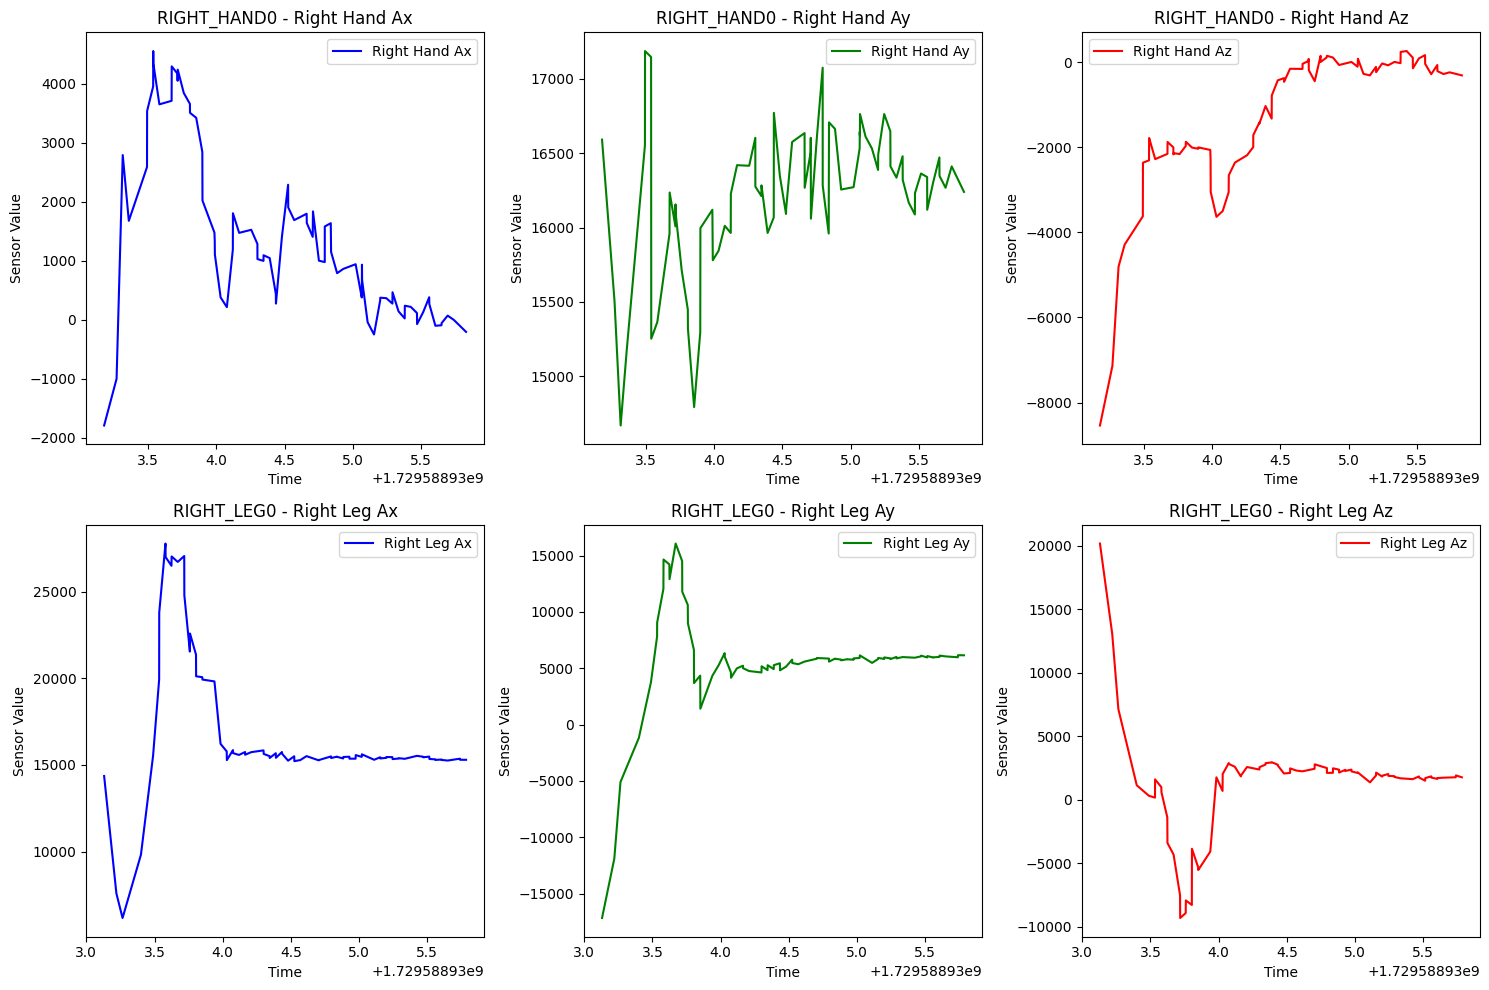

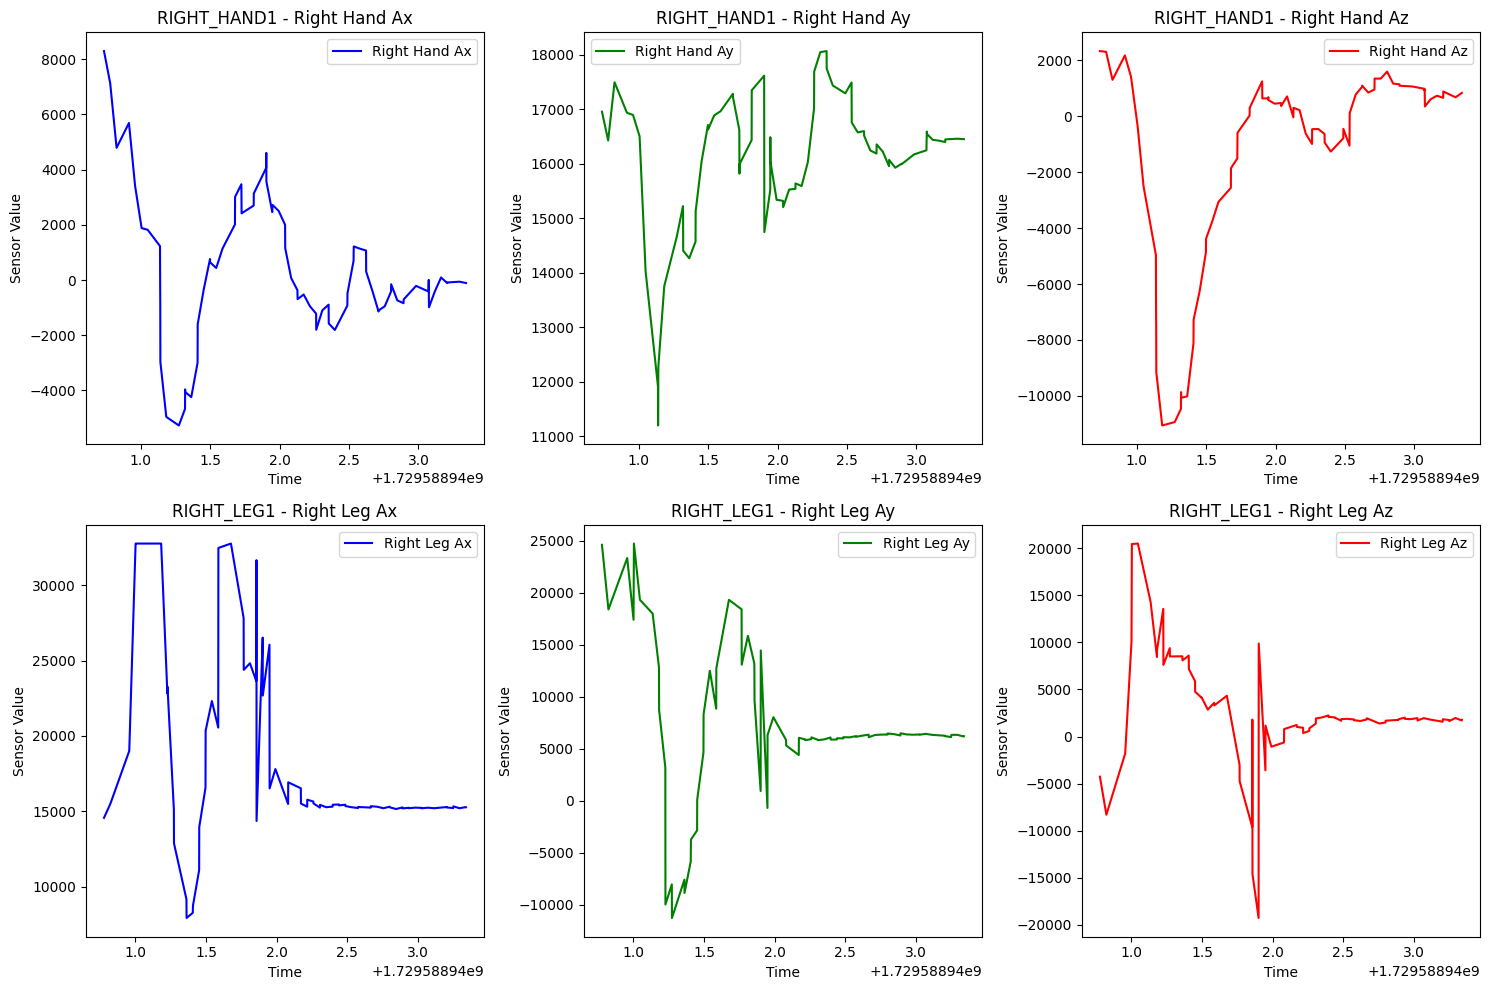

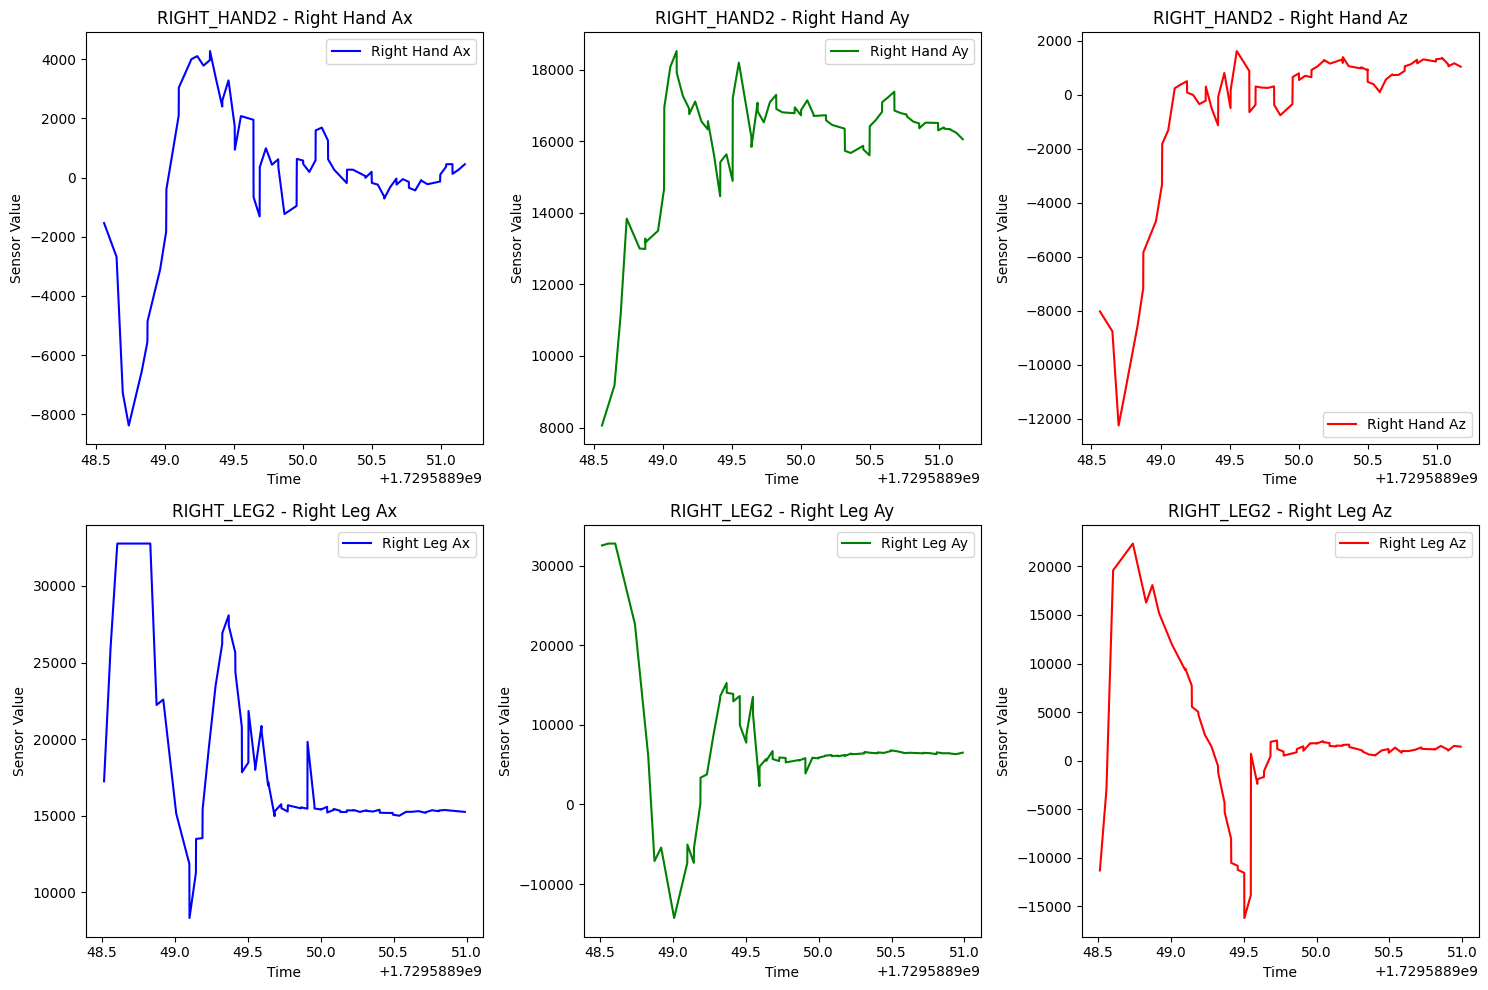

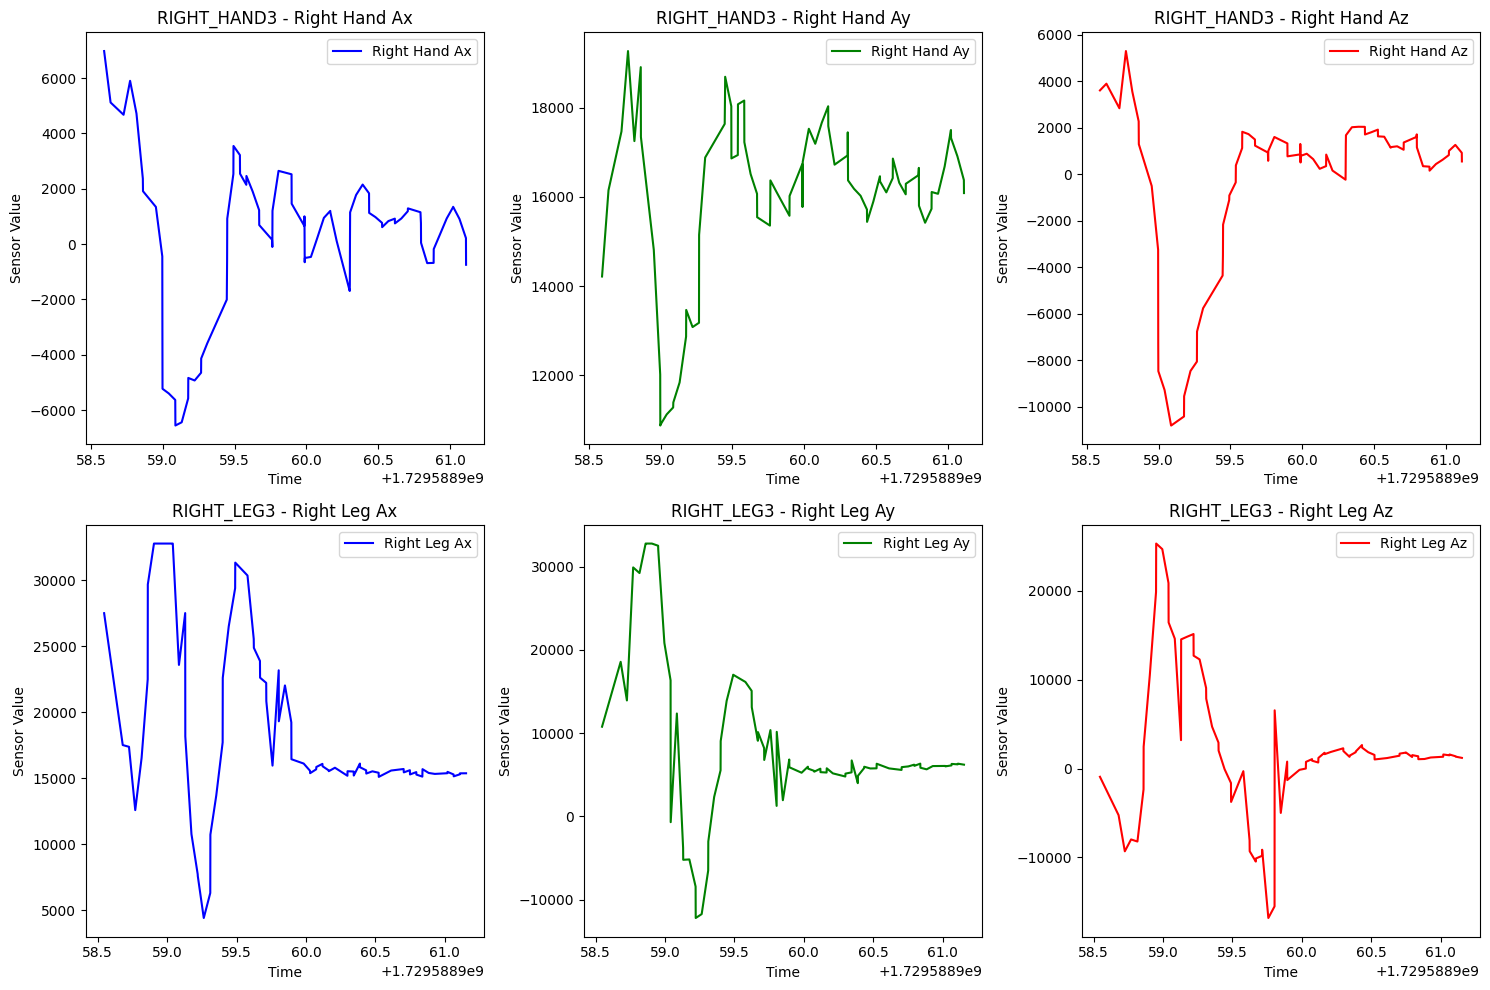

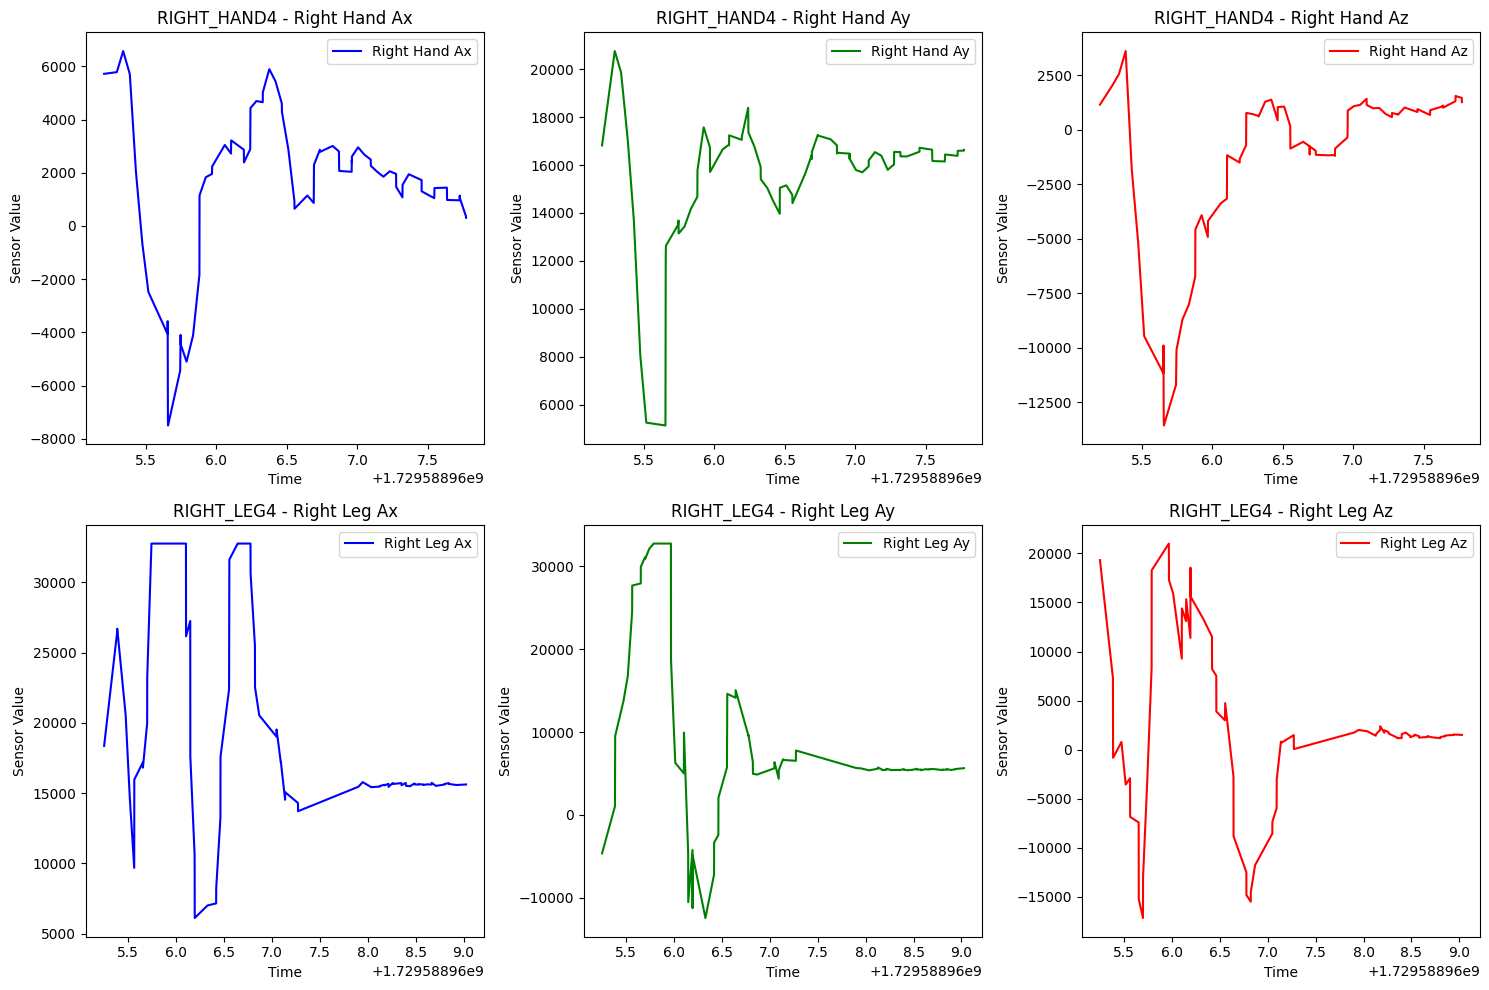

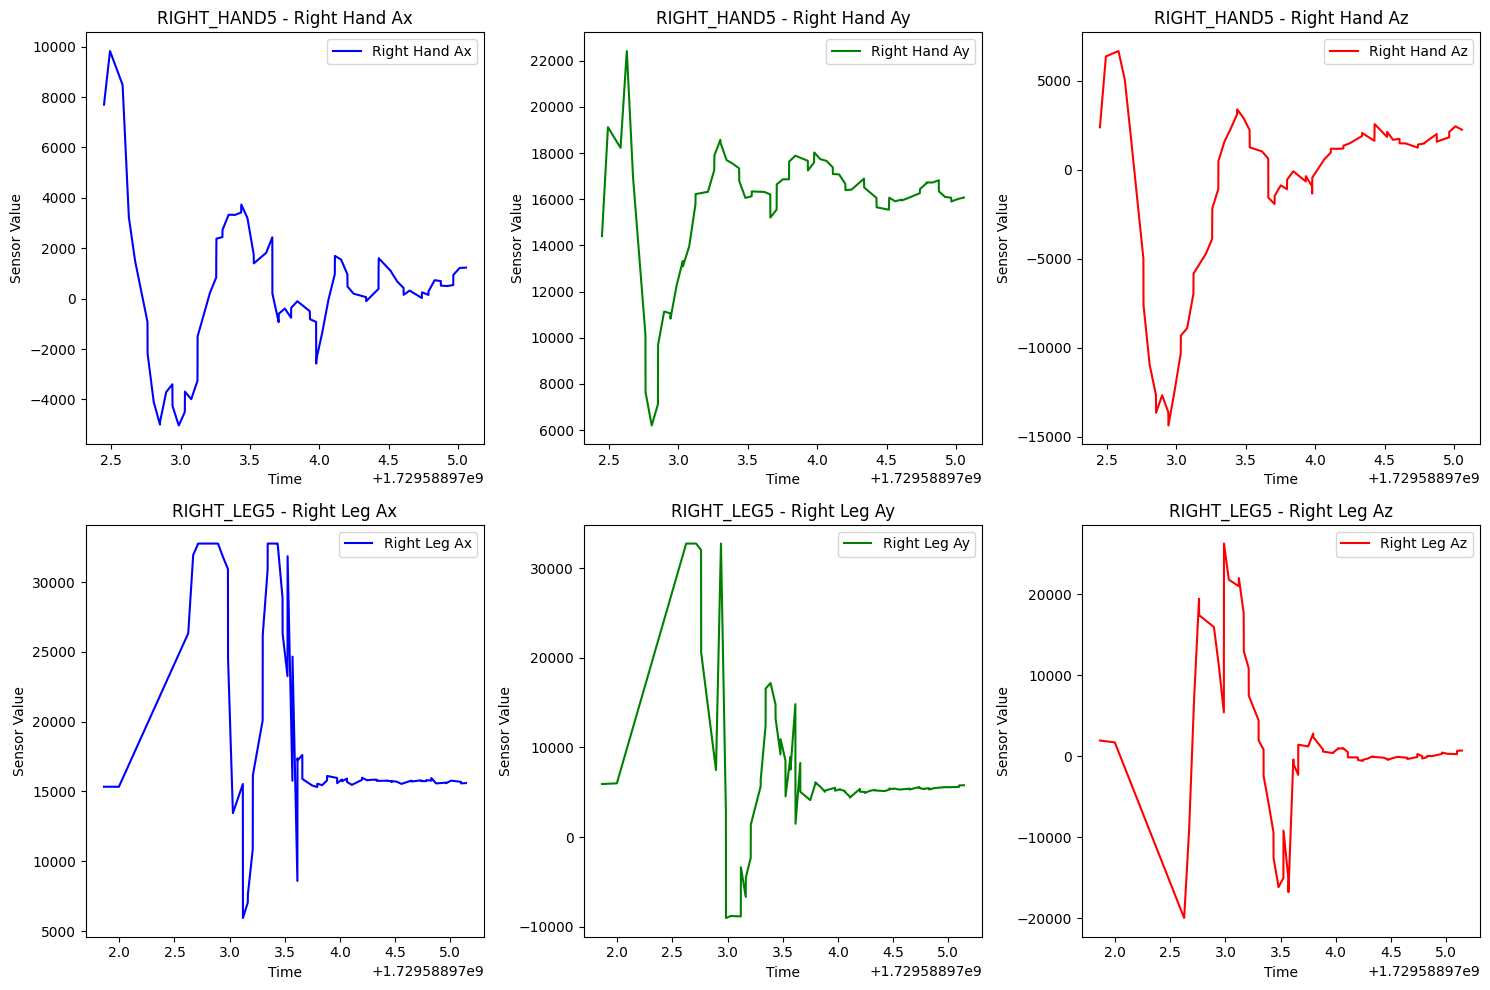

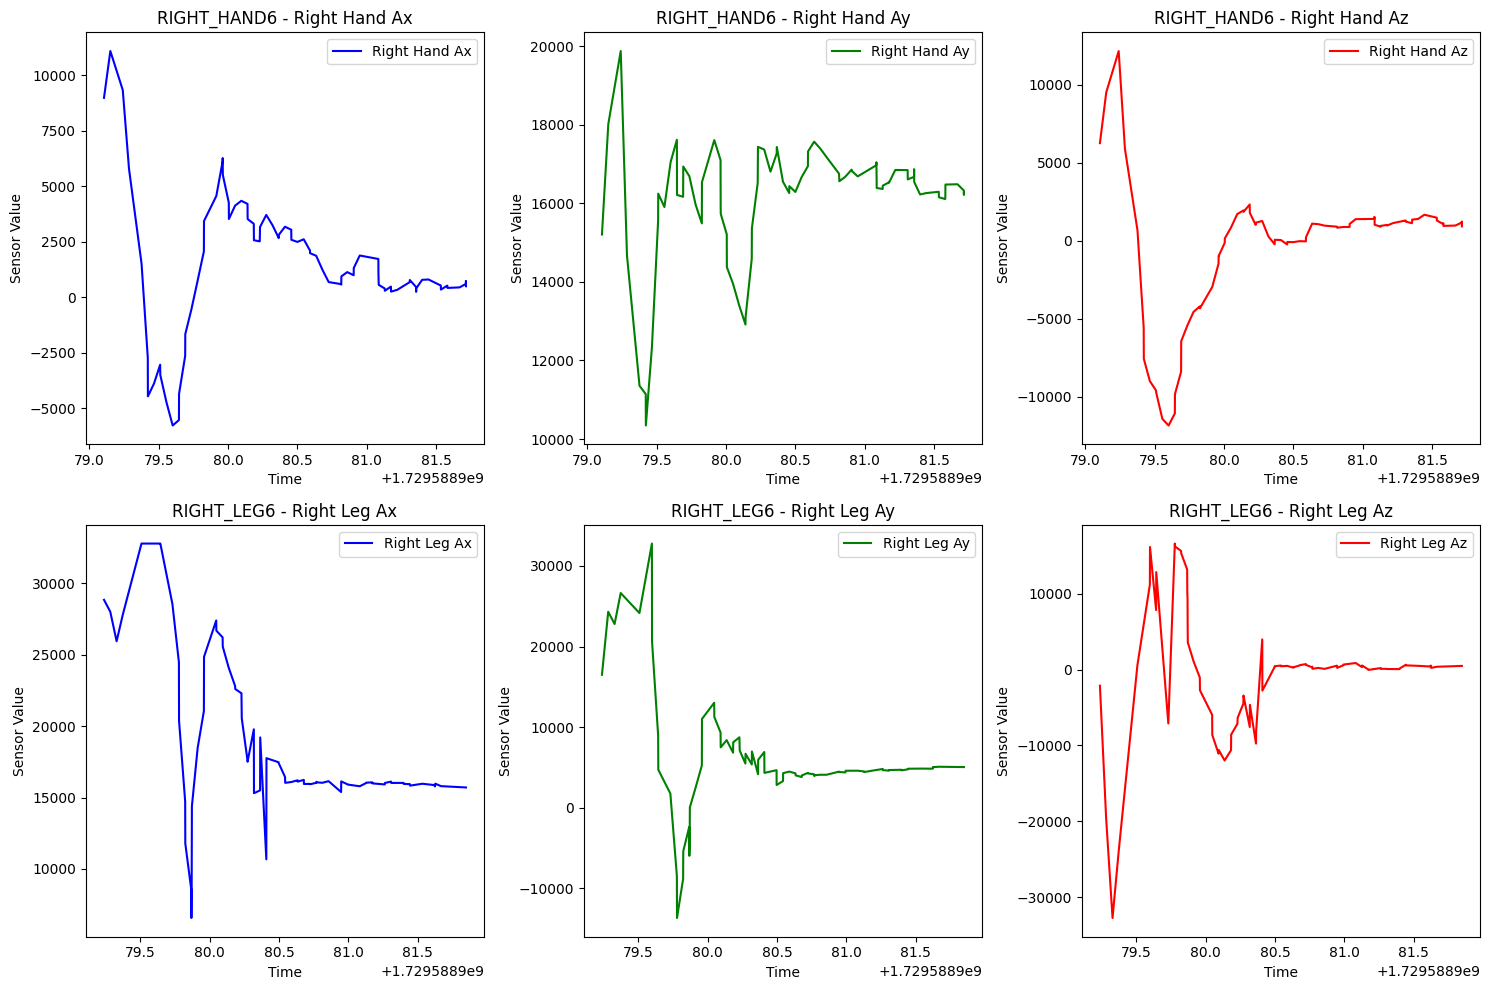

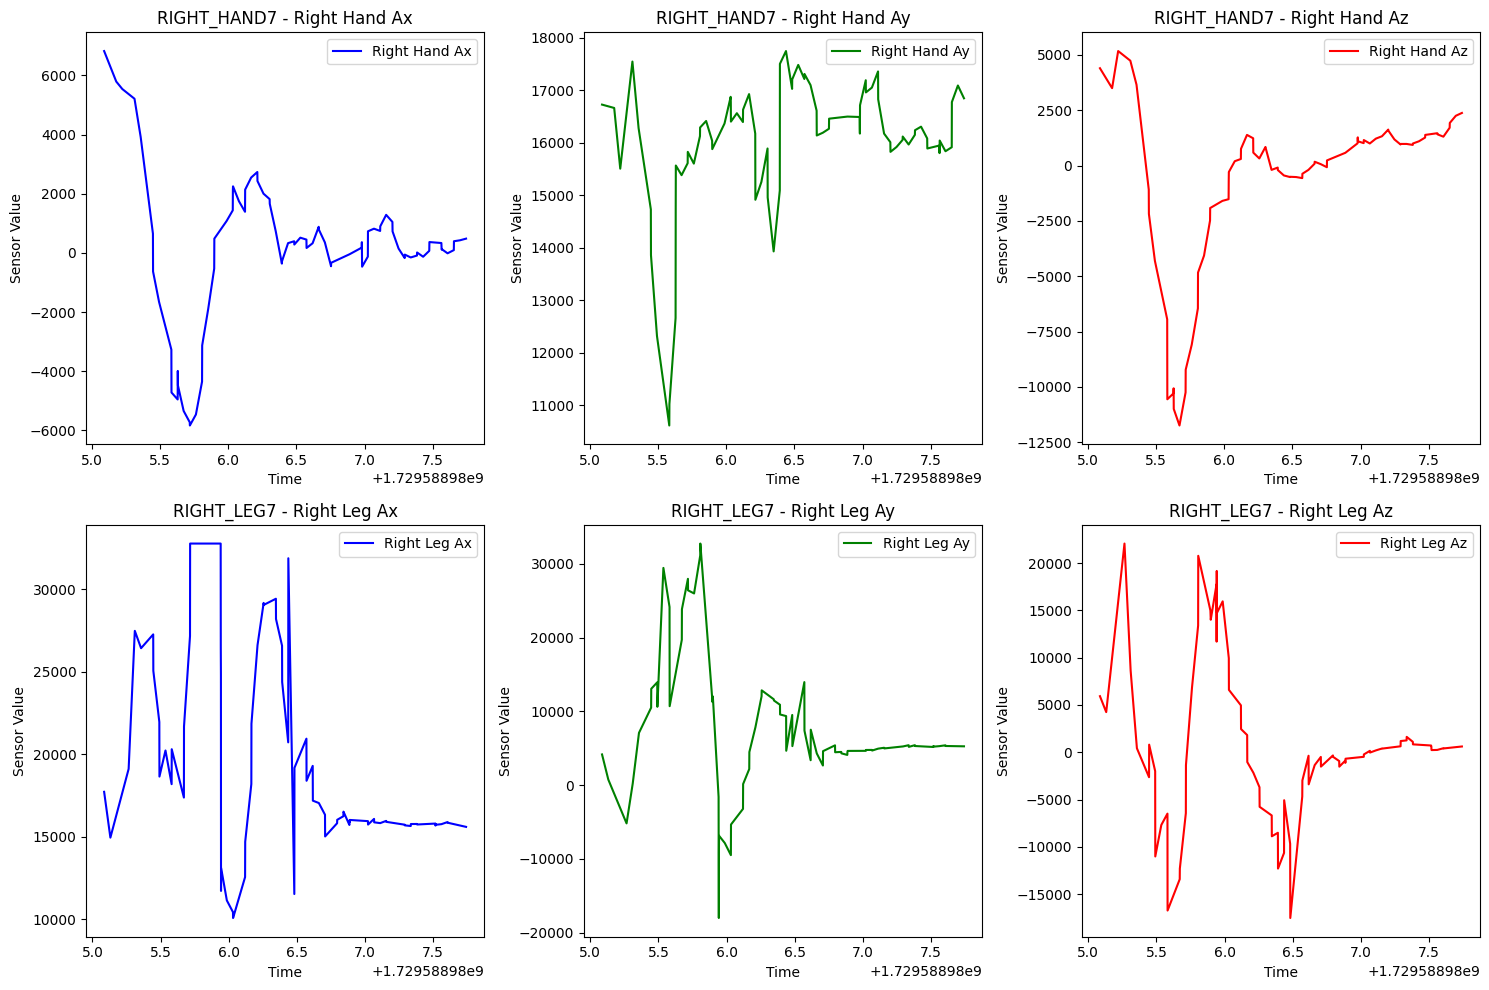

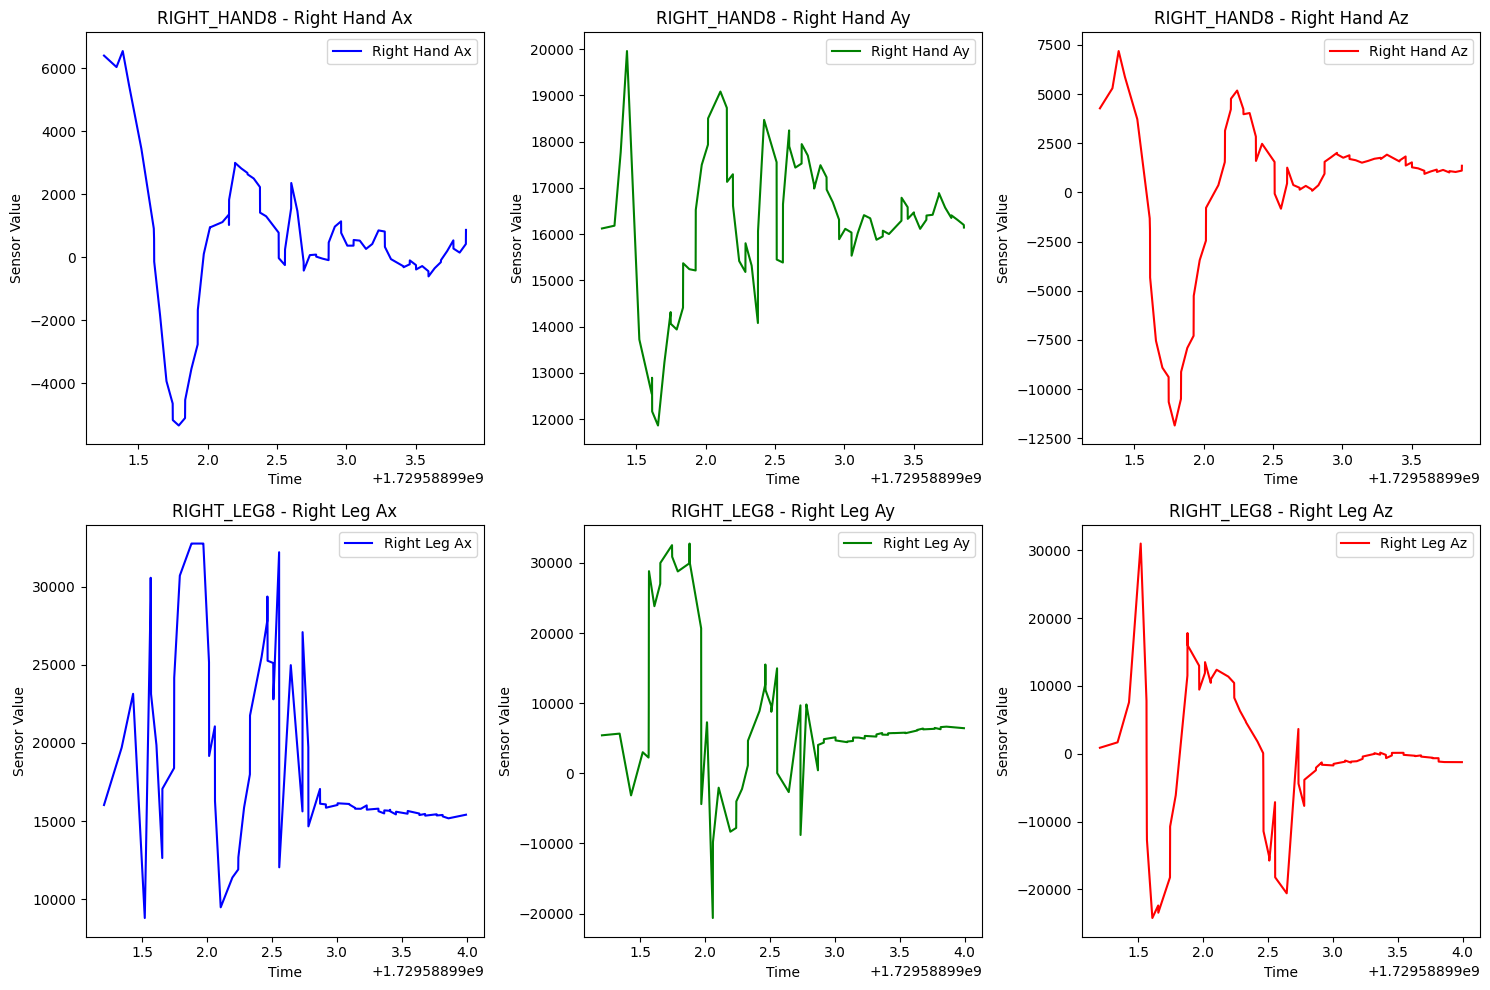

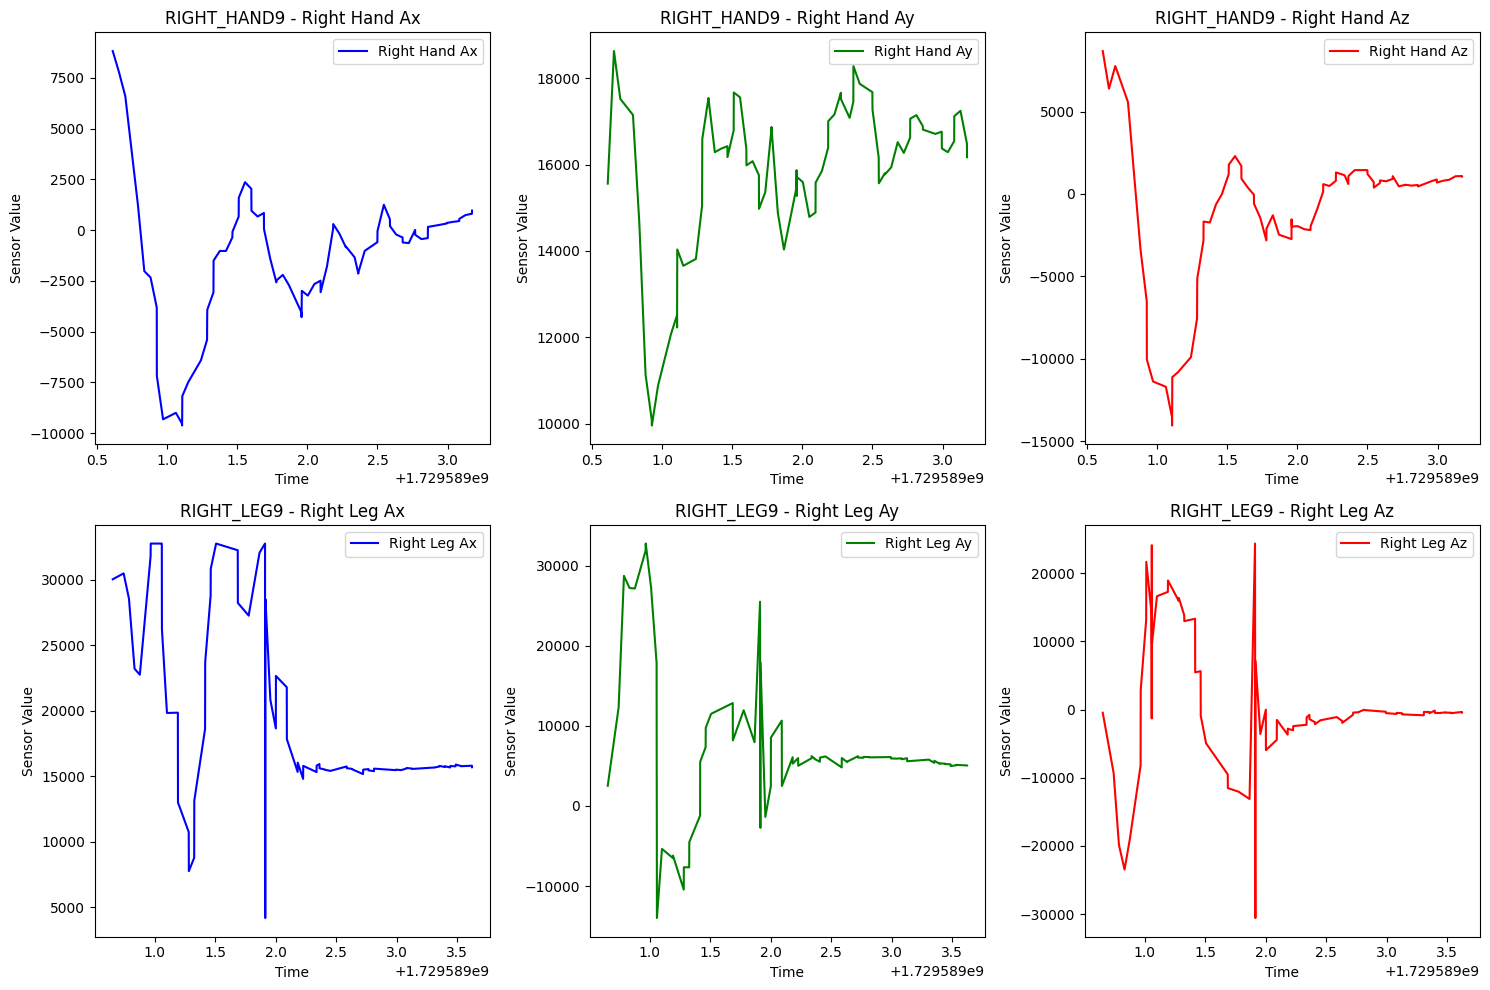

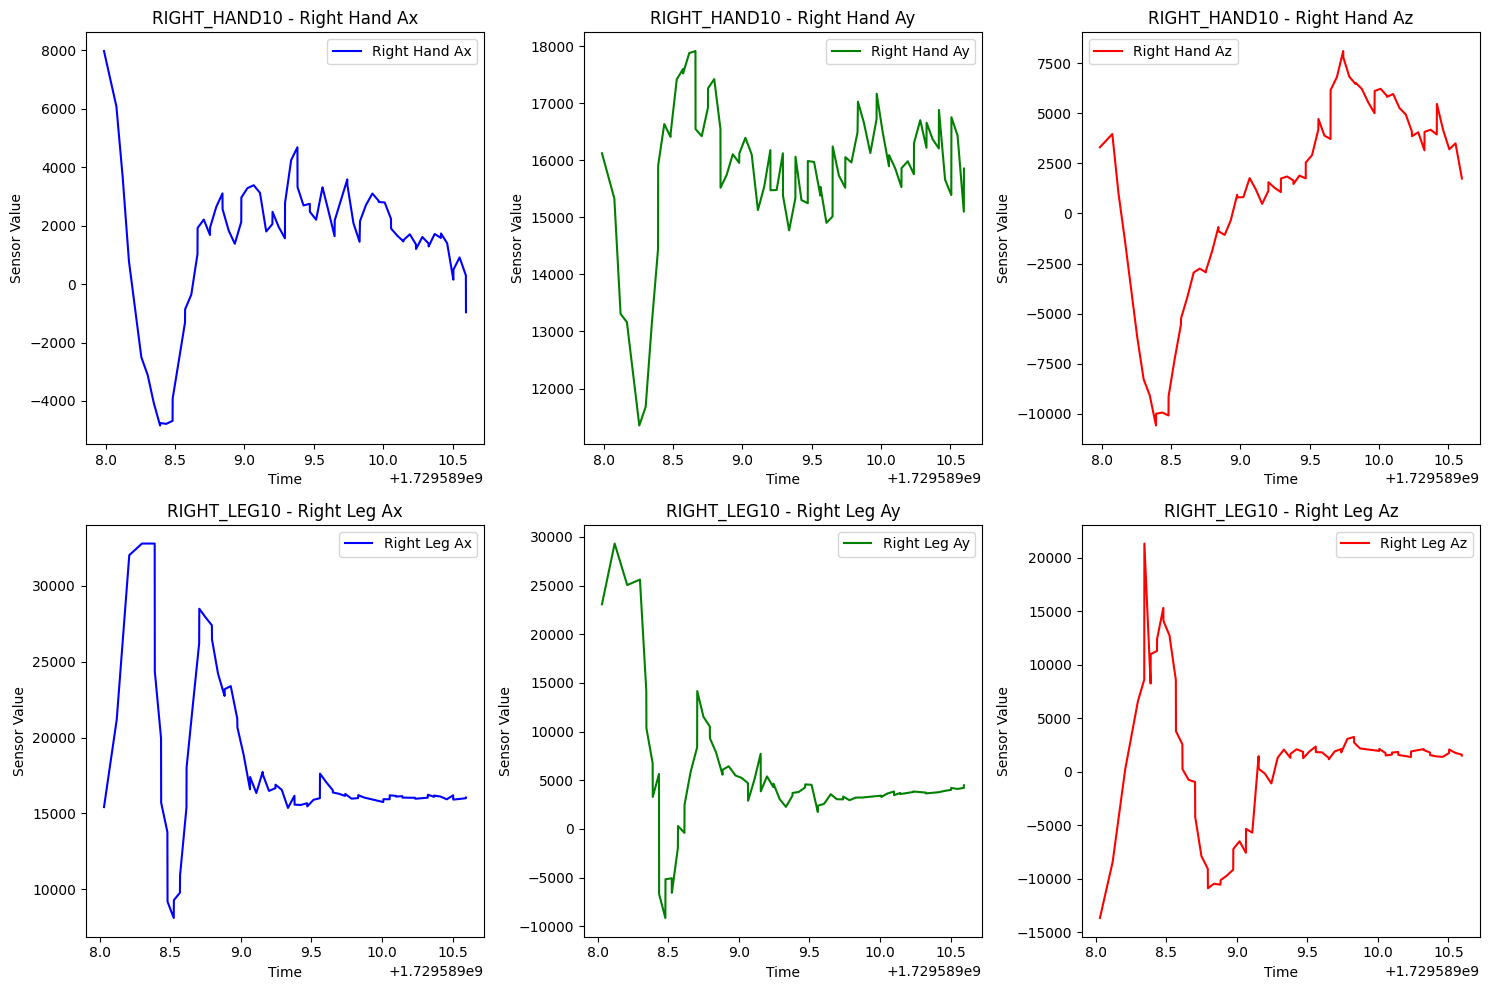

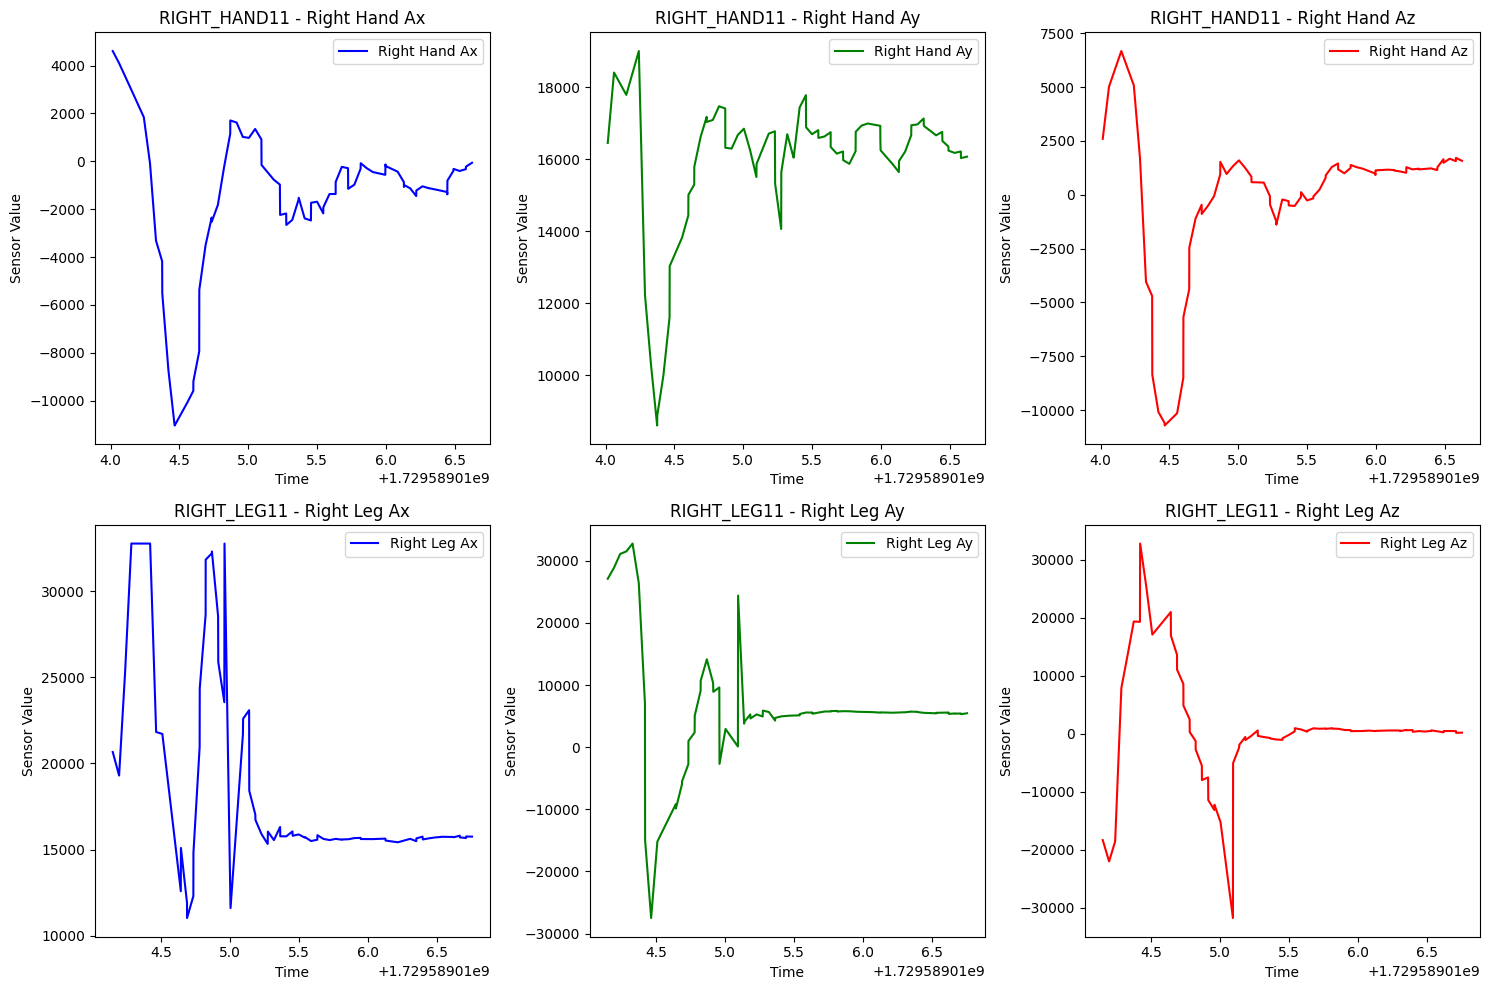

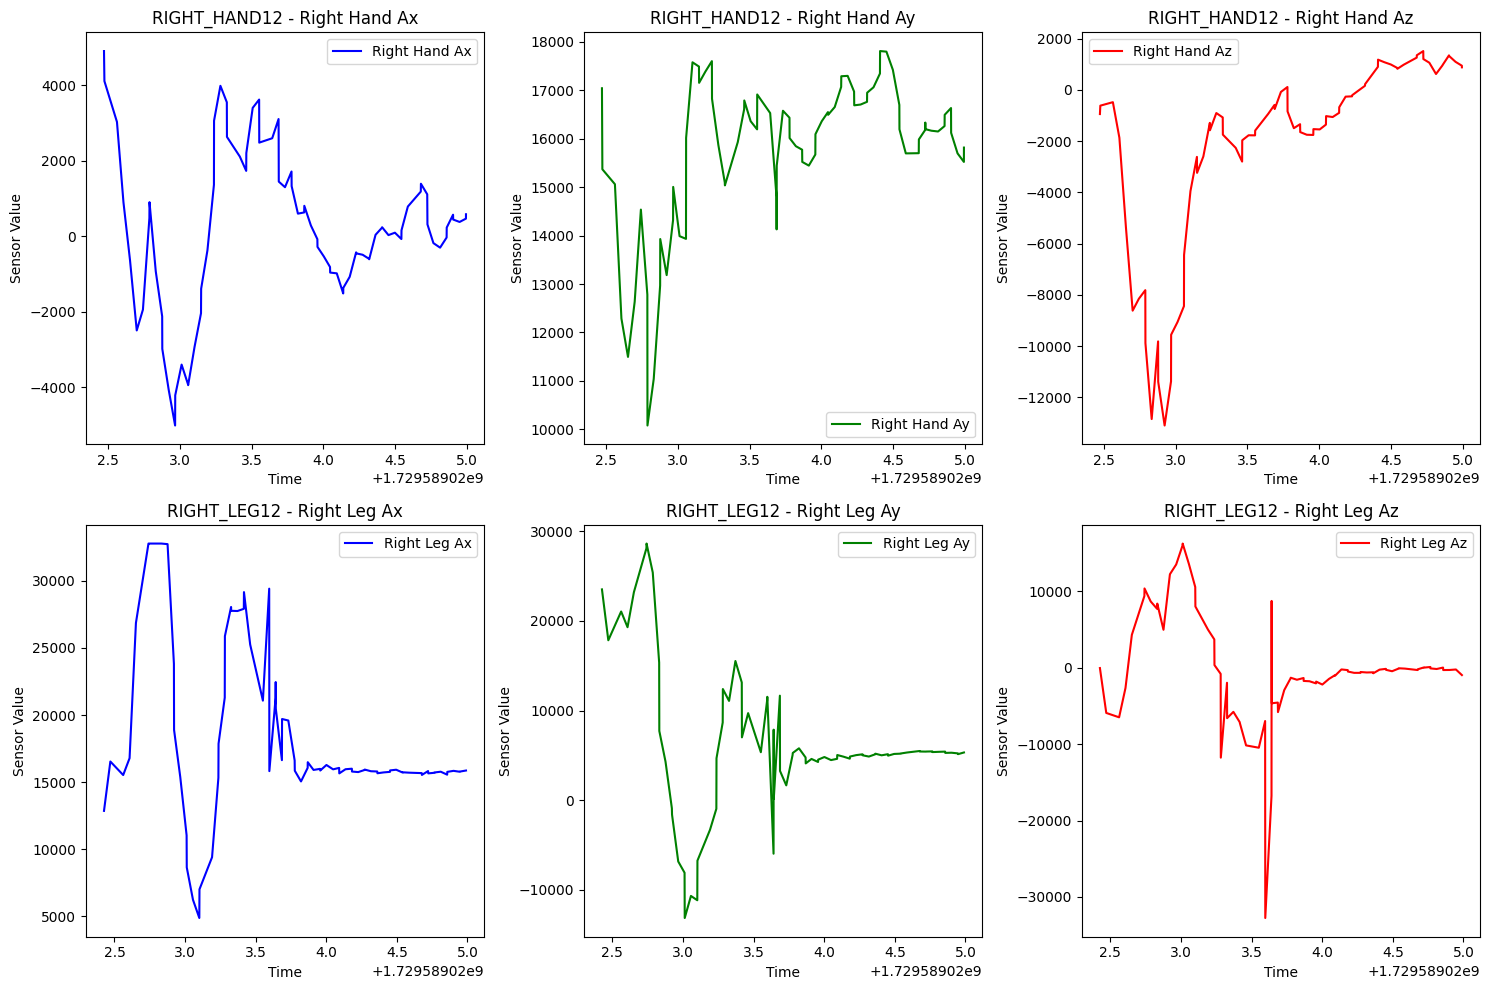

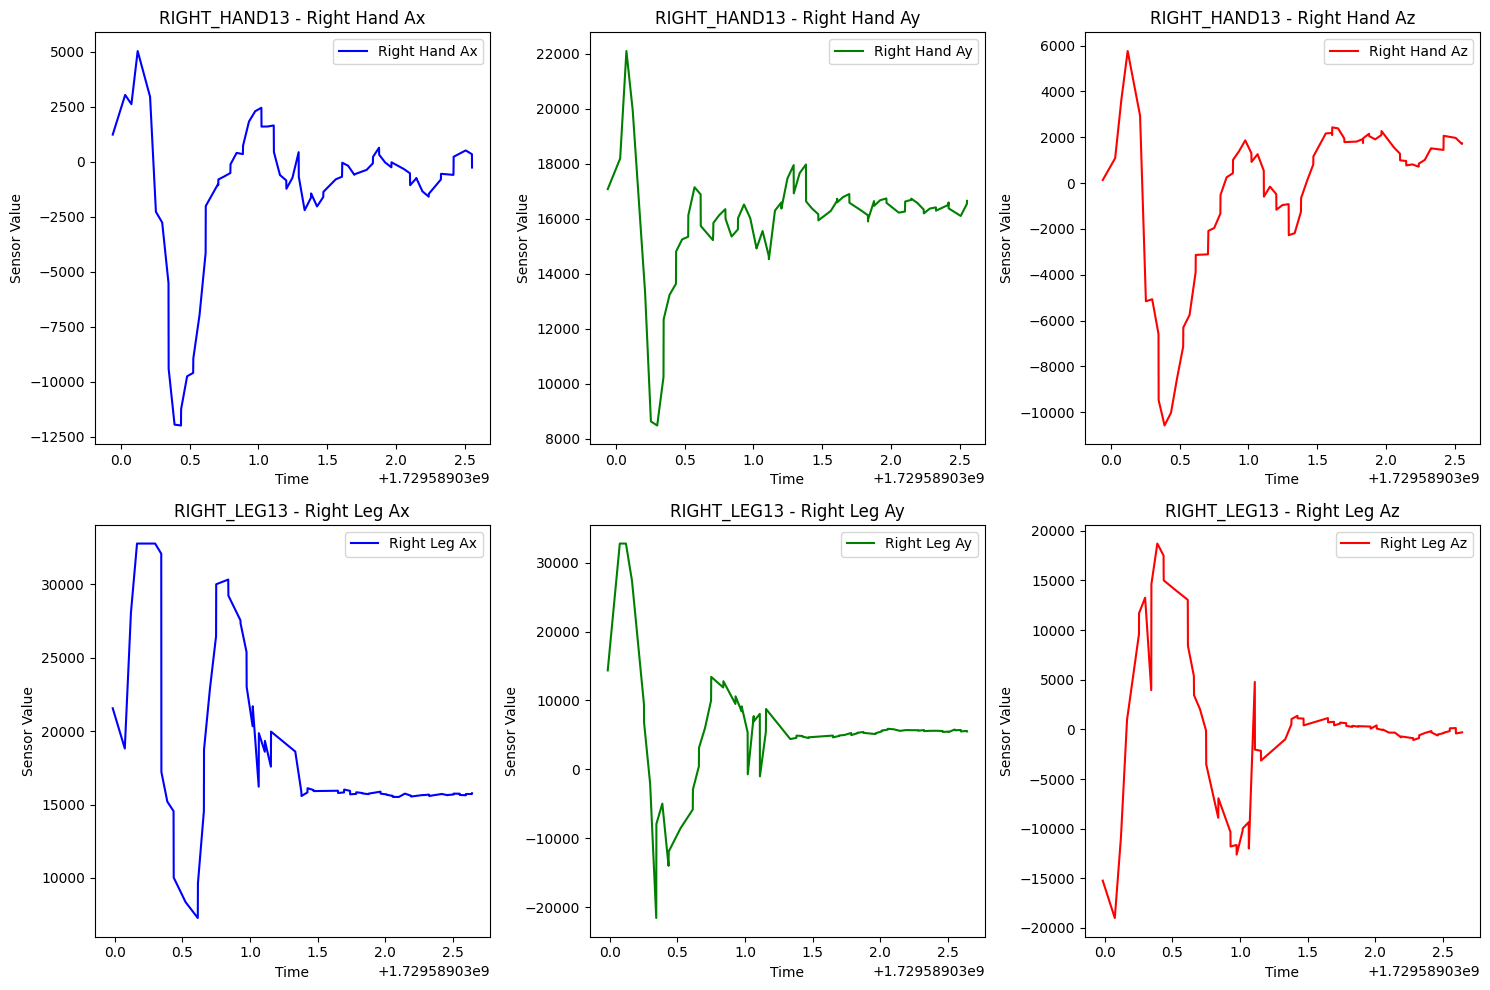

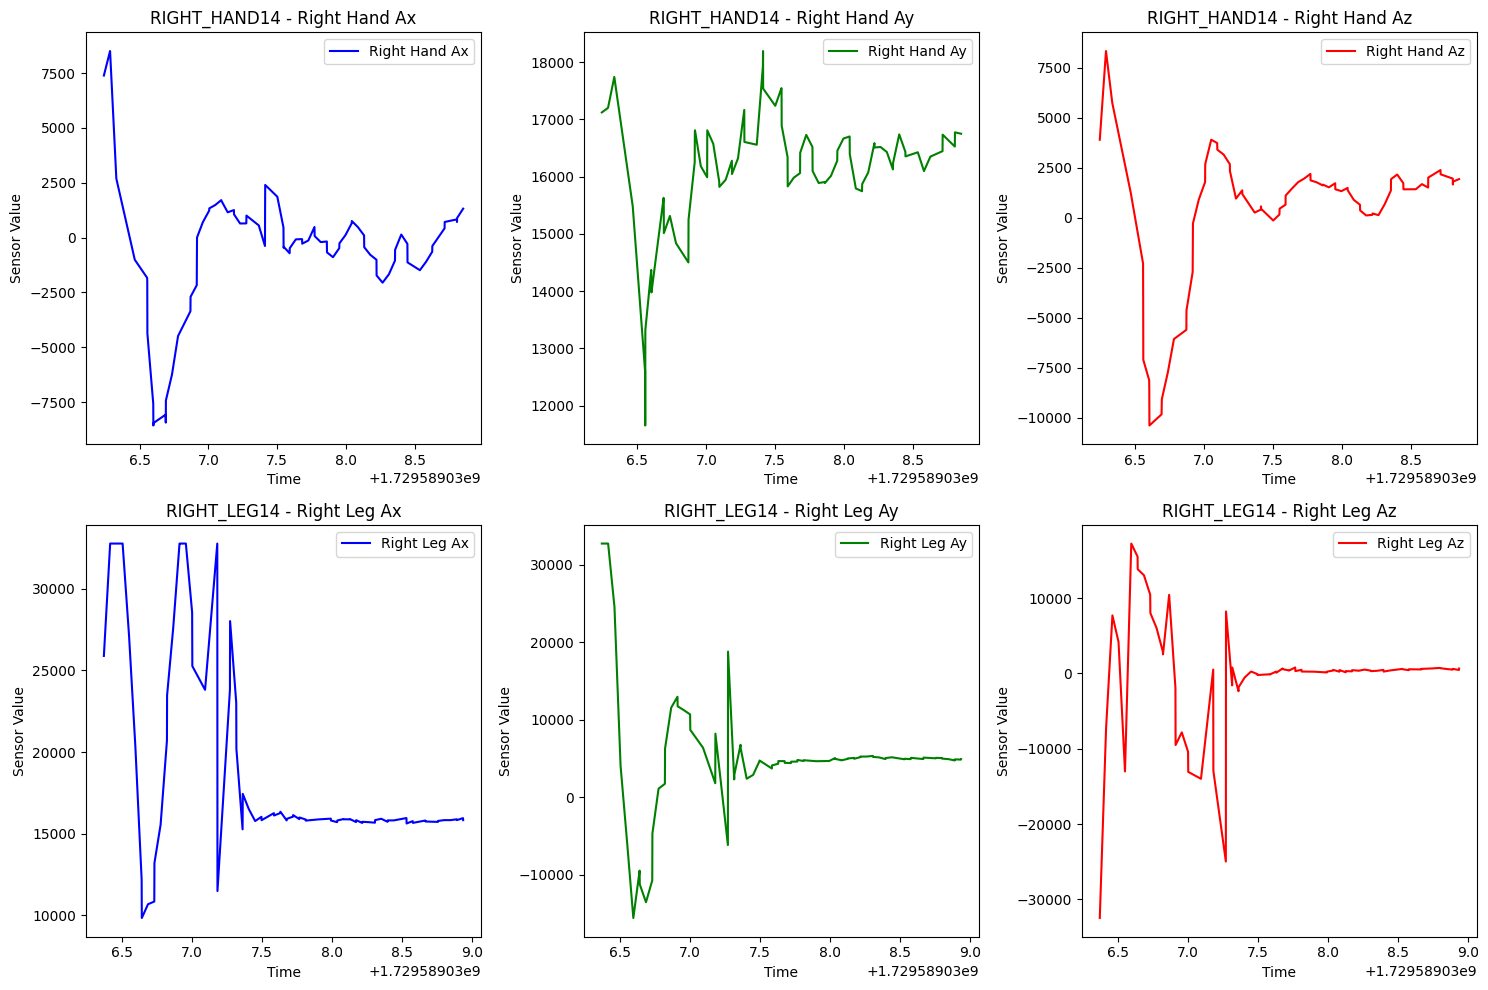

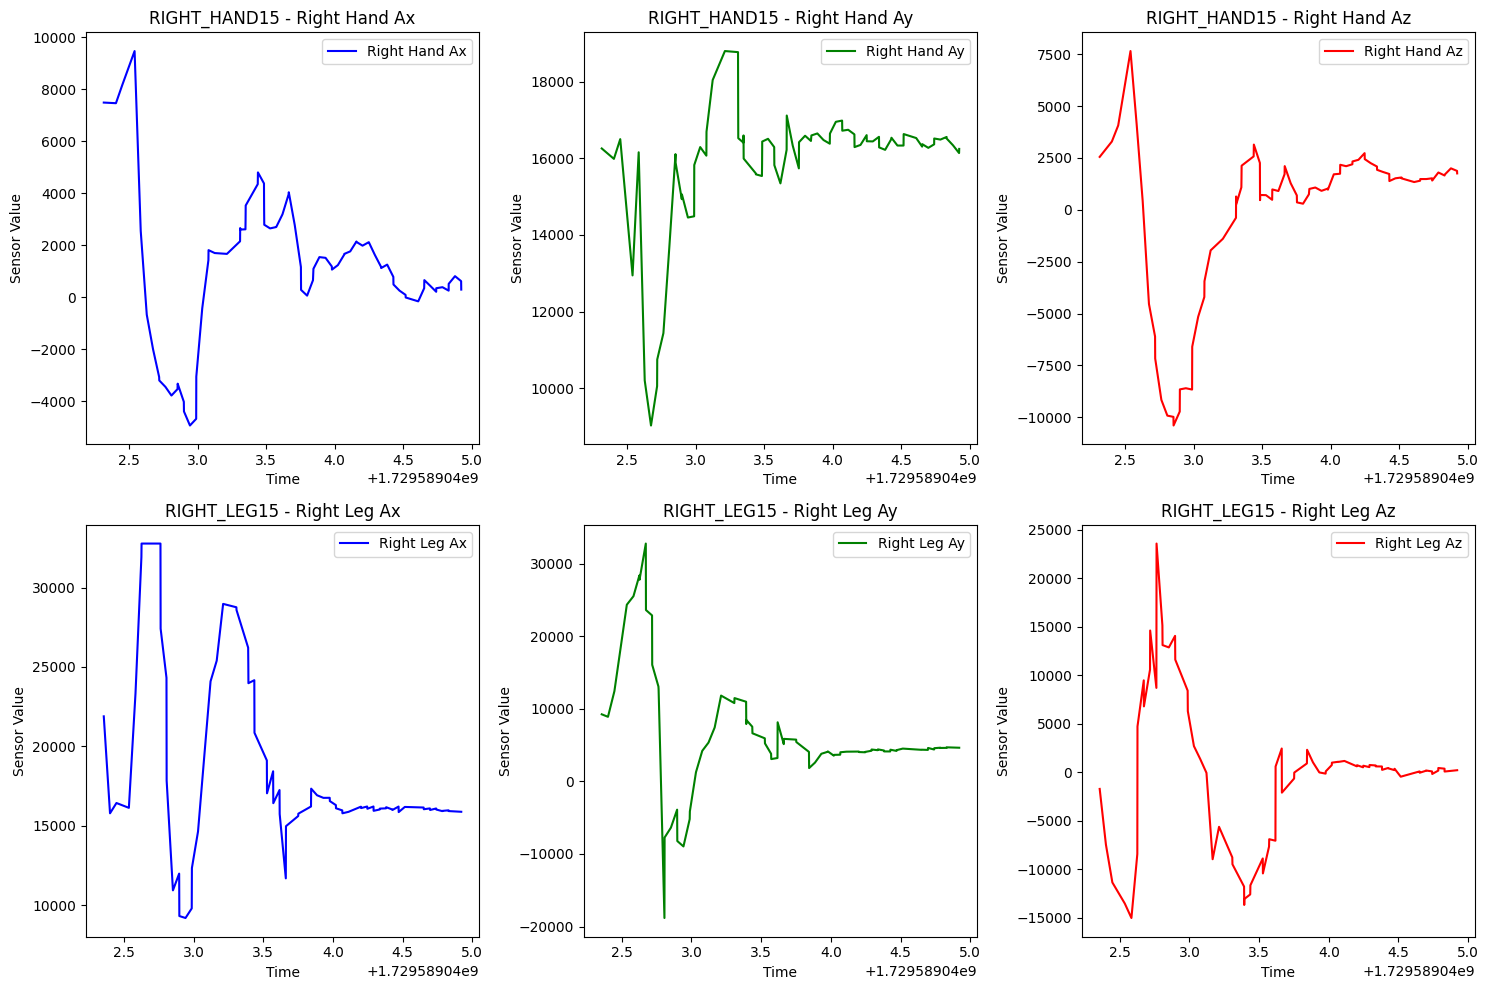

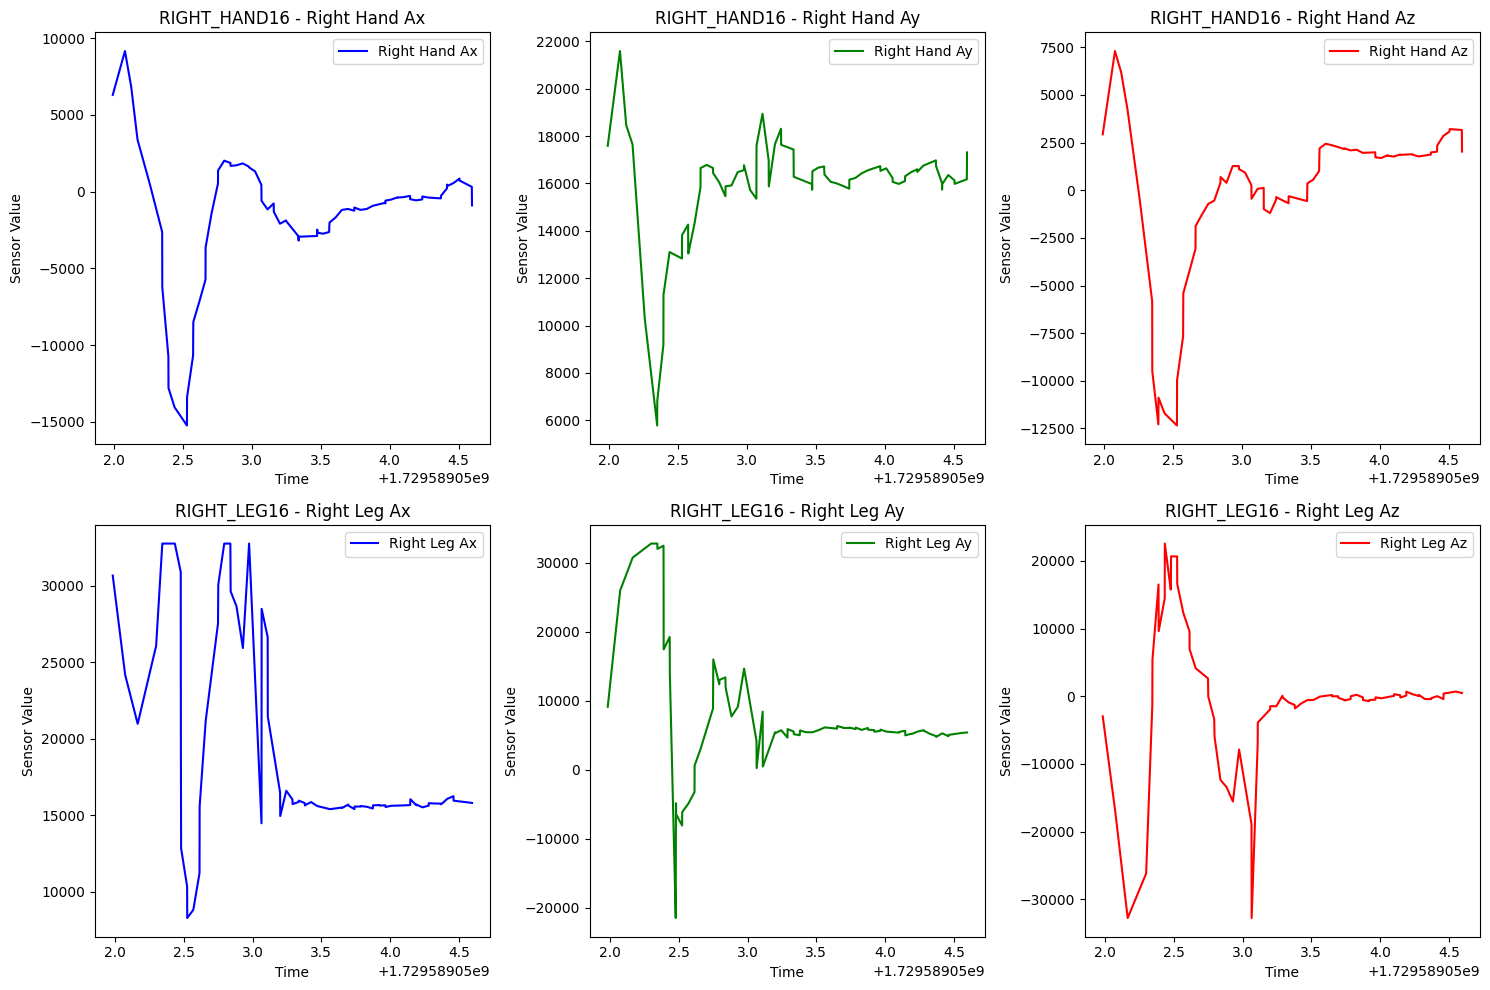

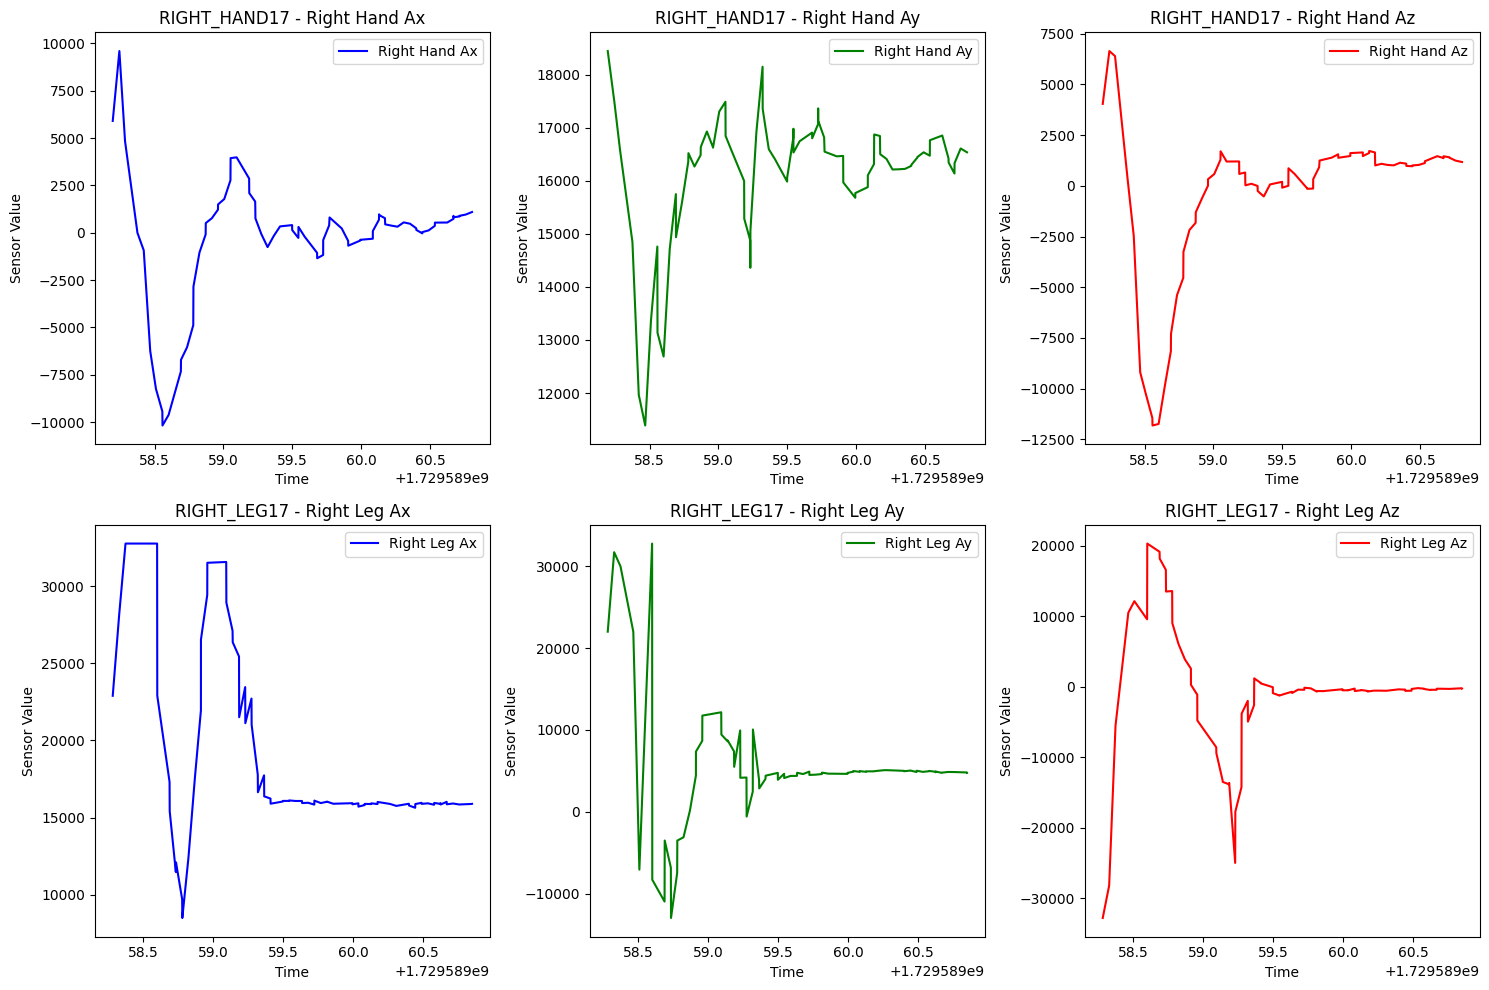

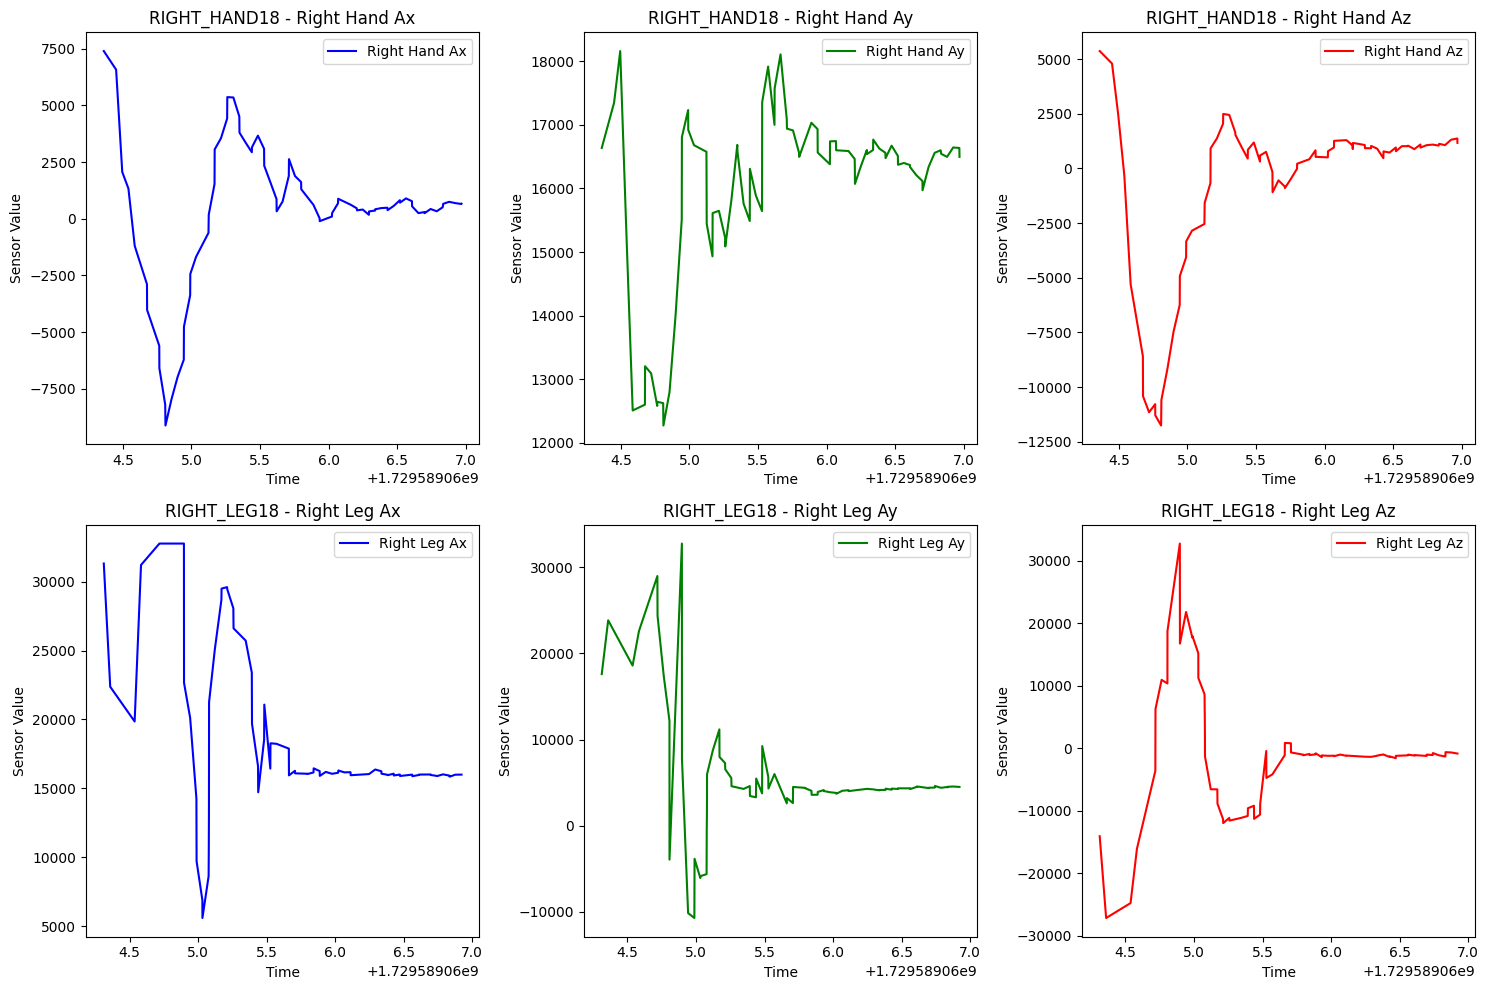

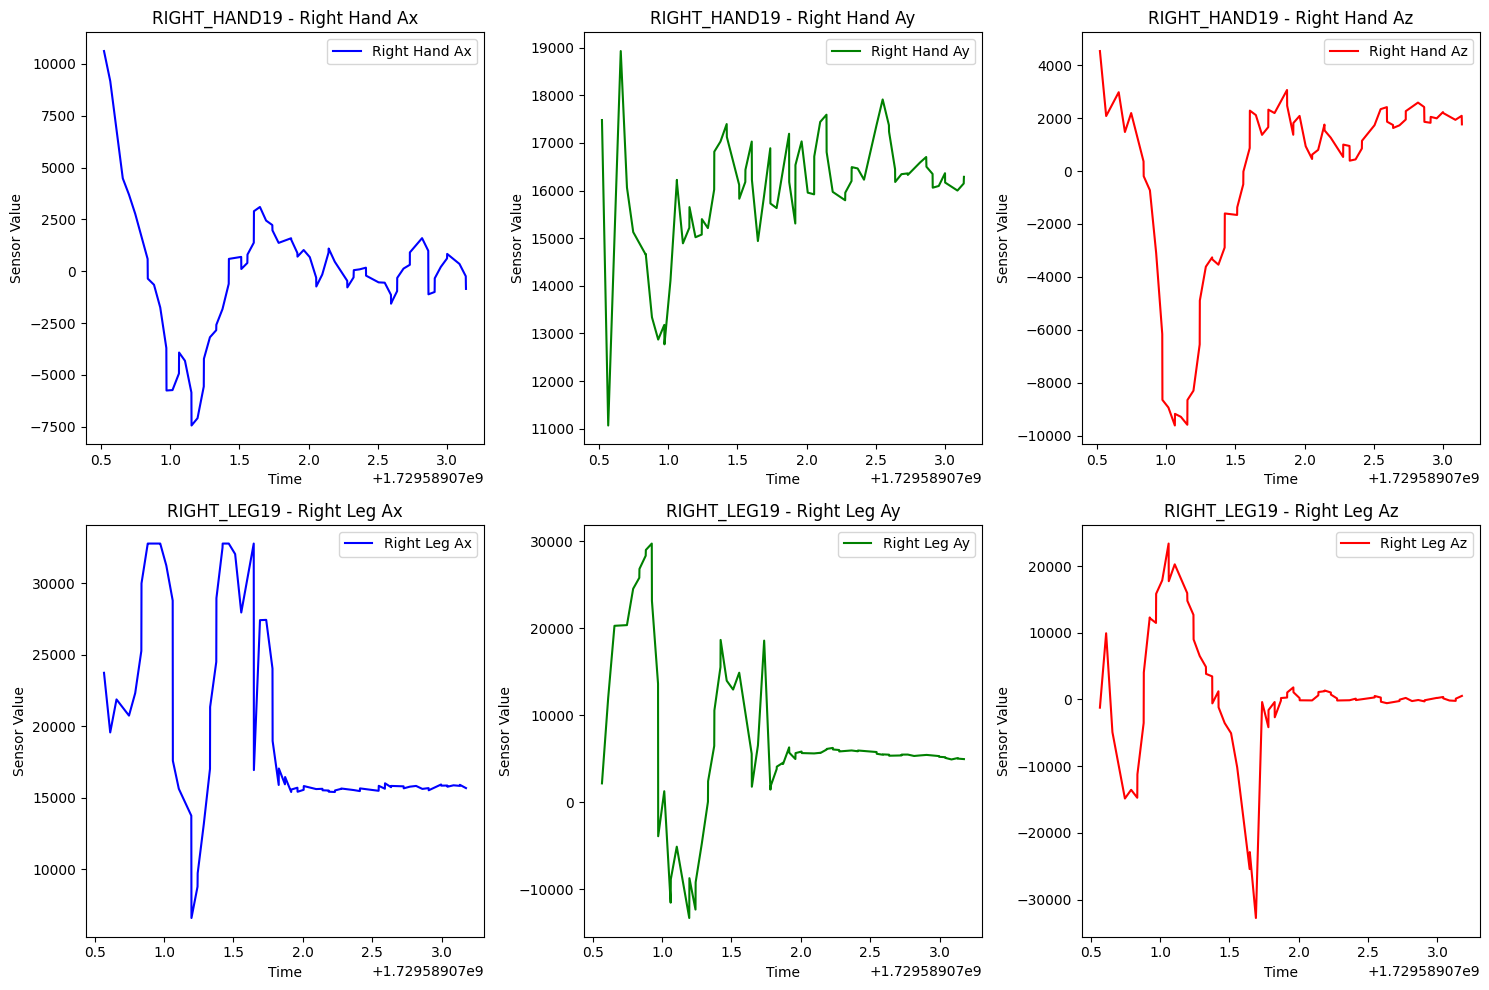

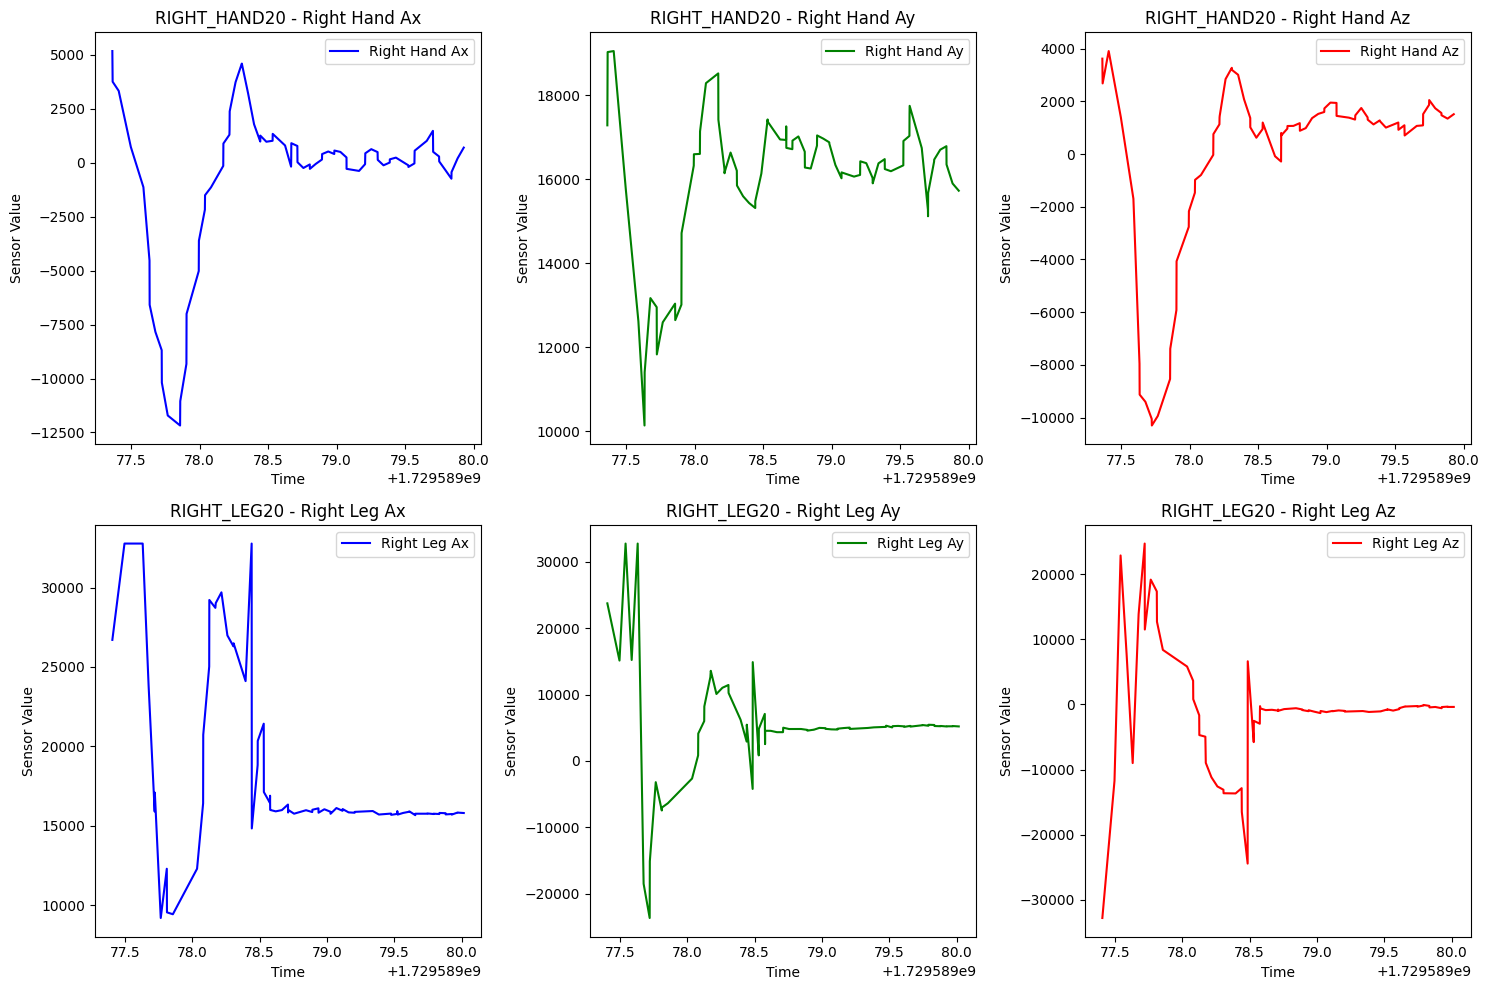

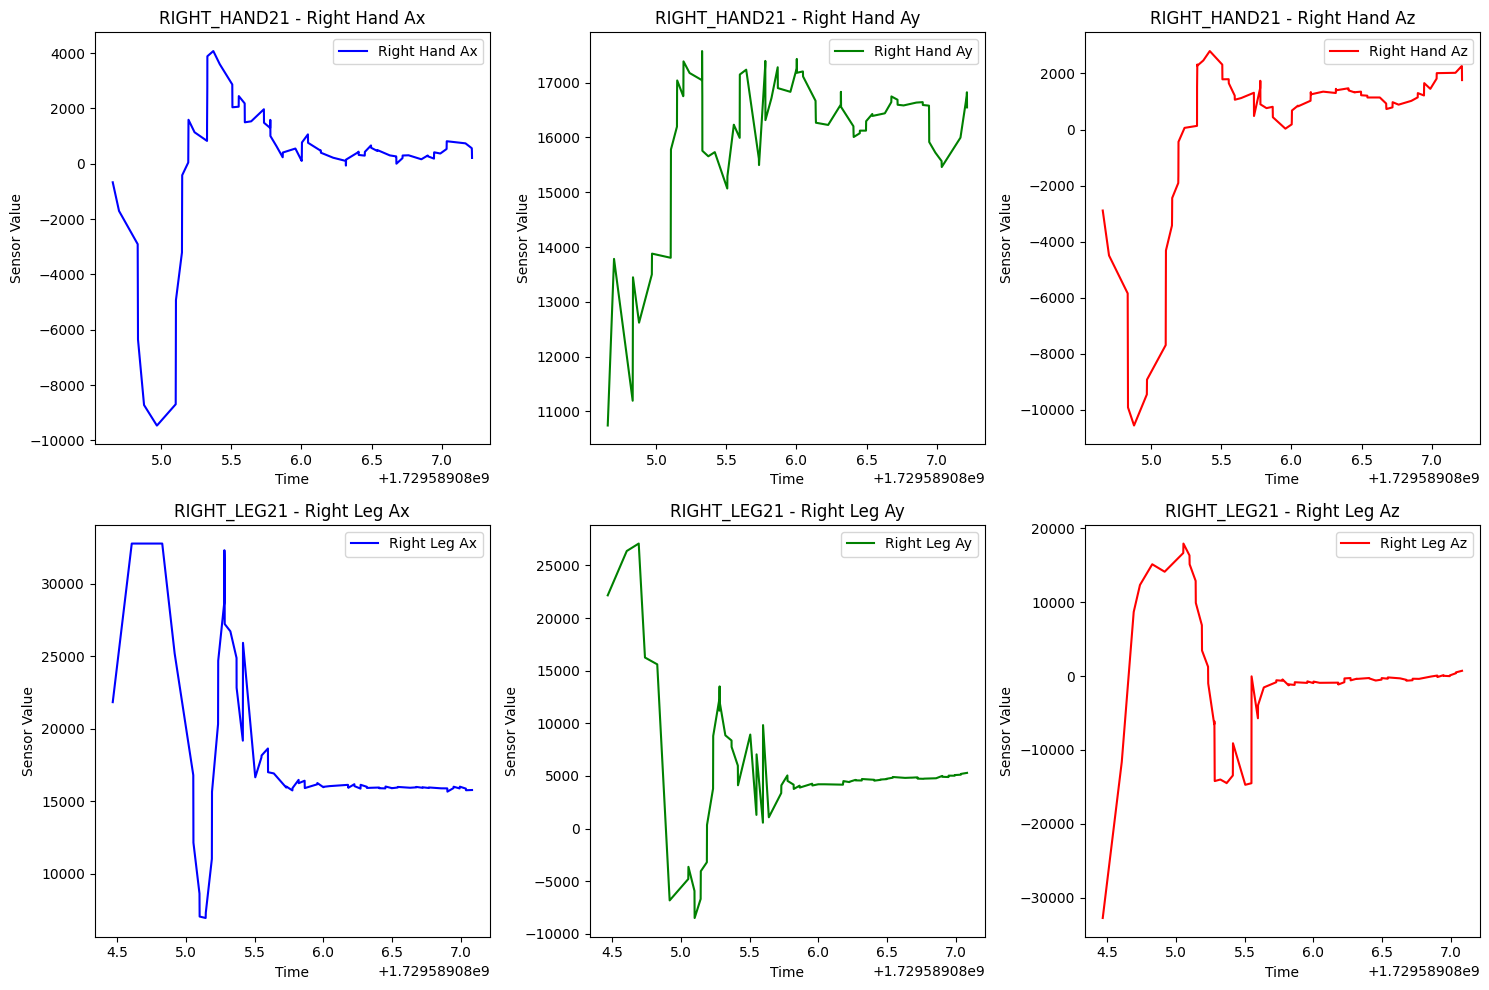

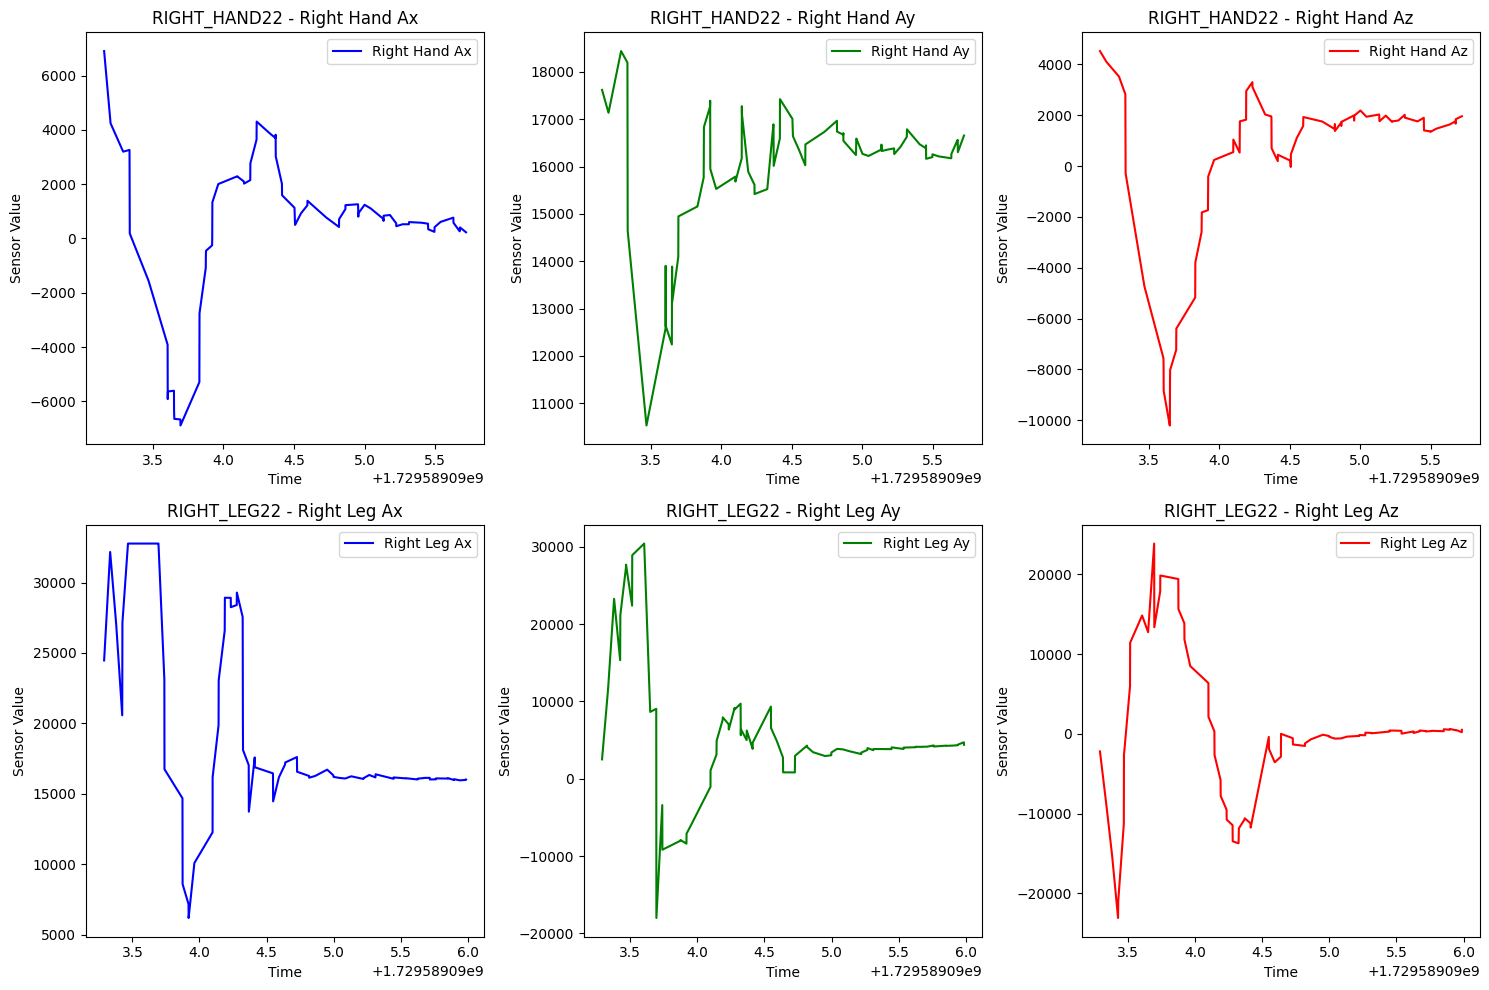

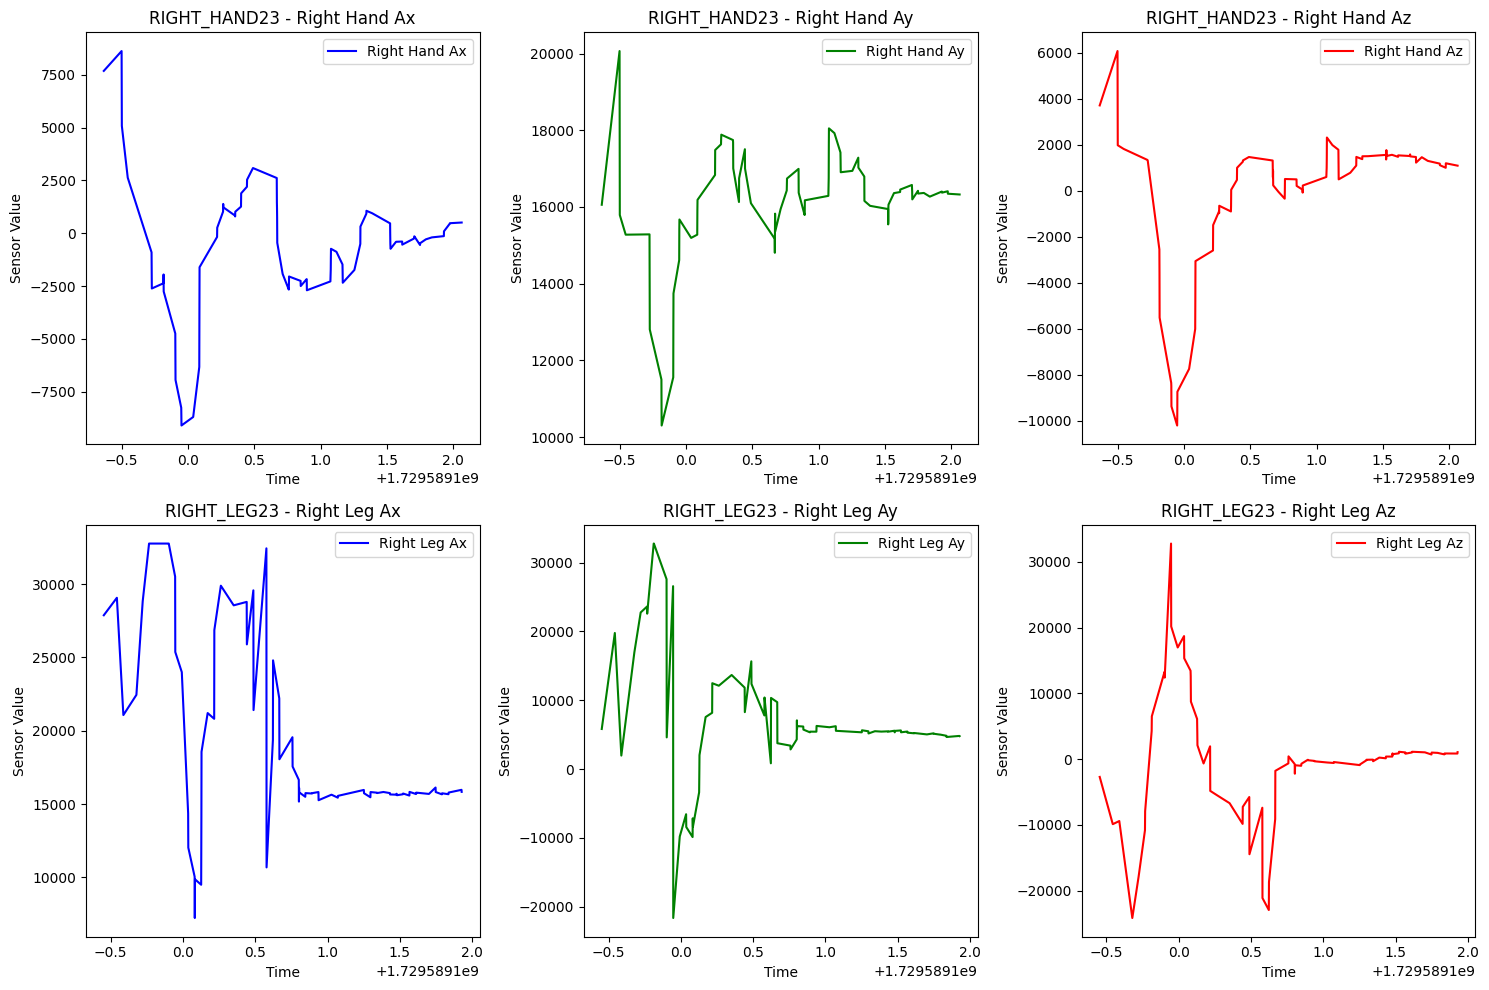

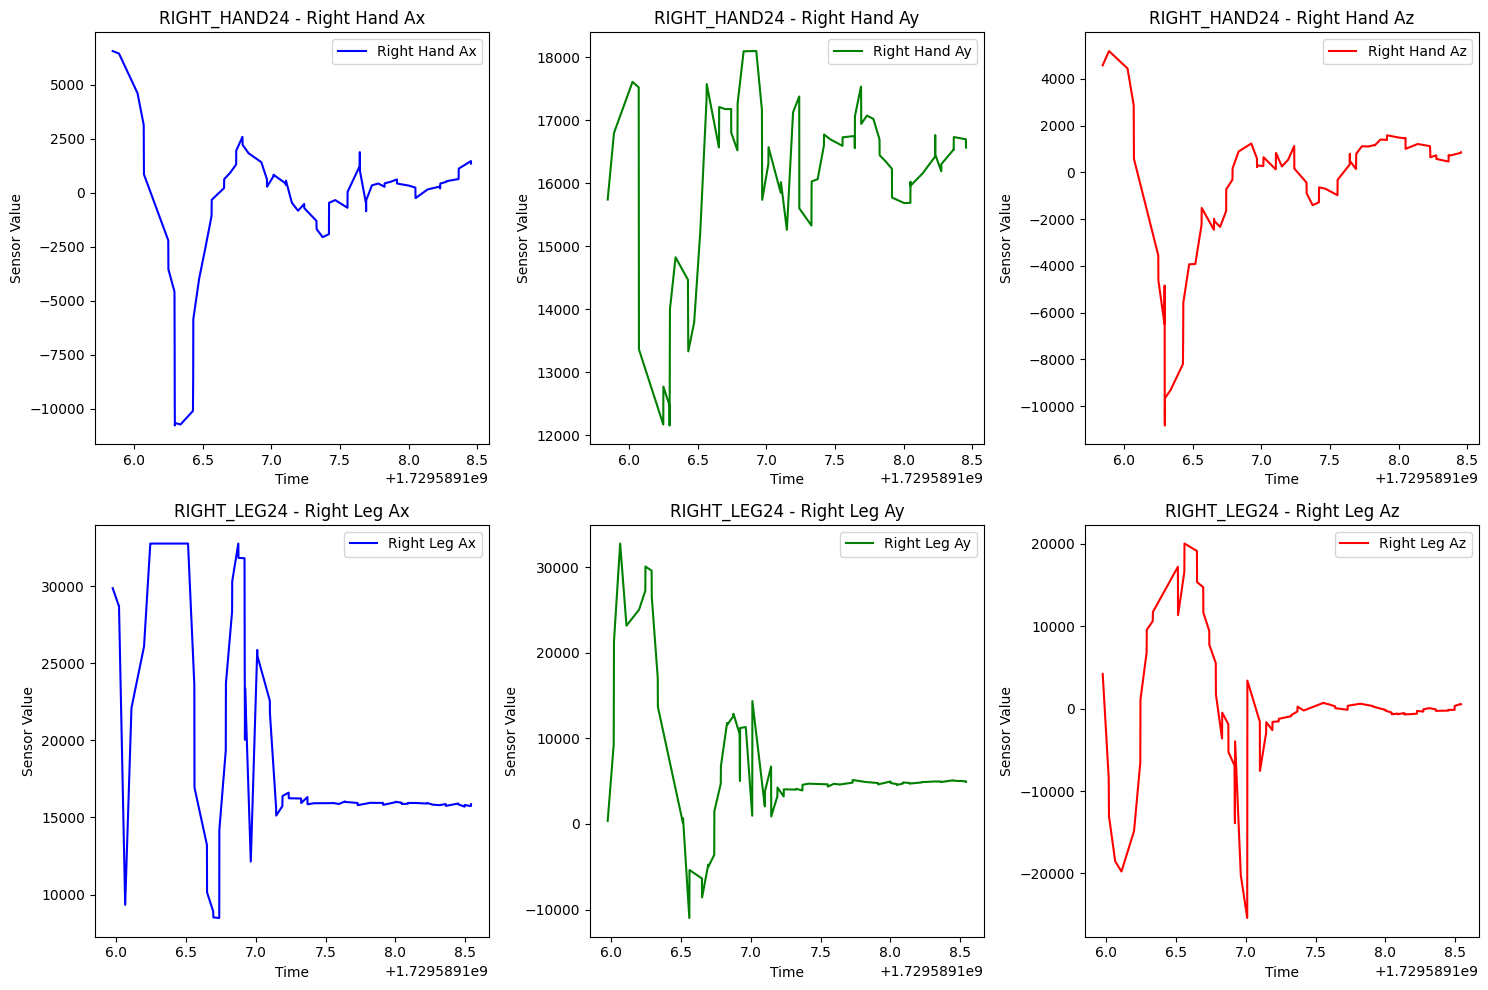

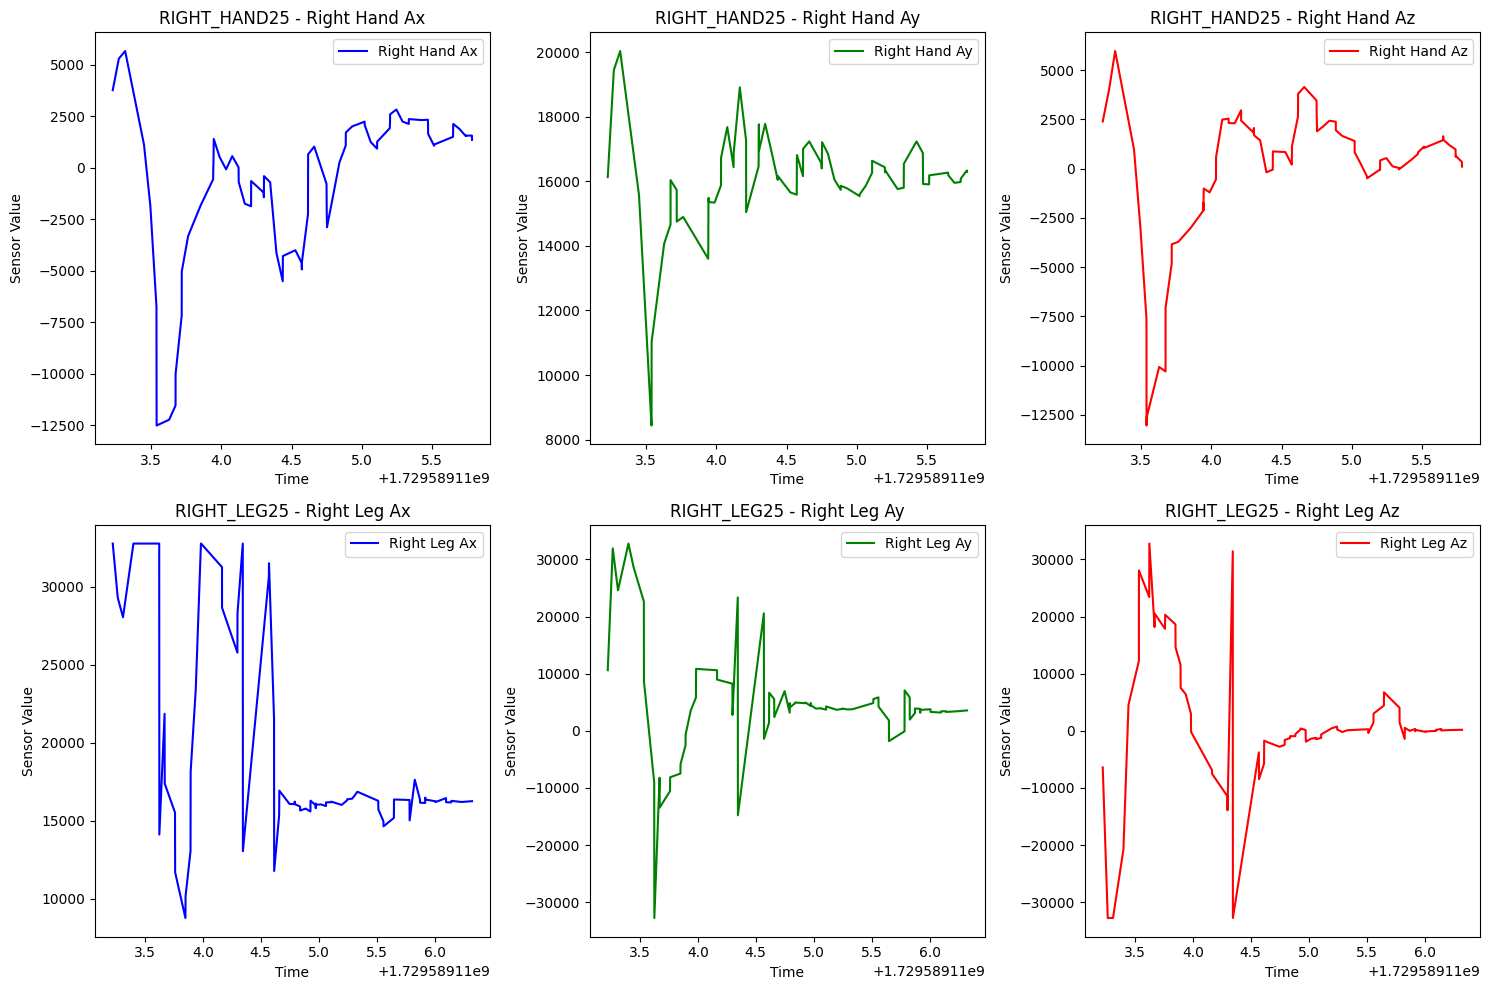

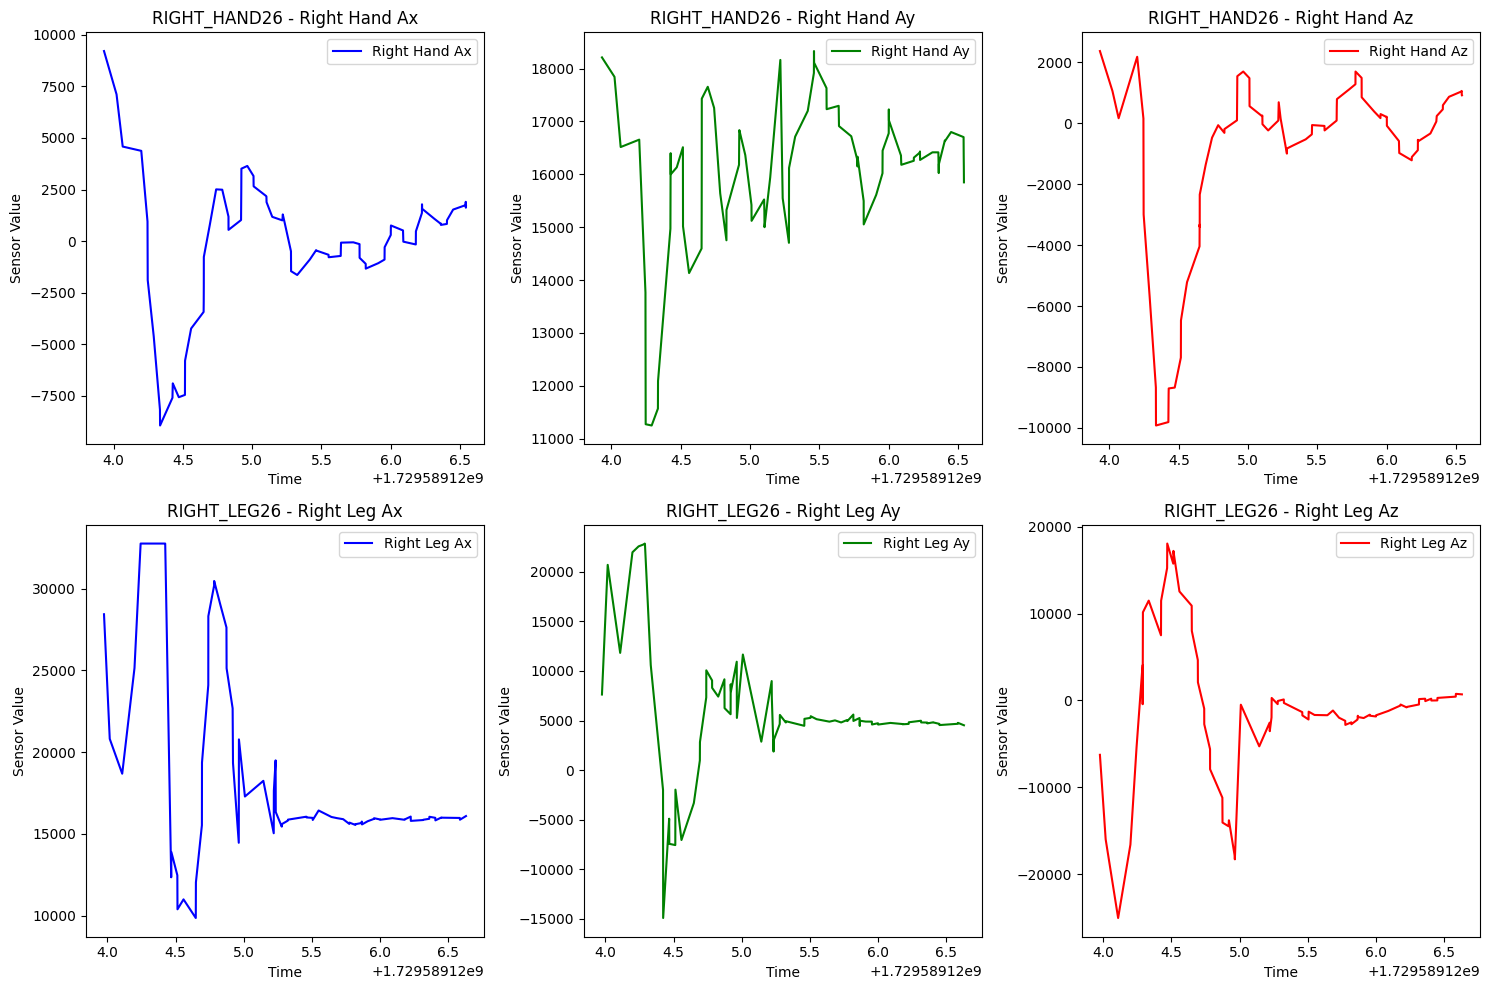

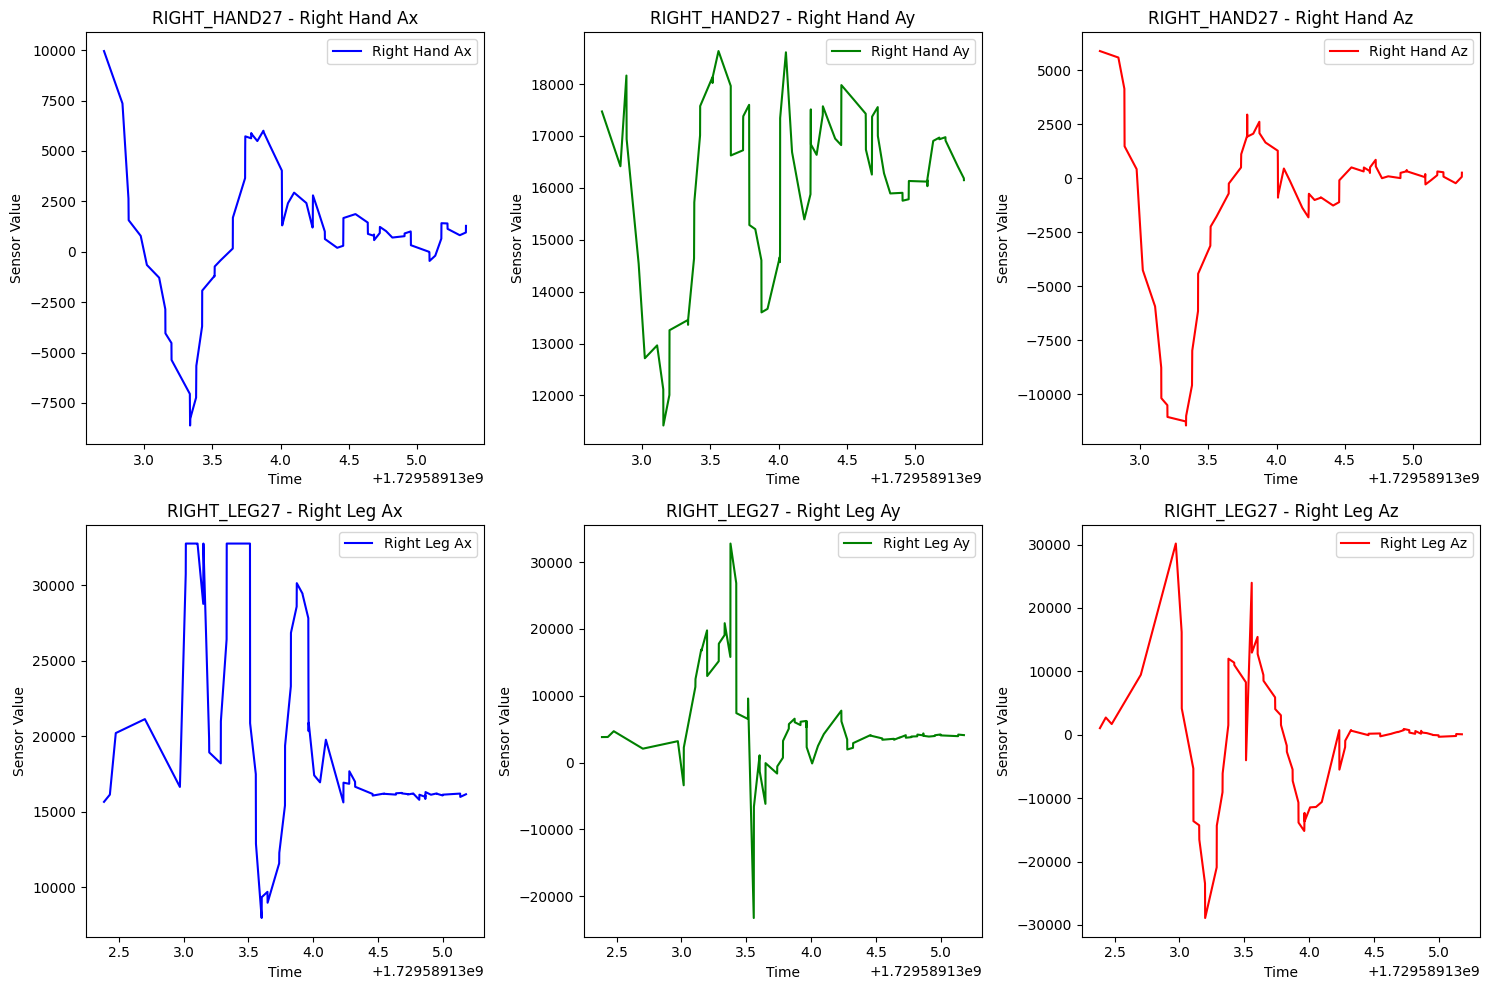

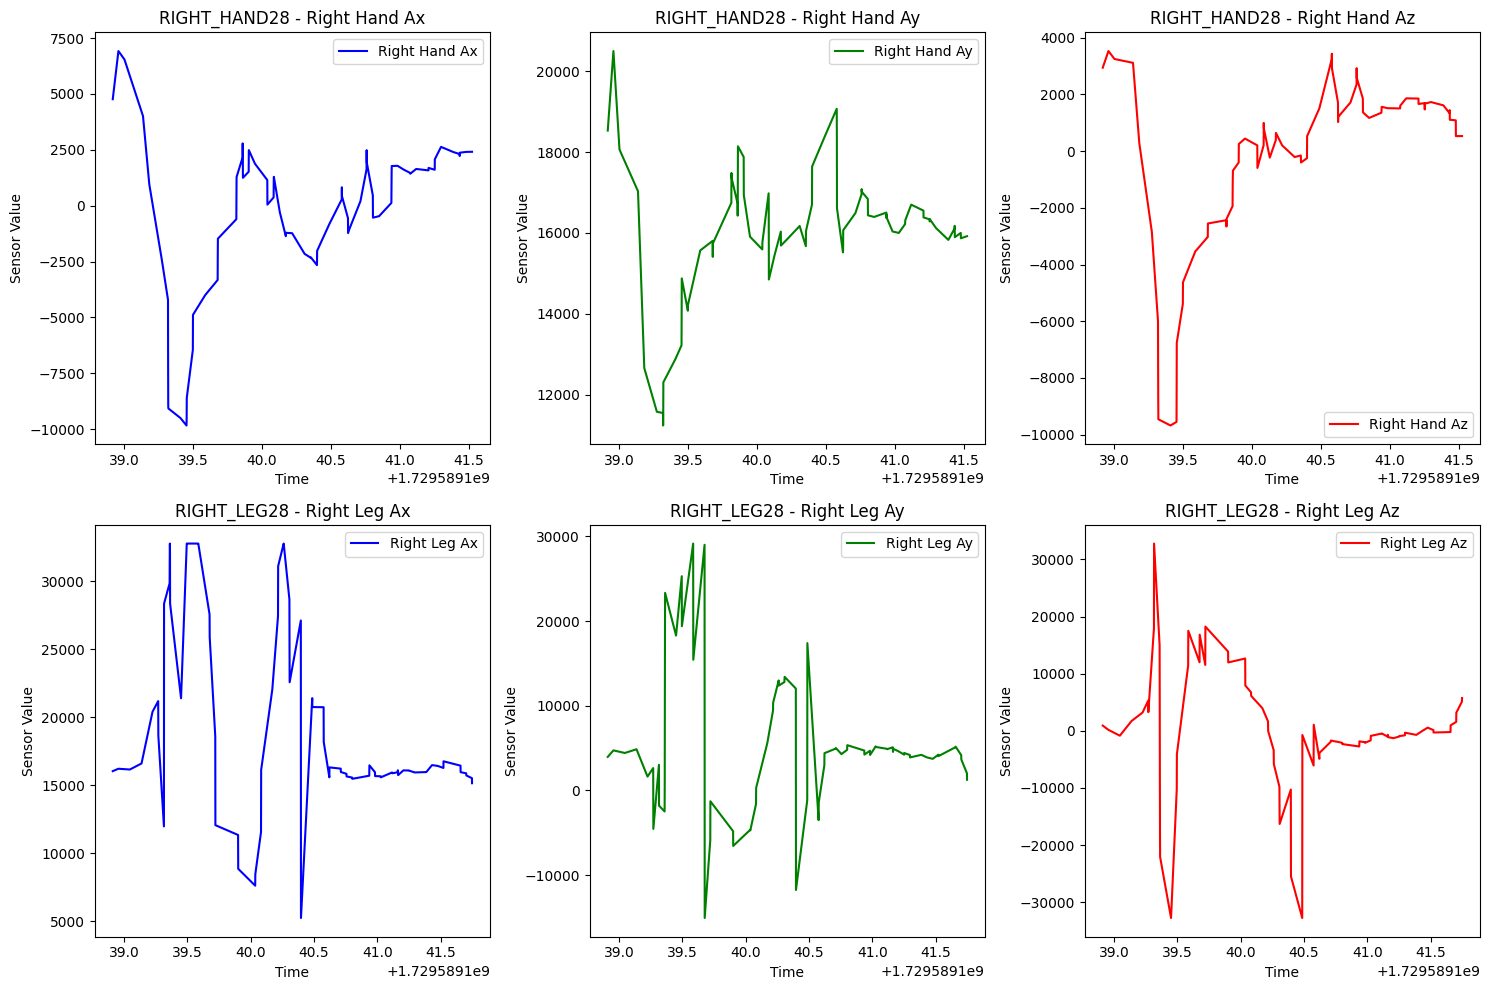

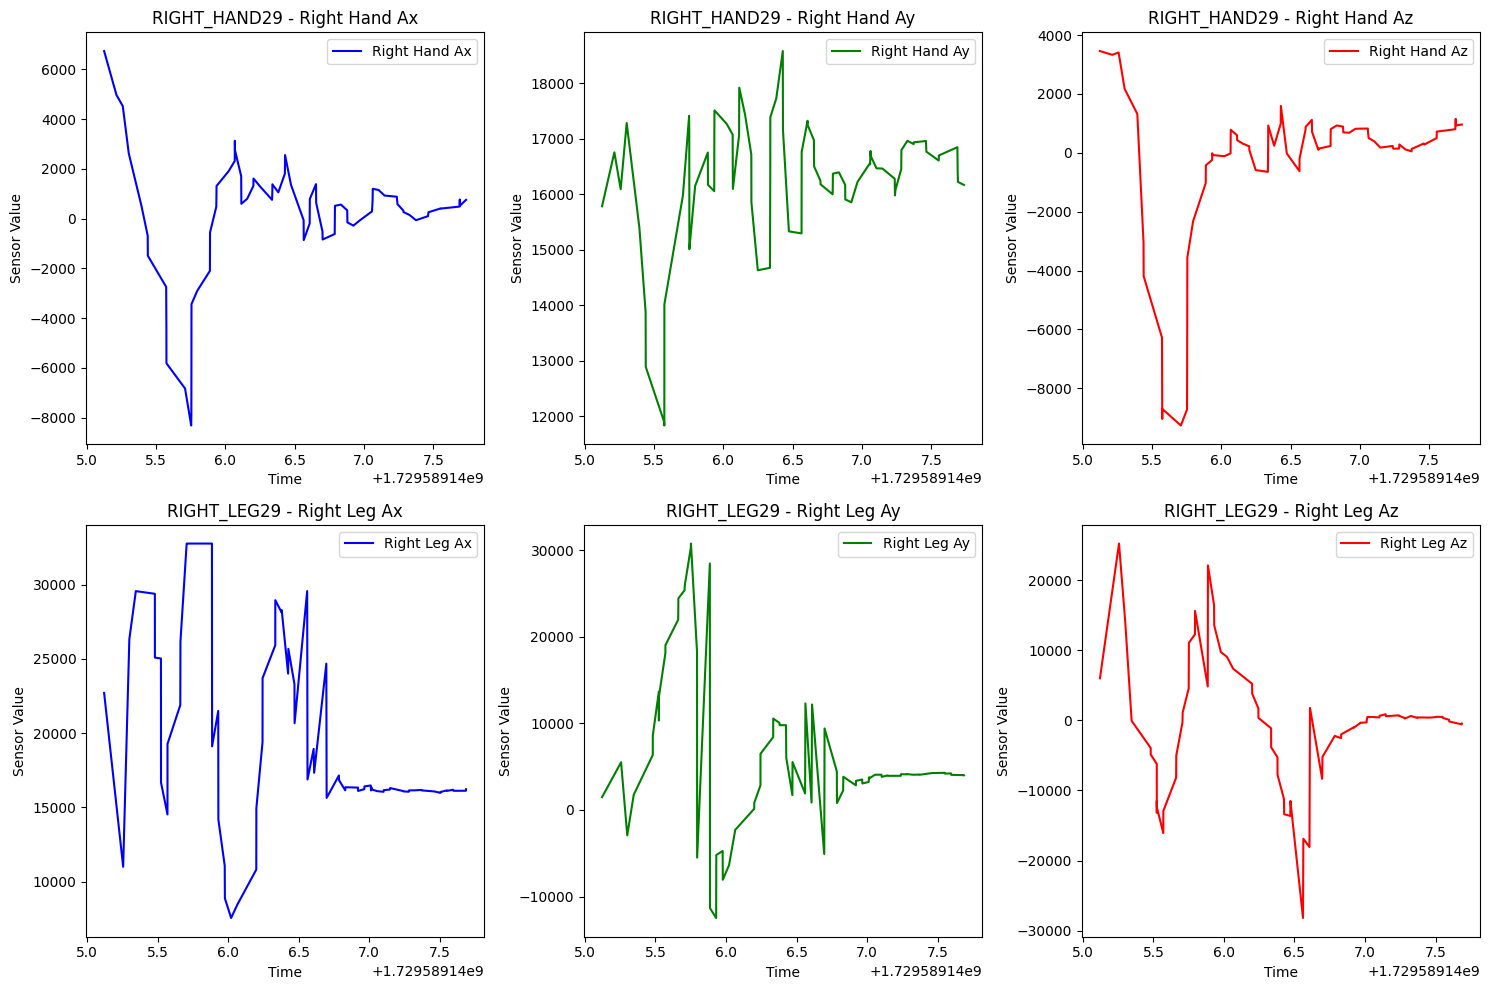

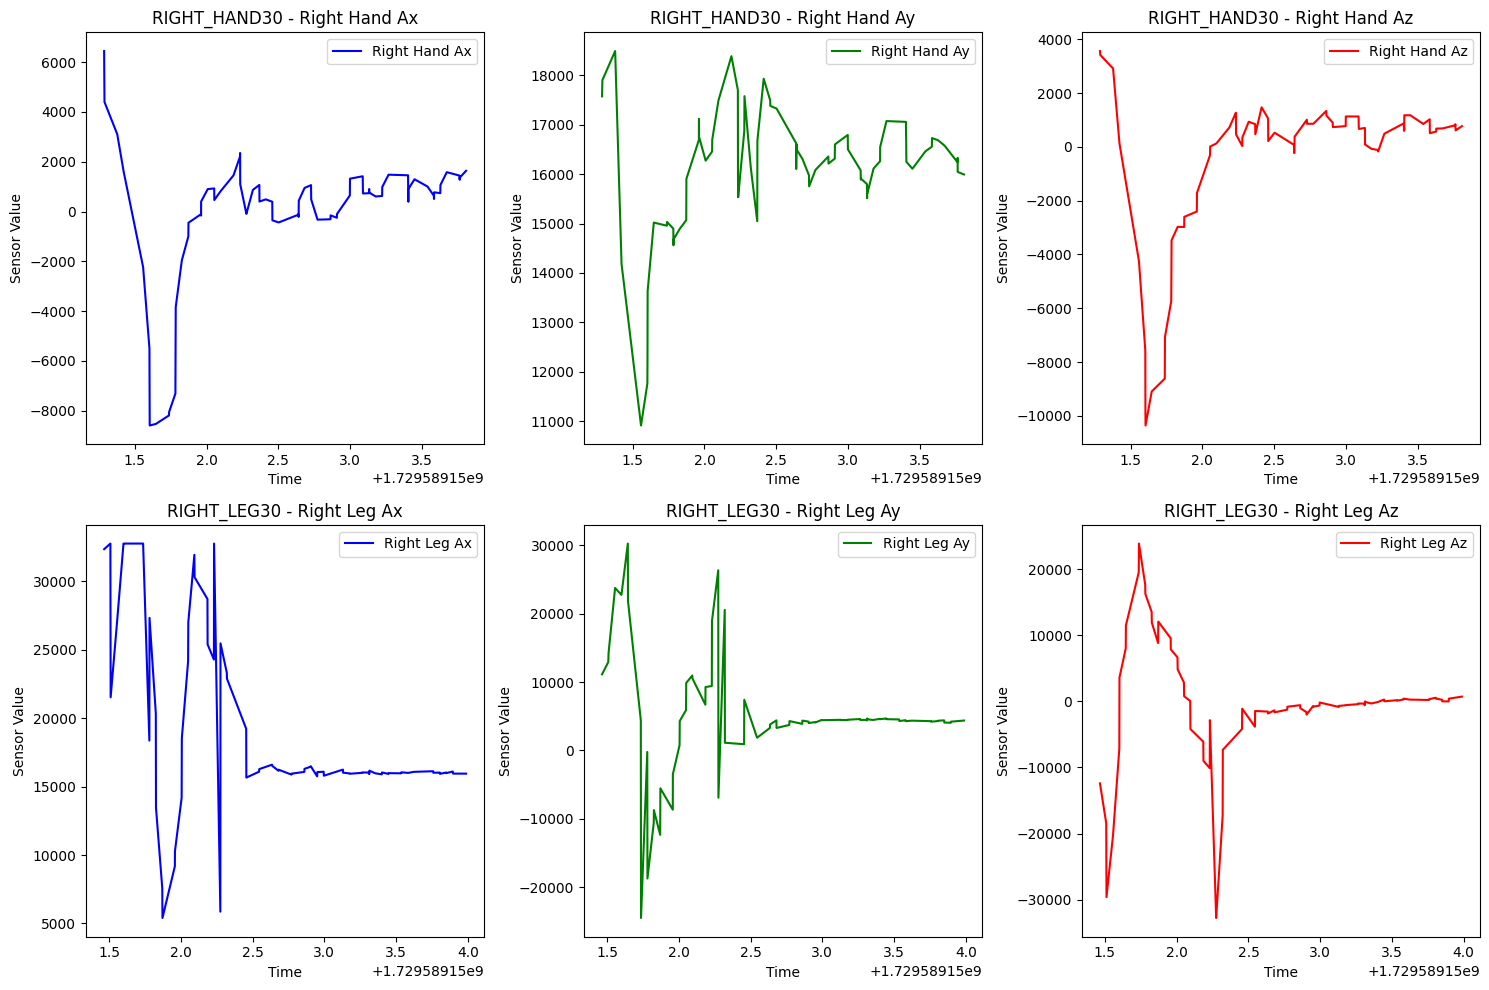

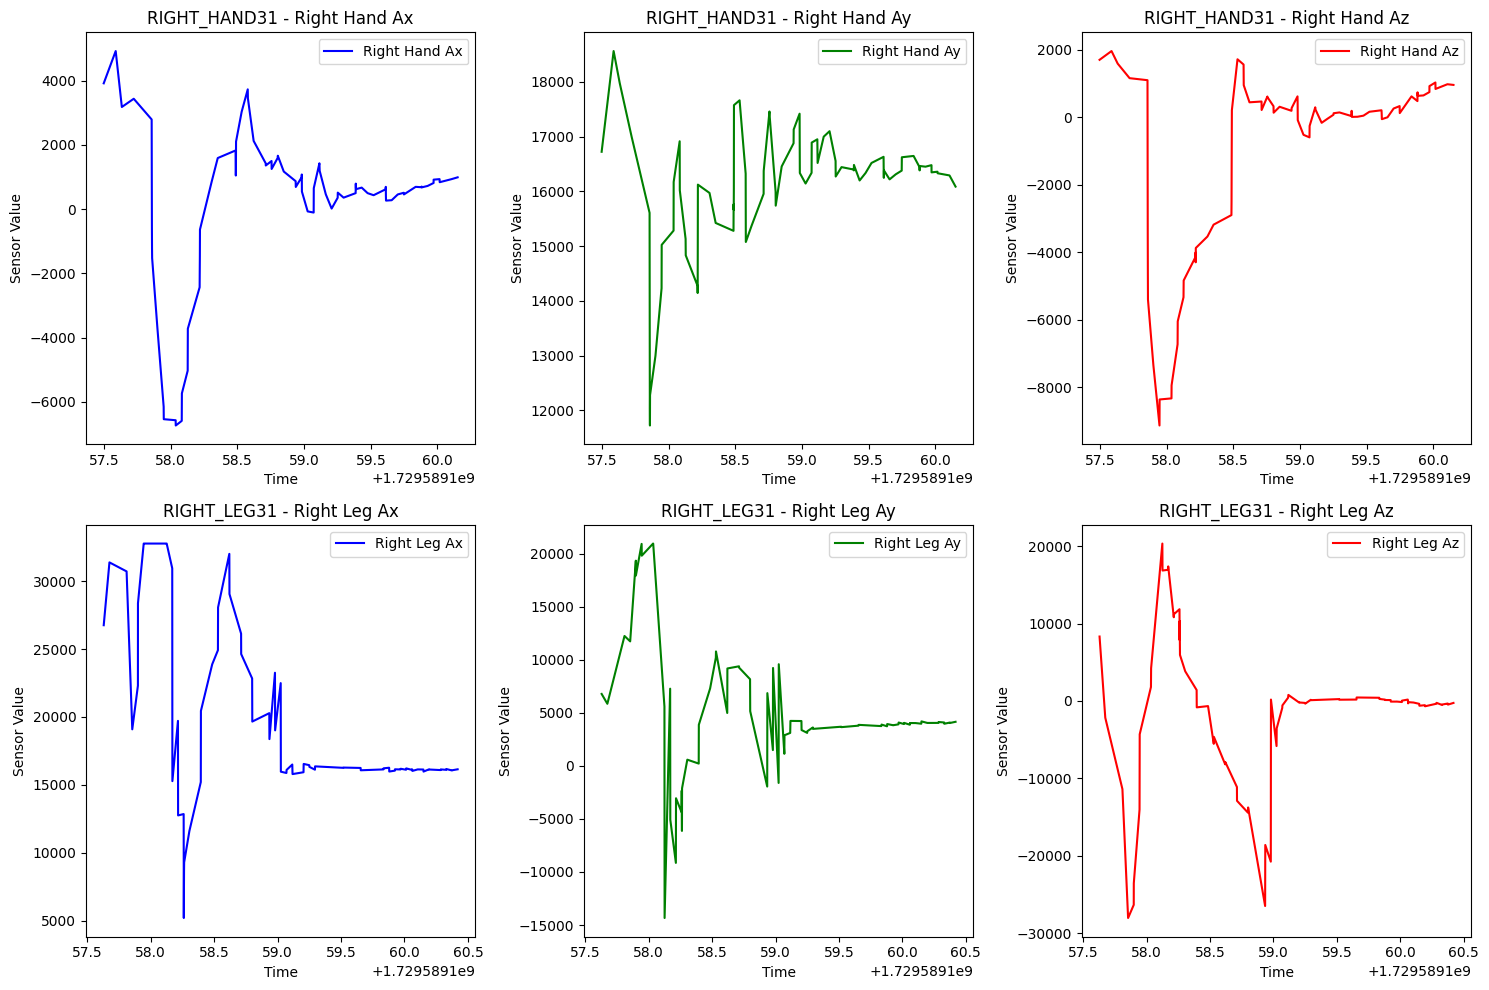

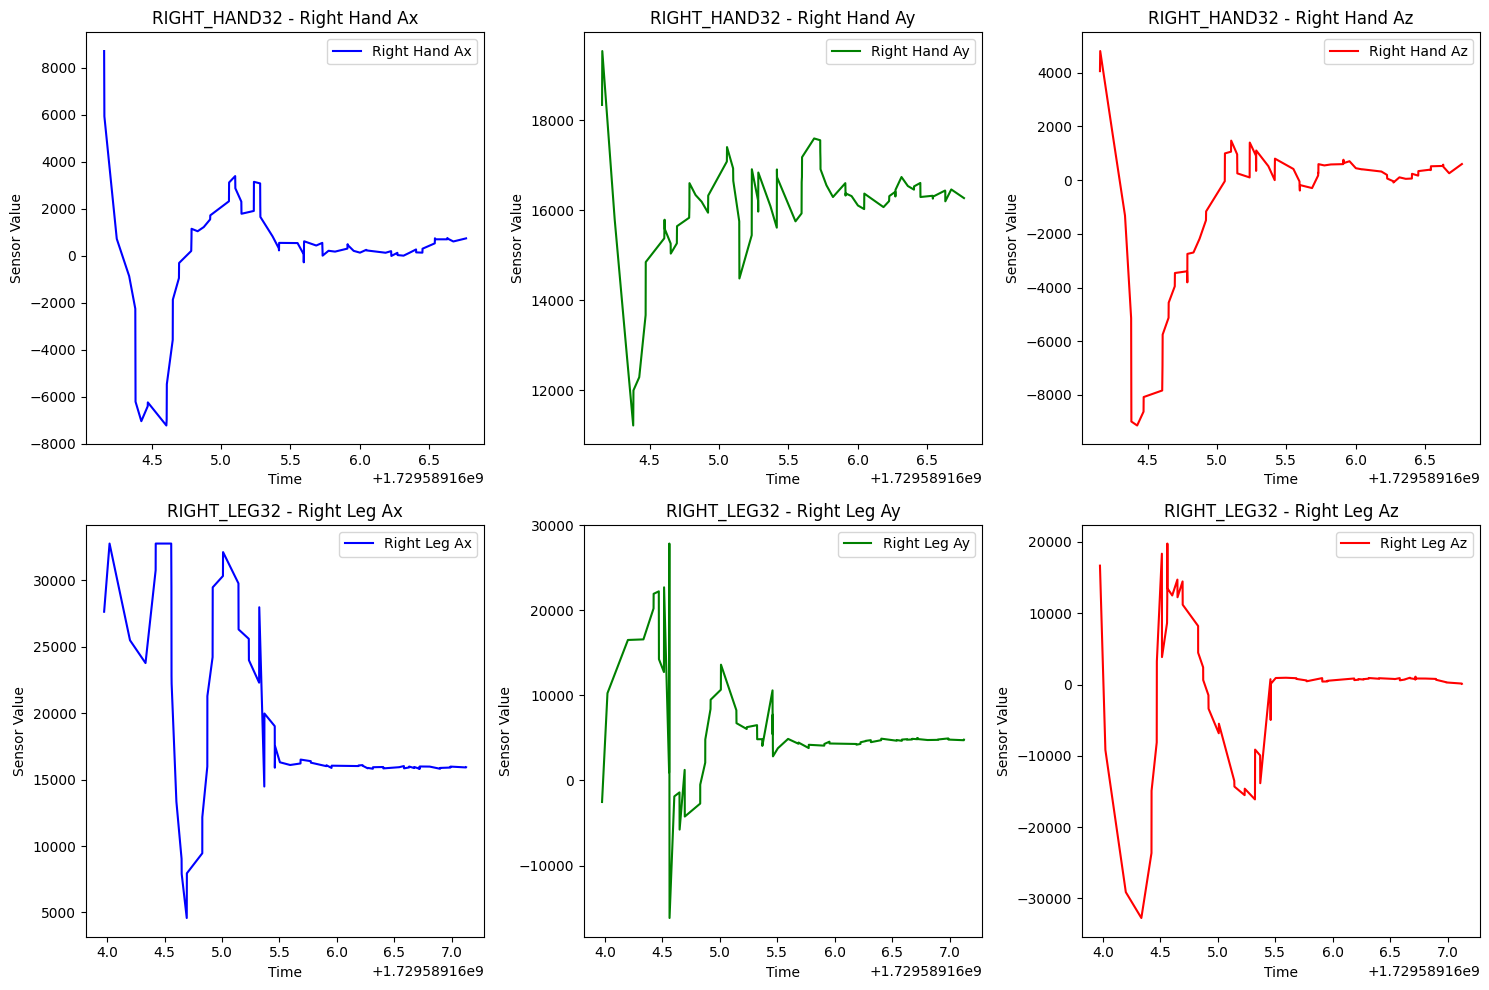

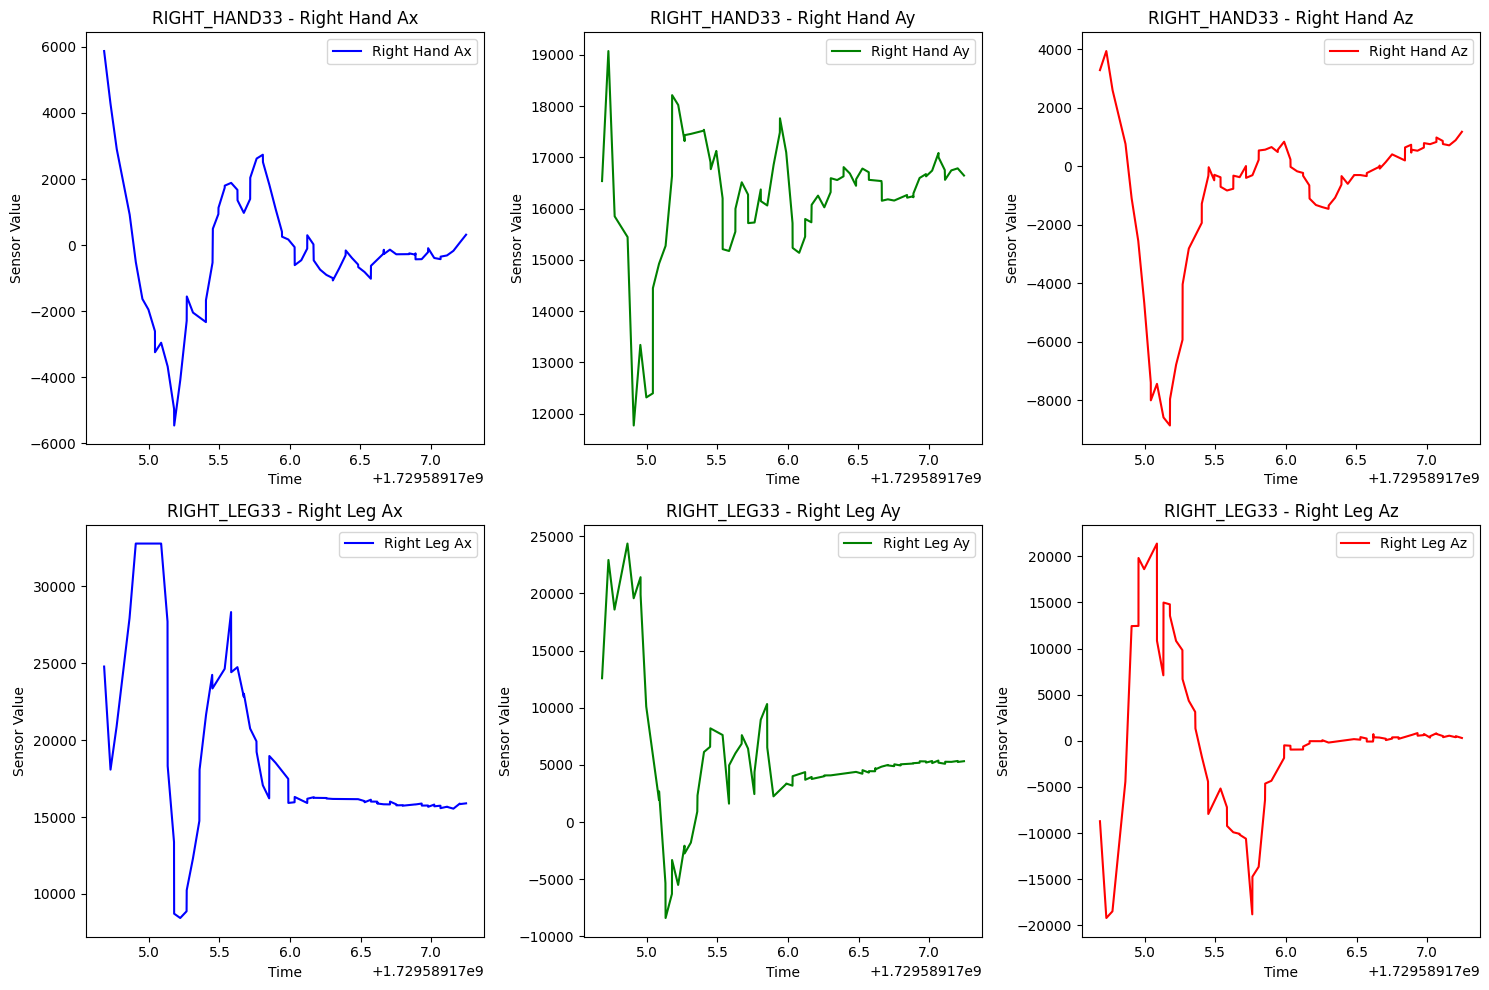

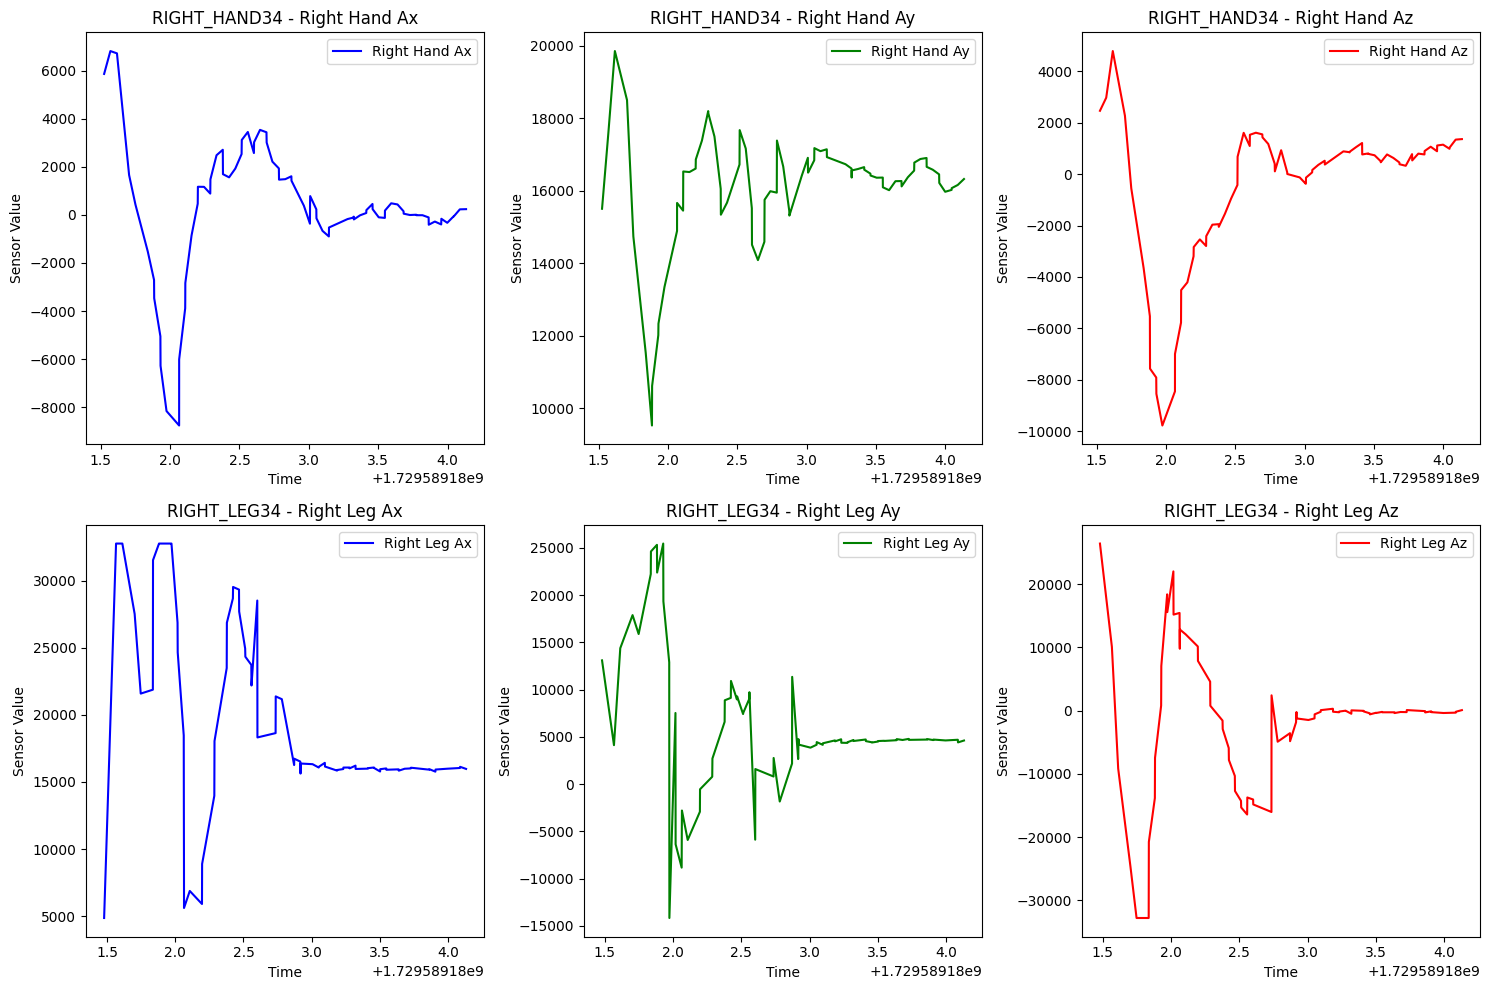

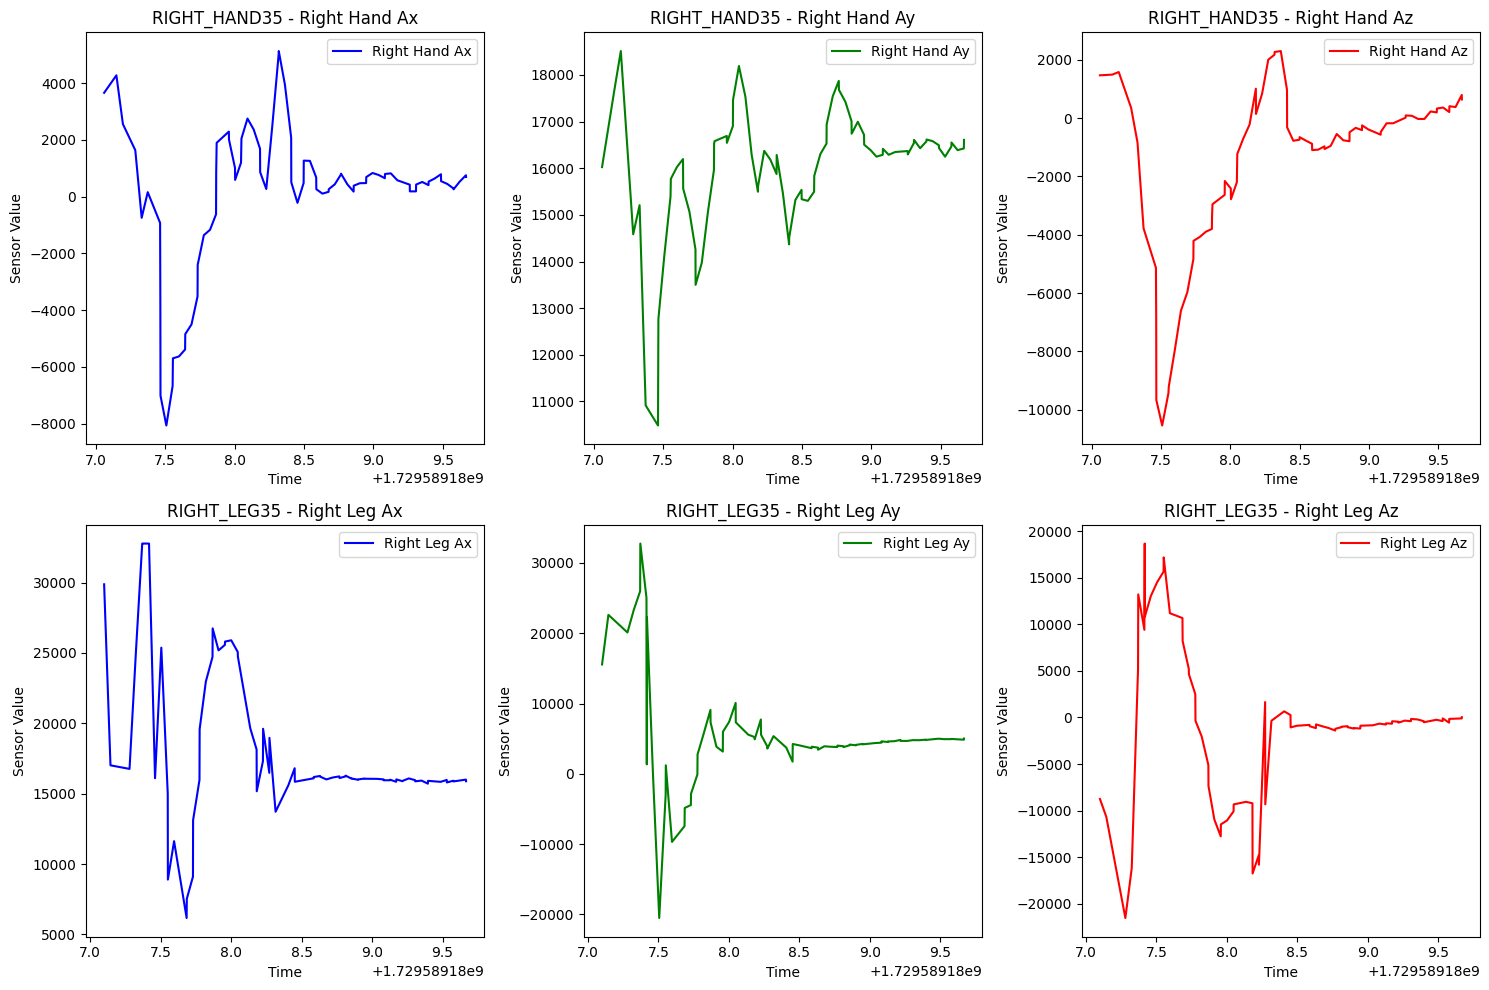

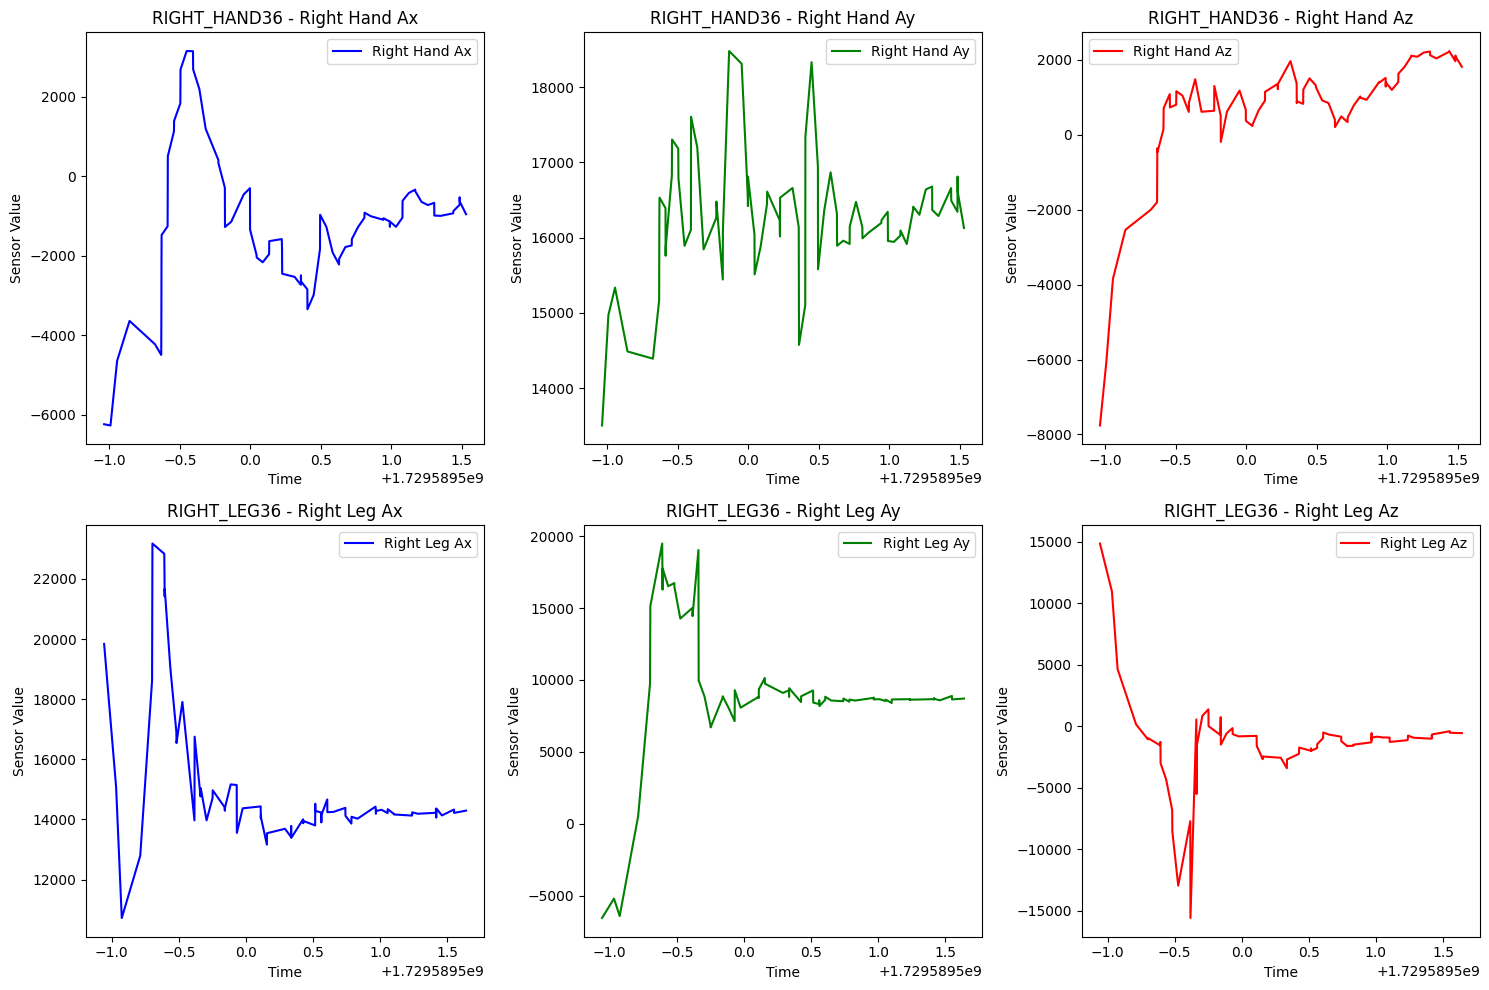

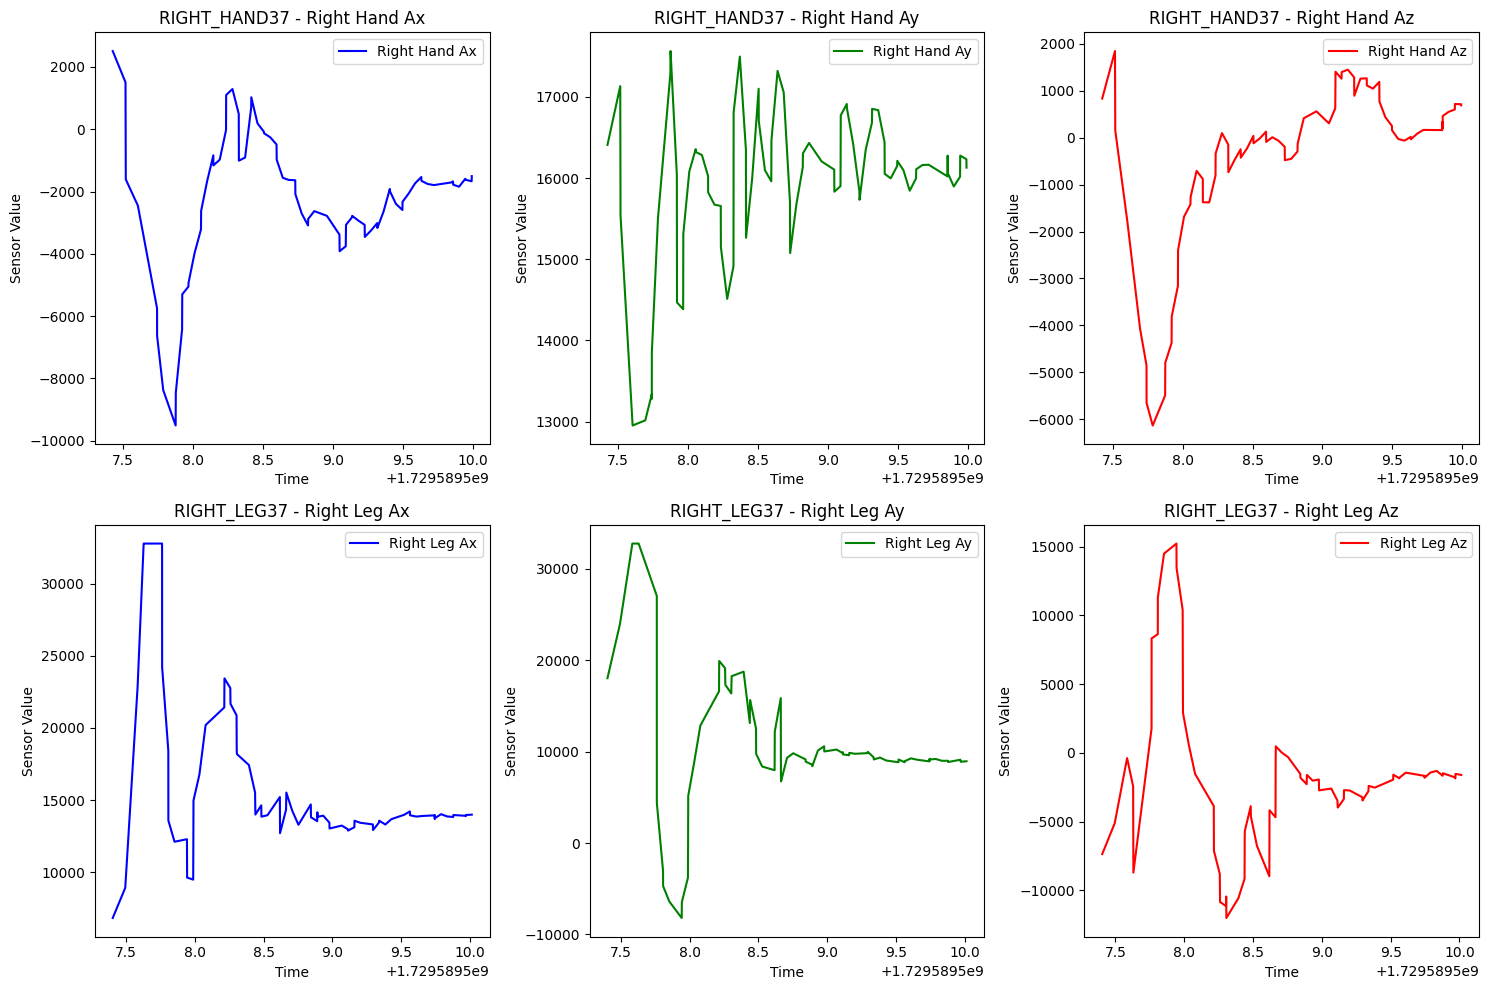

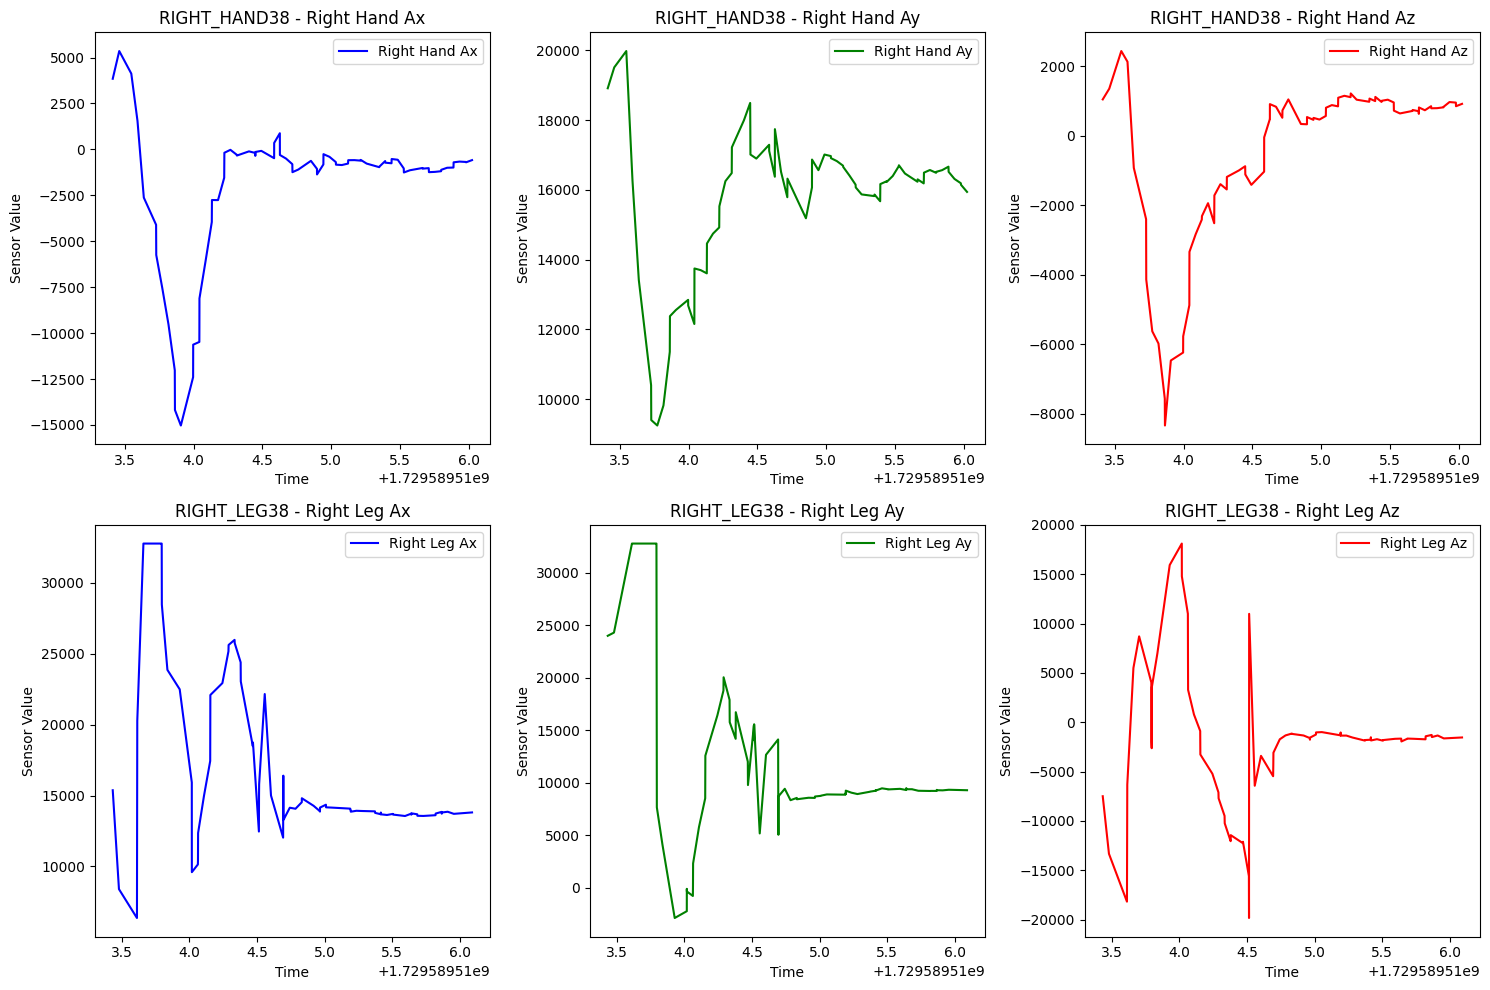

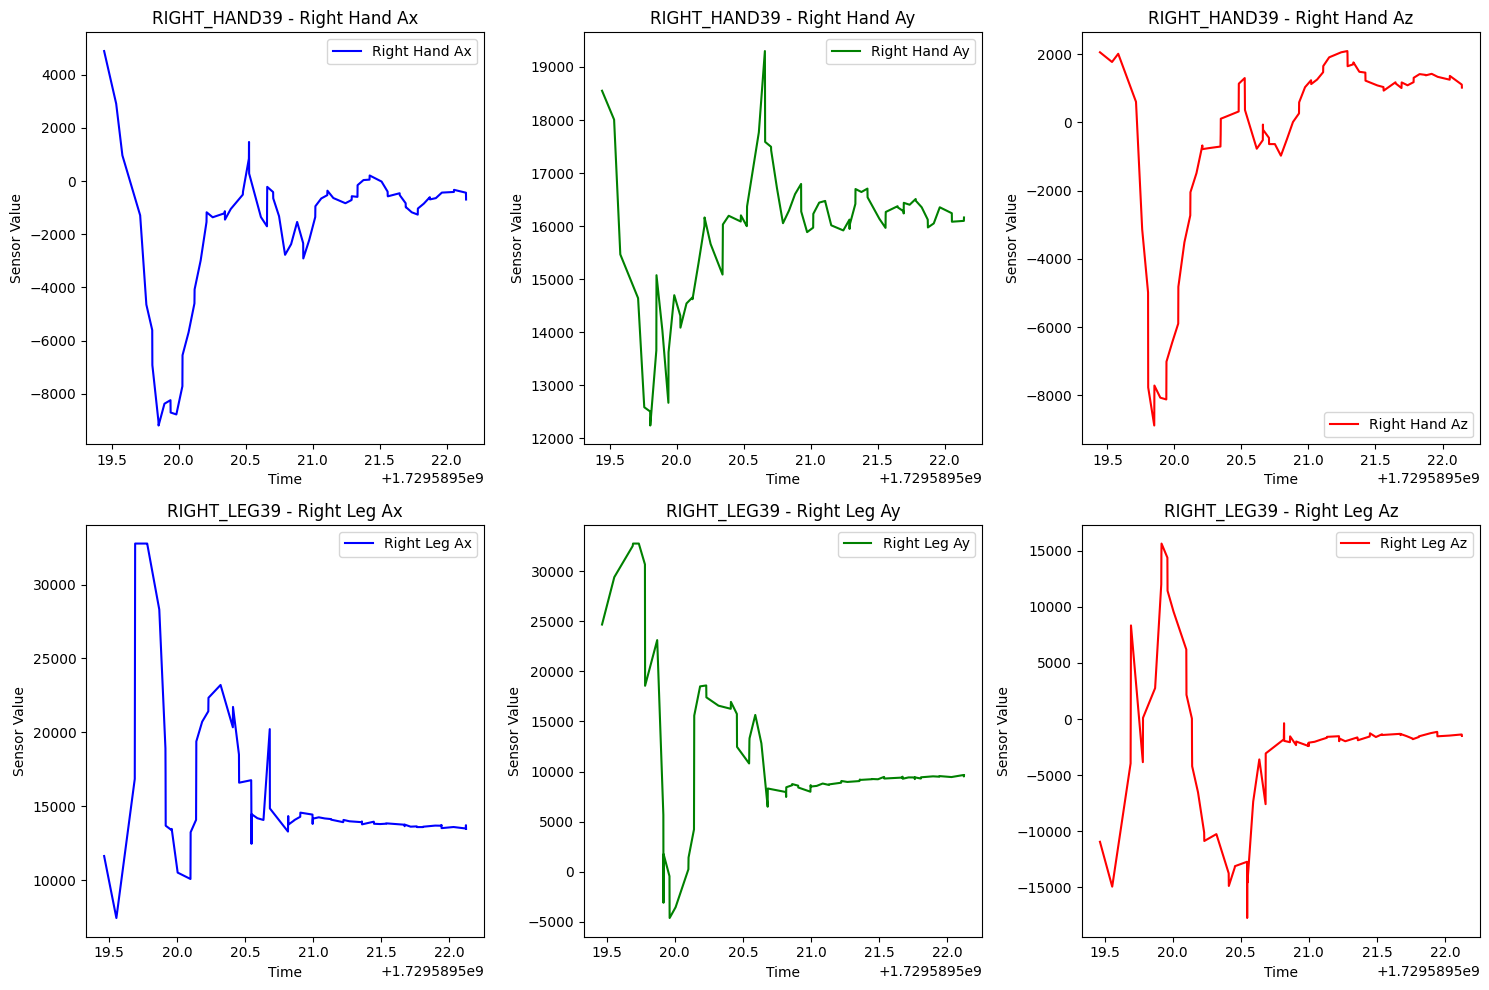

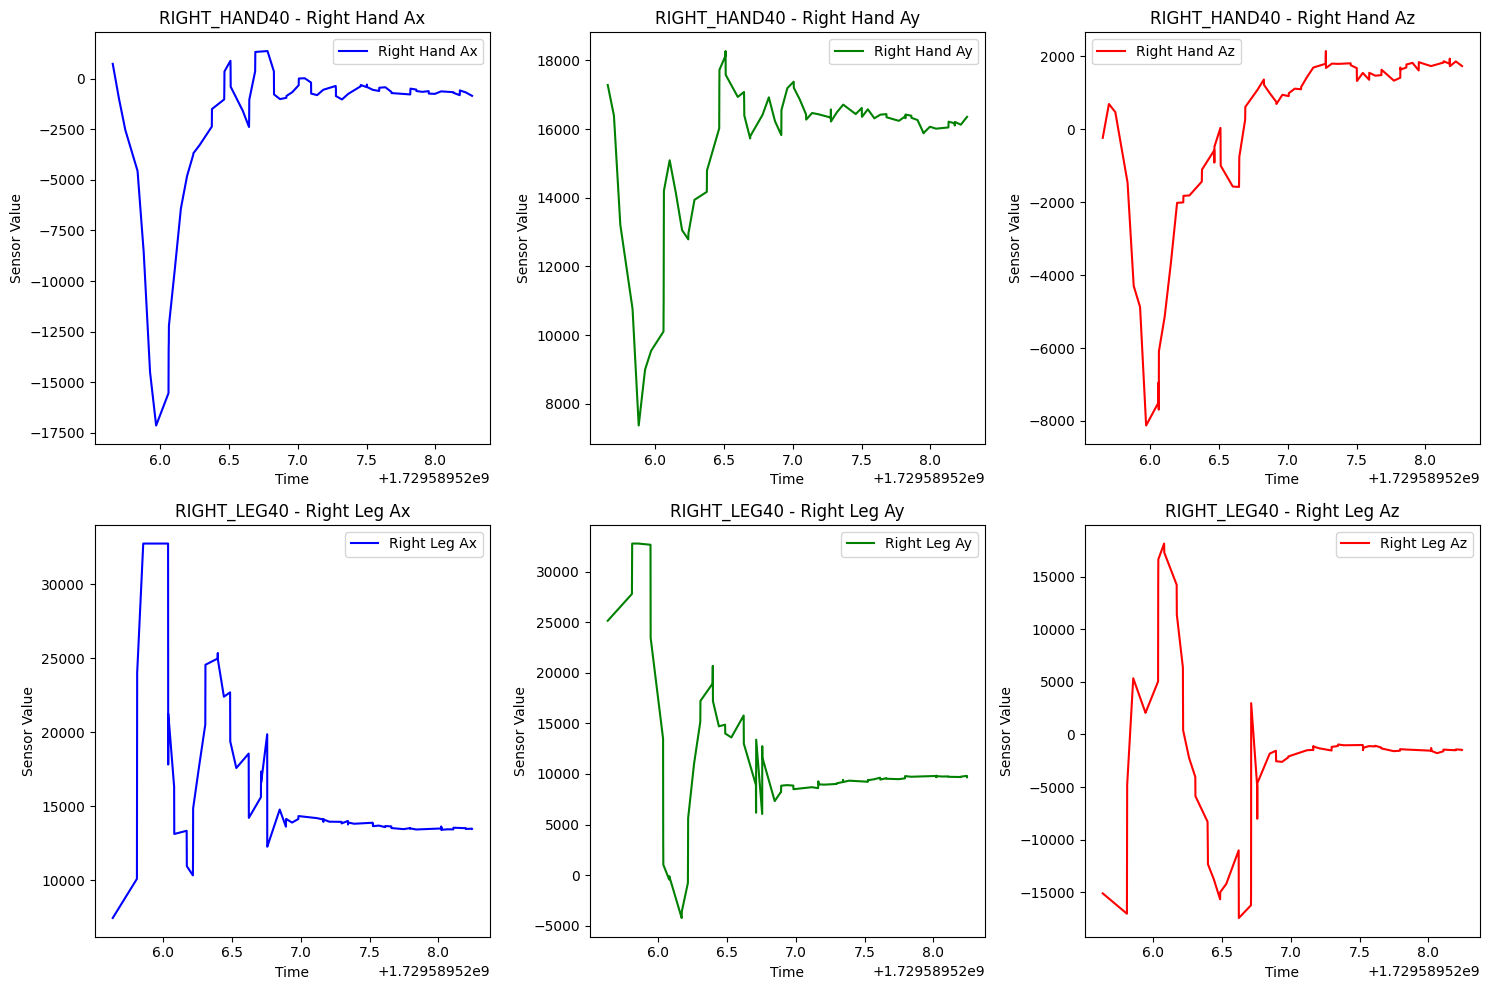

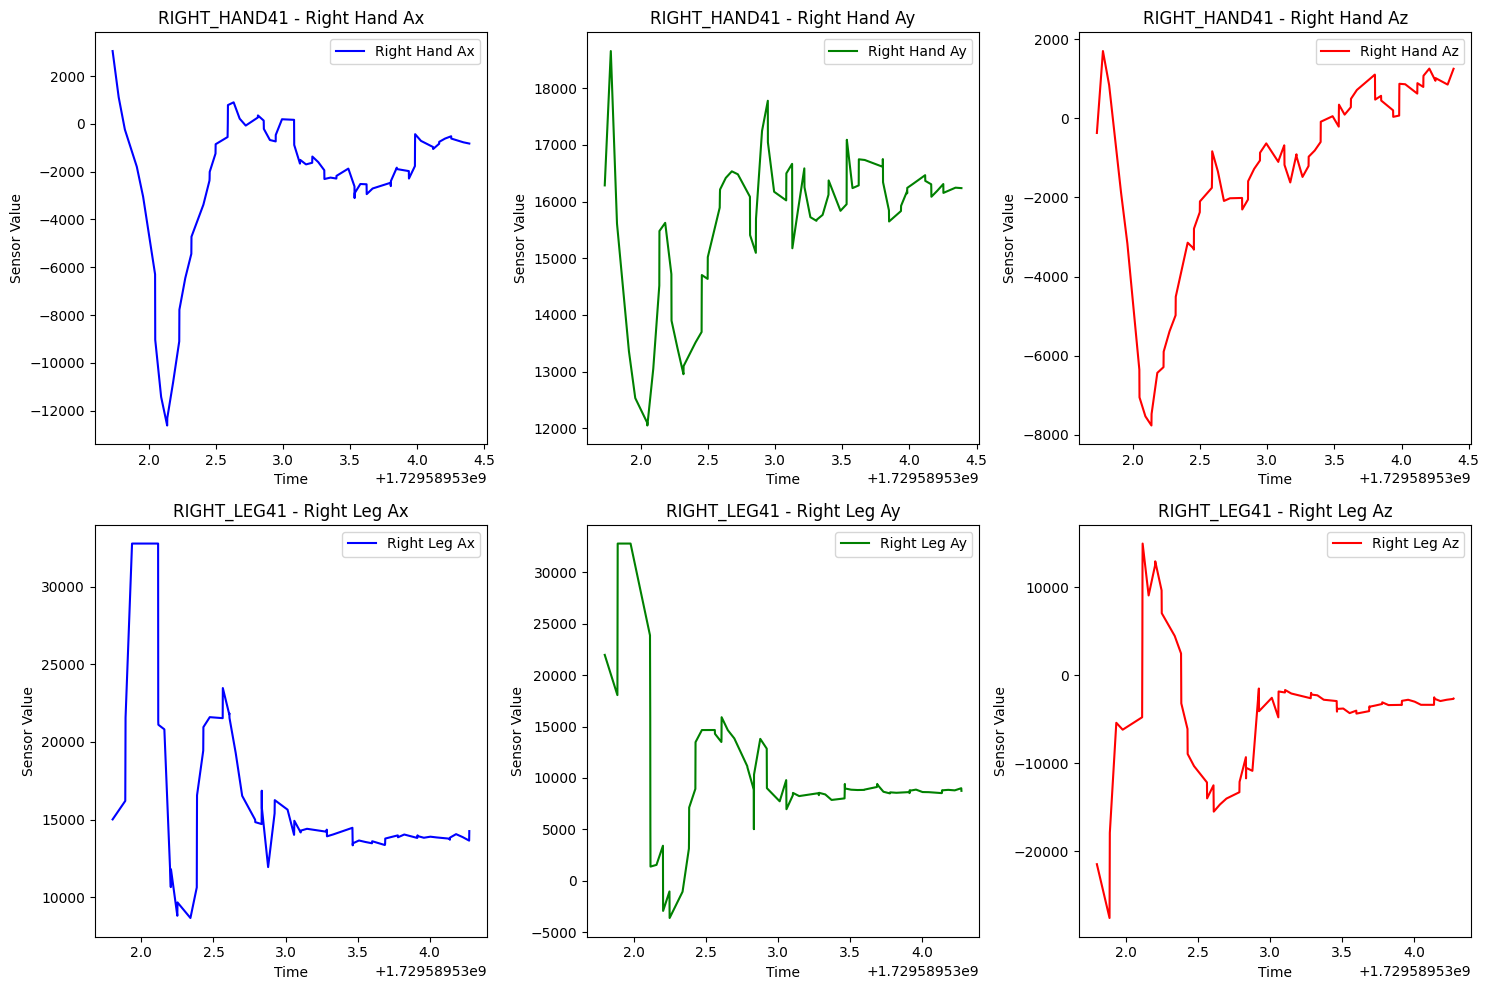

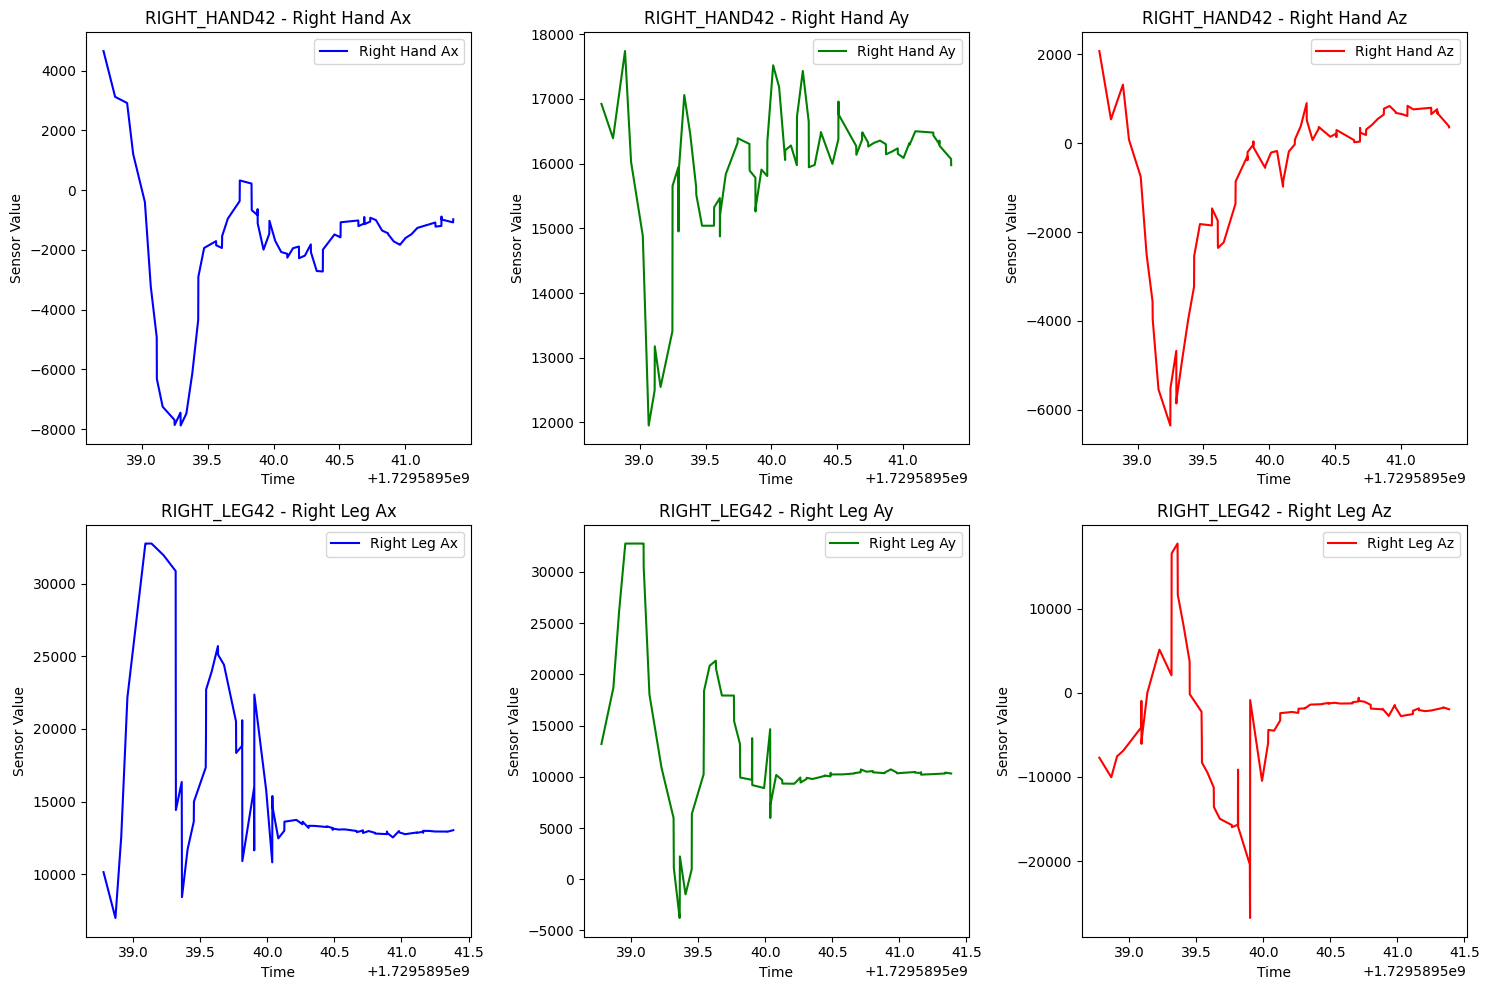

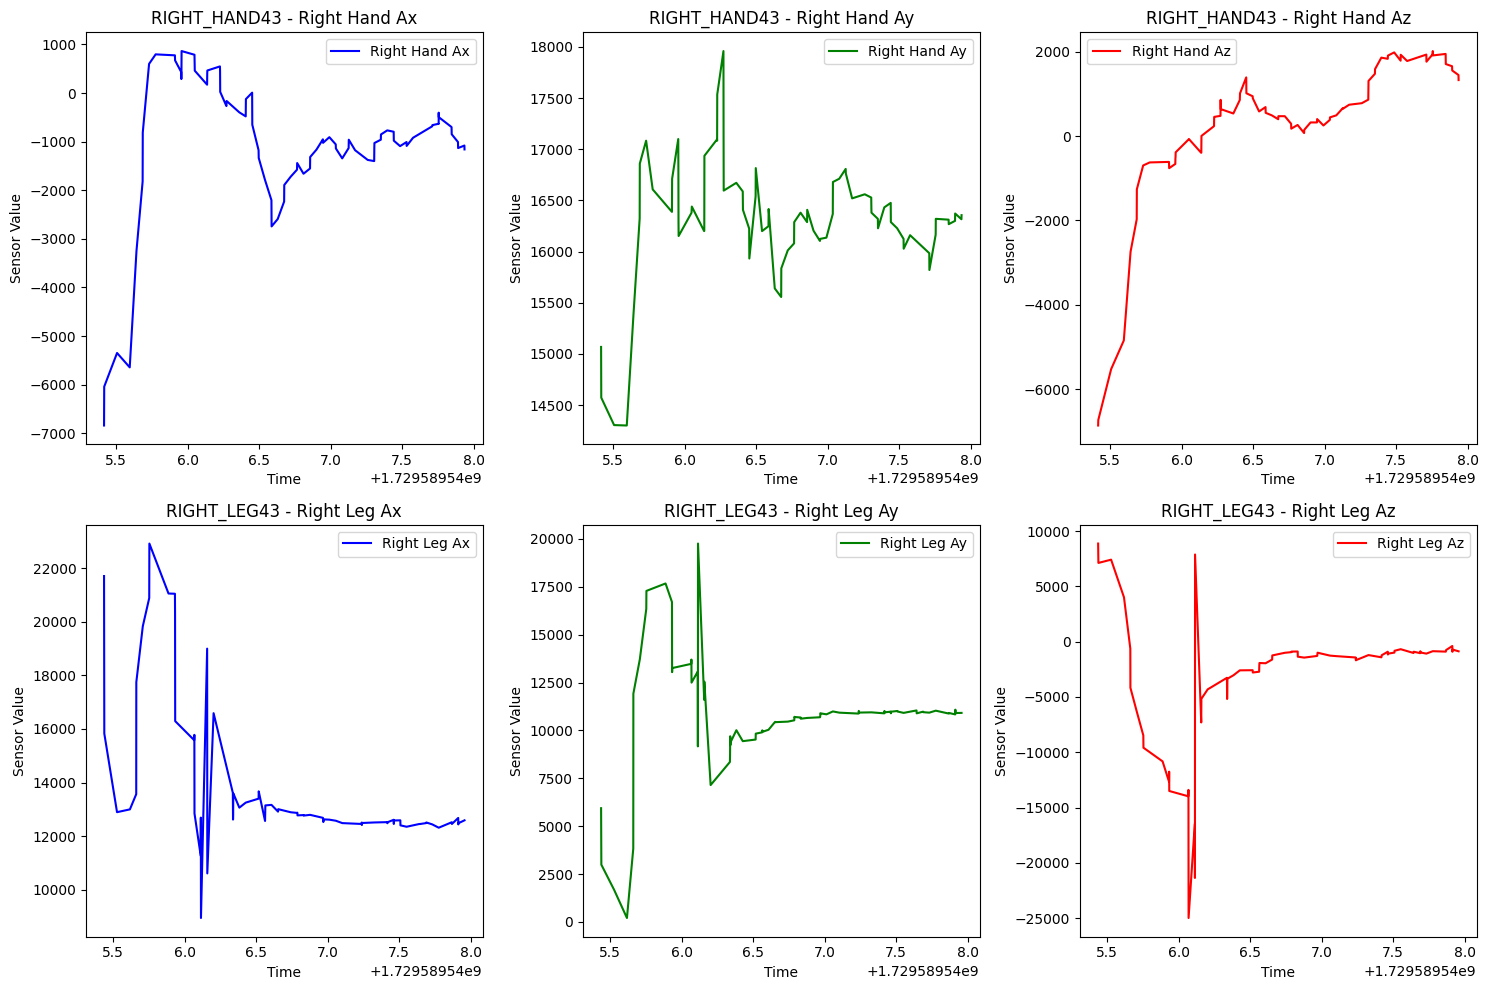

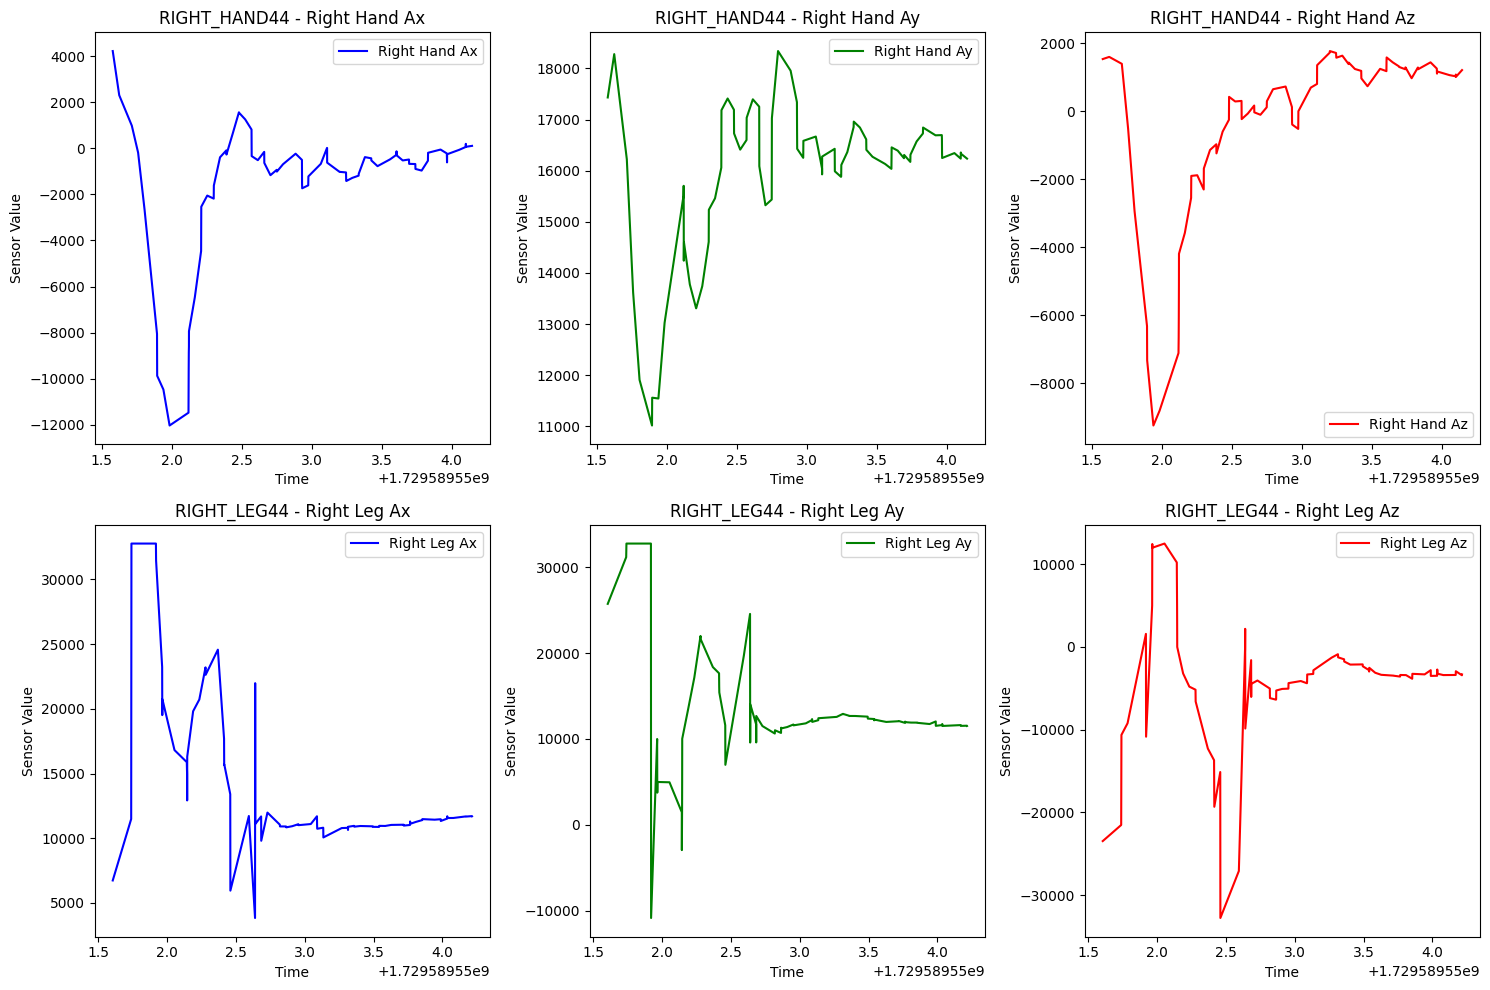

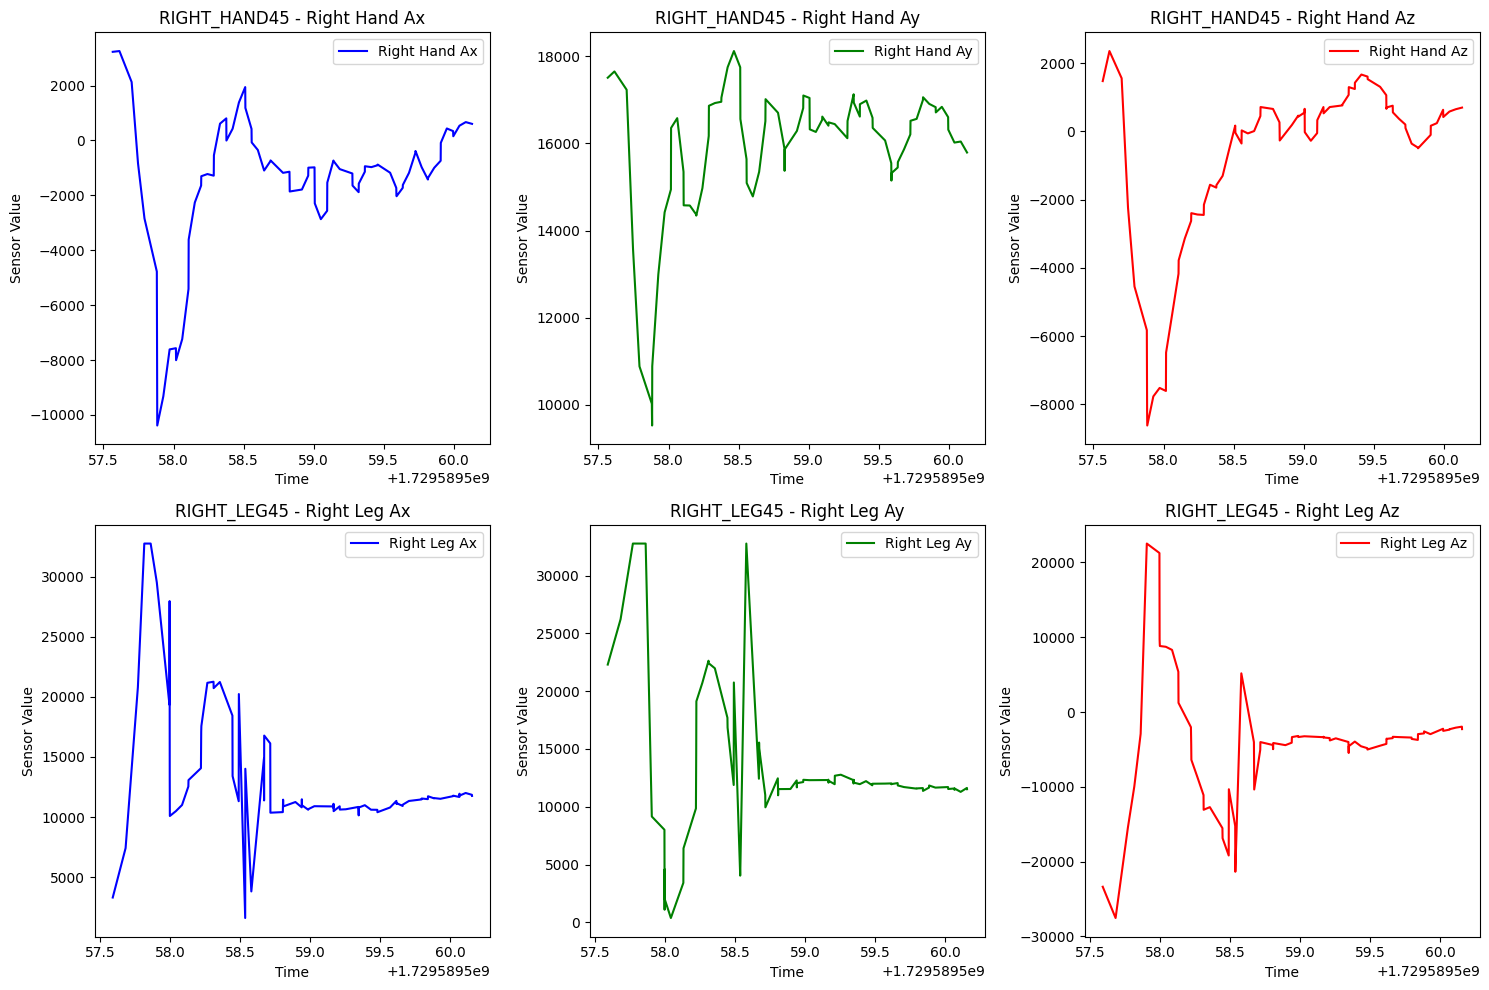

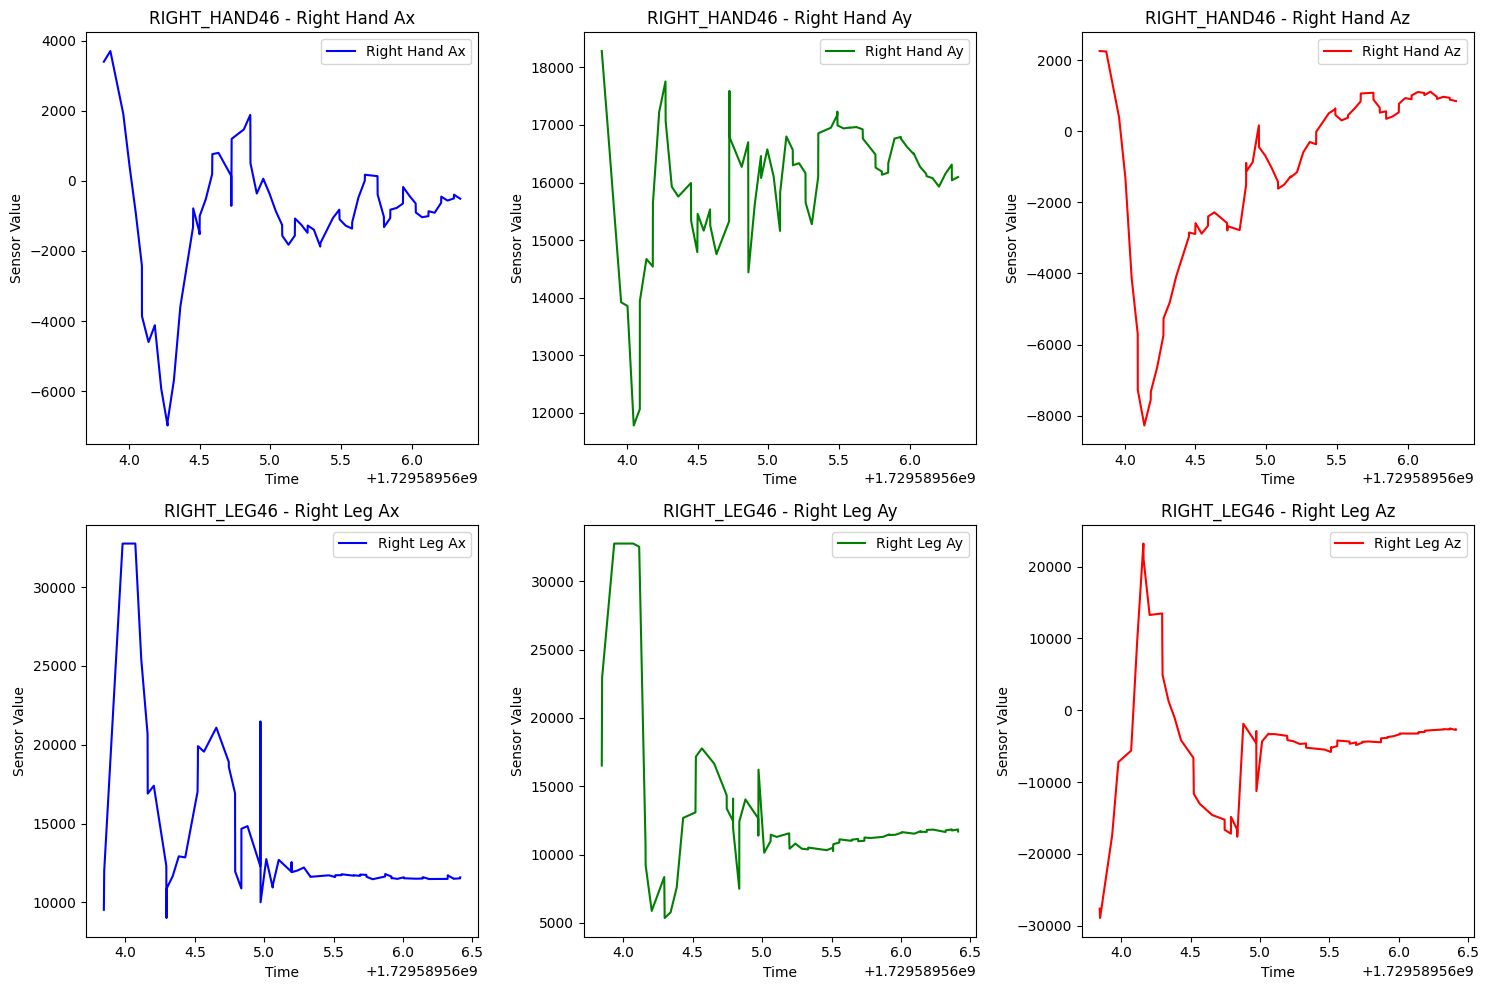

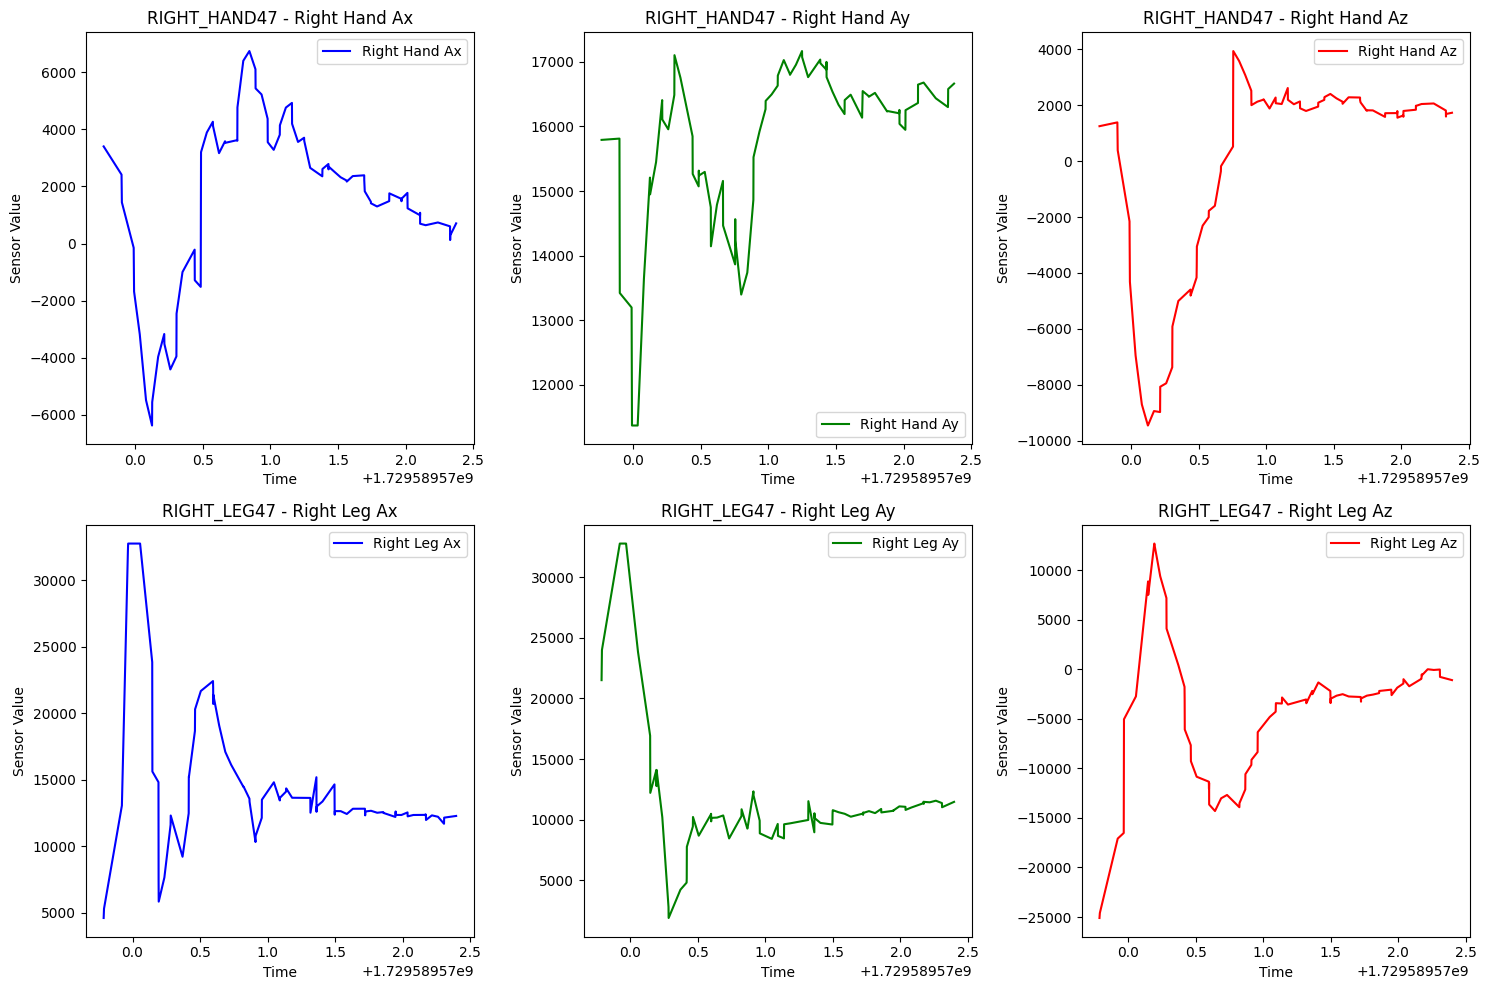

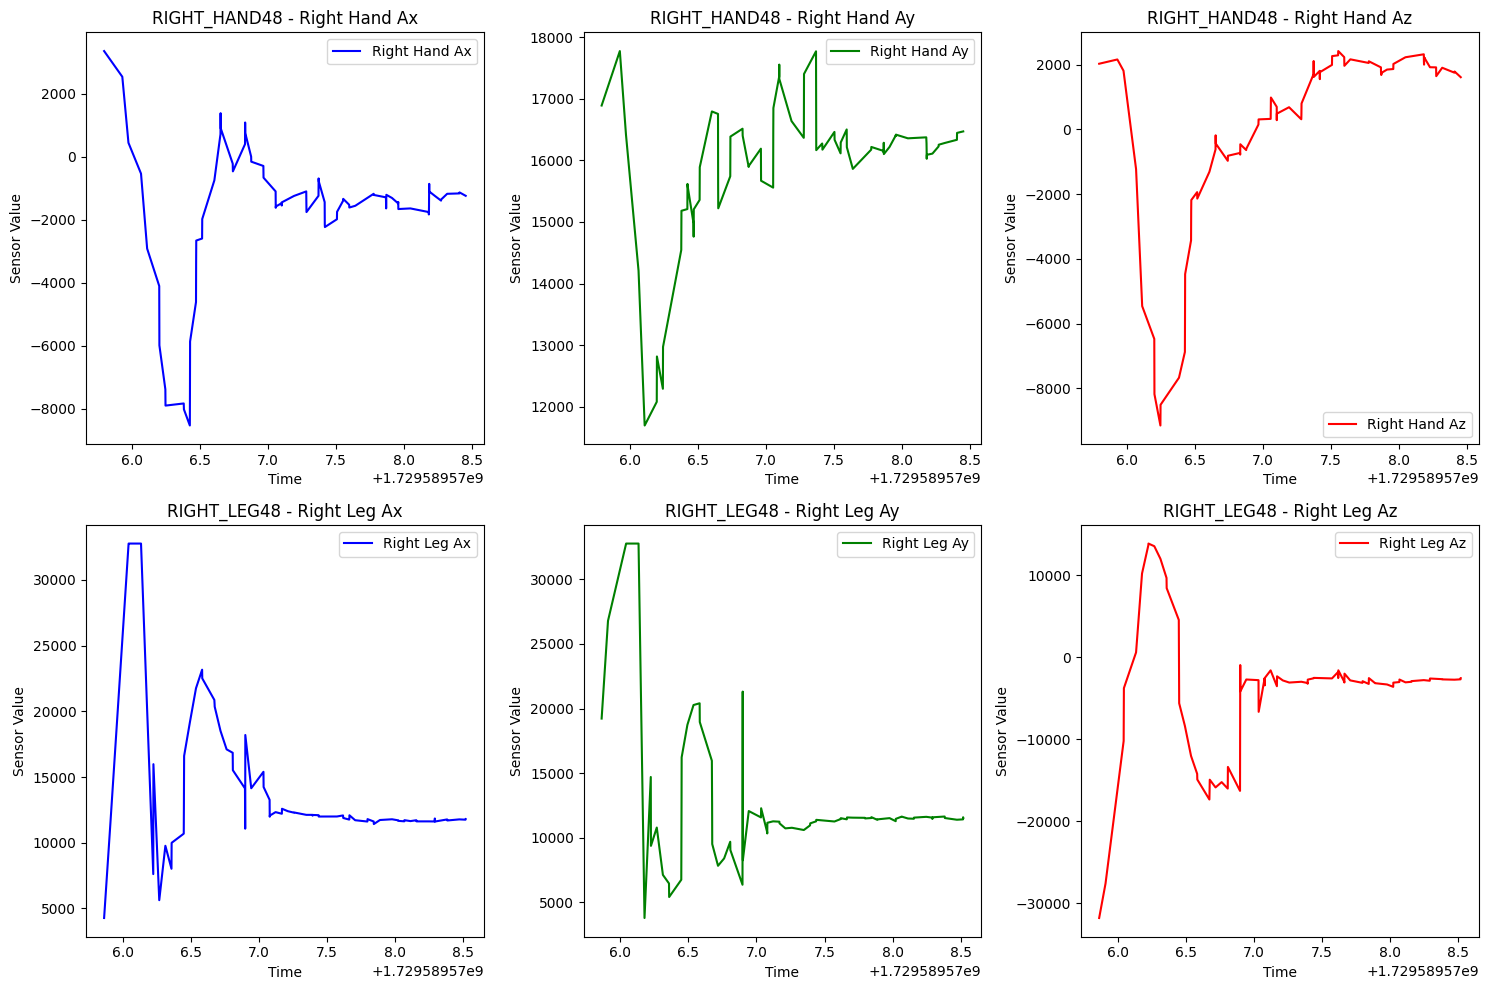

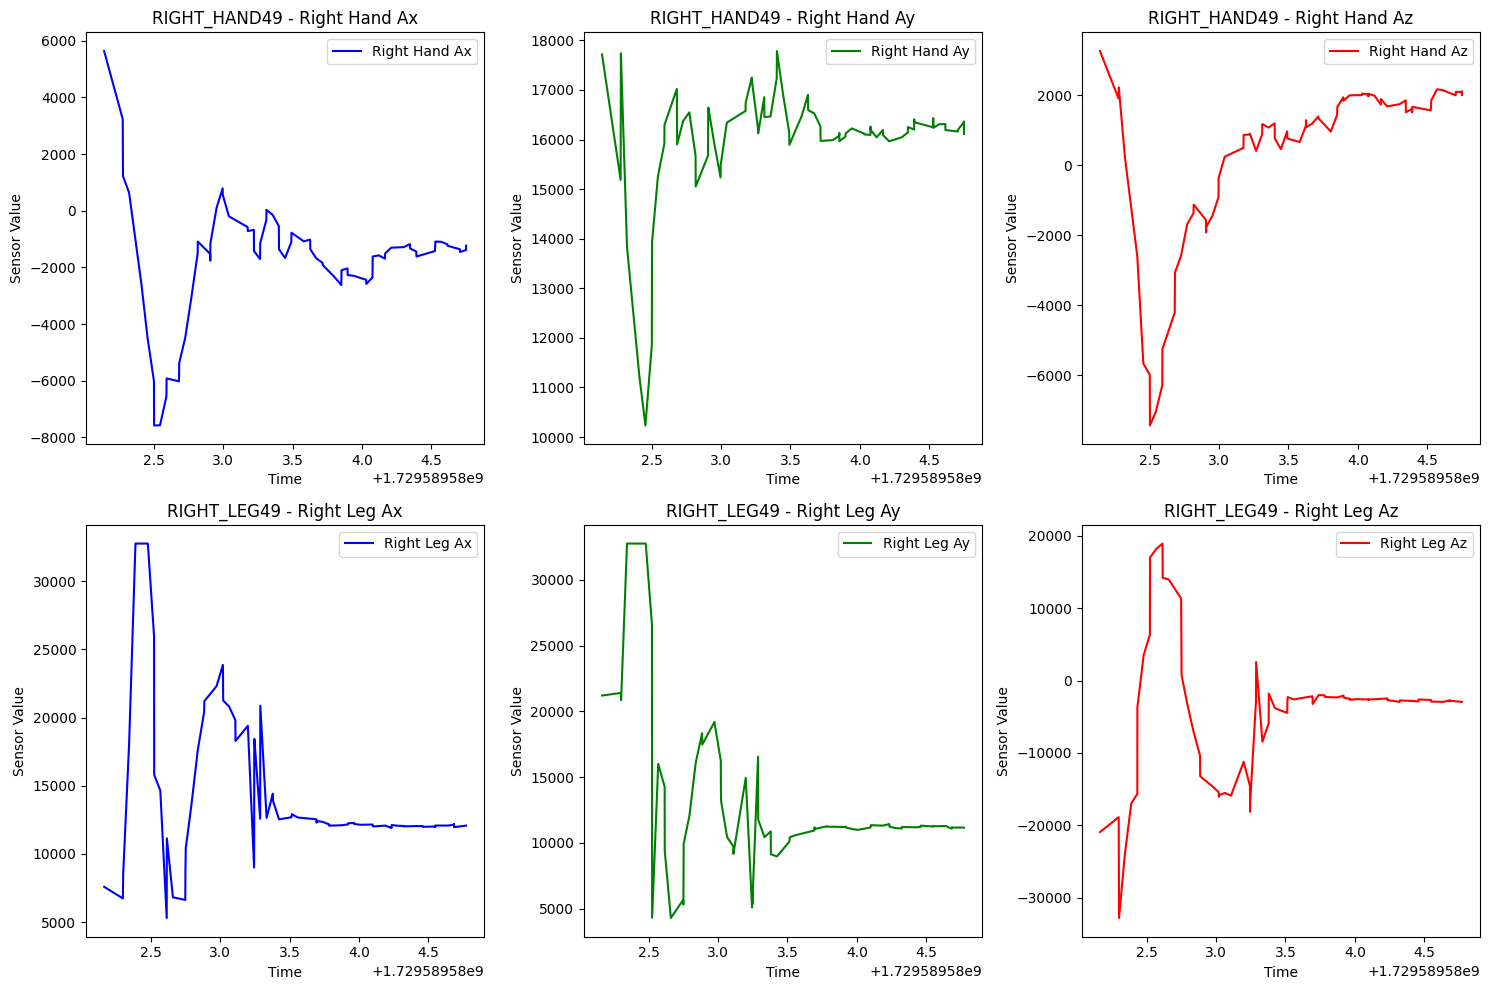

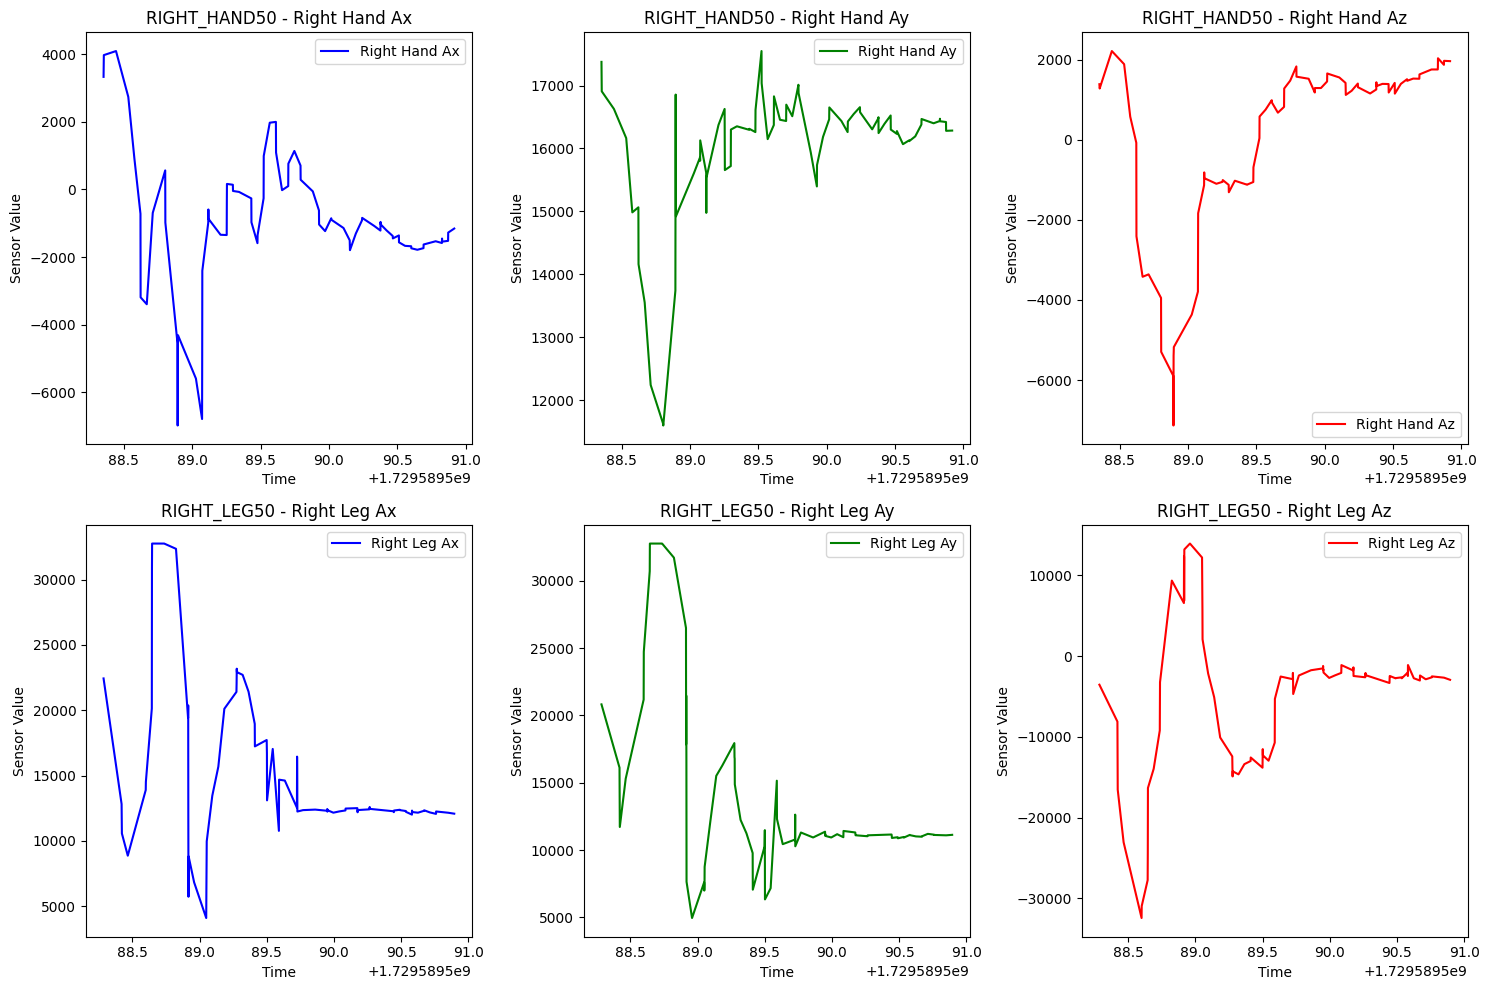

In [9]:
# Loop through each right_hand and right_leg DataFrame in their arrays
for i in range(len(right_hand_data)):
    # Create a figure with multiple subplots for each feature (Acceleration and Gyroscope data)
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for Ax, Ay, Az, Gx, Gy, Gz

    # Extract identifiers for titles
    hand_identifier = f'RIGHT_HAND{i}'
    leg_identifier = f'RIGHT_LEG{i}'

    # Plot RIGHT_HAND acceleration data (Ax, Ay, Az)
    axs[0, 0].plot(right_hand_data[i]['time'], right_hand_data[i]['Ax'], label='Right Hand Ax', color='b')
    axs[0, 0].set_title(f'{hand_identifier} - Right Hand Ax')
    axs[0, 1].plot(right_hand_data[i]['time'], right_hand_data[i]['Ay'], label='Right Hand Ay', color='g')
    axs[0, 1].set_title(f'{hand_identifier} - Right Hand Ay')
    axs[0, 2].plot(right_hand_data[i]['time'], right_hand_data[i]['Az'], label='Right Hand Az', color='r')
    axs[0, 2].set_title(f'{hand_identifier} - Right Hand Az')

    # Plot RIGHT_LEG acceleration data (Ax, Ay, Az)
    axs[1, 0].plot(right_leg_data[i]['time'], right_leg_data[i]['Ax'], label='Right Leg Ax', color='b')
    axs[1, 0].set_title(f'{leg_identifier} - Right Leg Ax')
    axs[1, 1].plot(right_leg_data[i]['time'], right_leg_data[i]['Ay'], label='Right Leg Ay', color='g')
    axs[1, 1].set_title(f'{leg_identifier} - Right Leg Ay')
    axs[1, 2].plot(right_leg_data[i]['time'], right_leg_data[i]['Az'], label='Right Leg Az', color='r')
    axs[1, 2].set_title(f'{leg_identifier} - Right Leg Az')

    # Add legends and axis labels for all subplots
    for ax in axs.flat:
        ax.legend()
        ax.set_xlabel('Time')
        ax.set_ylabel('Sensor Value')

    # Adjust layout
    plt.tight_layout()

    # Show plot for the current right_hand and right_leg pair
    plt.show()

In [85]:
## for basketball, the following are actual data
## 0, 2, 4, 6, 8, 10, 12, 13, 15, 17, 19, 21, 24, 26, 28, 30, 32, 34, 36

import os
import pandas as pd
import shutil

main_data_dir = 'action_data_10102024'
storage_data_dir = 'action_data_10102024_clean/Volleyball'

actual_data = [1,3,7,10,12,14,16,18,19,21,23,25,27,29,31,33,35,37]

for fileaction in os.listdir(main_data_dir):
    print(fileaction)
    fileaction = 'VOLLEYBALL_BEN'
    print(fileaction)
    new_directory = os.path.join(main_data_dir, fileaction)
    
    # Check if it's a directory
    if os.path.isdir(new_directory):
        for filename in os.listdir(new_directory):
            print(filename)
            # Check if the file contains "RIGHT_HAND"
            if 'right_hand' in filename and filename.endswith('.csv'):
                # Extract the number from the filename (e.g., "RIGHT_HAND0.csv" -> "0")
                print(filename)
                file_number = filename.replace('right_hand', '').replace('.csv', '')
                
                if int(file_number) not in actual_data:
                    print(file_number)
                    # Construct the corresponding RIGHT_LEG filename
                    corresponding_leg_file = f'right_leg{file_number}.csv'

                    # Check if the corresponding RIGHT_LEG file exists in the same directory
                    leg_file_path = os.path.join(new_directory, corresponding_leg_file)
                    hand_file_path = os.path.join(new_directory, filename)
                
                    if os.path.exists(leg_file_path):
                        print(f"Found corresponding pair: {filename} and {corresponding_leg_file}")

                    # Copy the file to the new directory
                    shutil.copy(leg_file_path, storage_data_dir)
                    shutil.copy(hand_file_path, storage_data_dir)
                else:
                    print(f"Corresponding RIGHT_LEG file not found for {filename}")
    break

BASKETBALL_BEN
VOLLEYBALL_BEN
right_hand0.csv
right_hand0.csv
0
Found corresponding pair: right_hand0.csv and right_leg0.csv
right_hand1.csv
right_hand1.csv
Corresponding RIGHT_LEG file not found for right_hand1.csv
right_hand10.csv
right_hand10.csv
Corresponding RIGHT_LEG file not found for right_hand10.csv
right_hand11.csv
right_hand11.csv
11
Found corresponding pair: right_hand11.csv and right_leg11.csv
right_hand12.csv
right_hand12.csv
Corresponding RIGHT_LEG file not found for right_hand12.csv
right_hand13.csv
right_hand13.csv
13
Found corresponding pair: right_hand13.csv and right_leg13.csv
right_hand14.csv
right_hand14.csv
Corresponding RIGHT_LEG file not found for right_hand14.csv
right_hand15.csv
right_hand15.csv
15
Found corresponding pair: right_hand15.csv and right_leg15.csv
right_hand16.csv
right_hand16.csv
Corresponding RIGHT_LEG file not found for right_hand16.csv
right_hand17.csv
right_hand17.csv
17
Found corresponding pair: right_hand17.csv and right_leg17.csv
right_ha